<a href="https://colab.research.google.com/github/Pawcio93/House-Prices-Kaggle-/blob/master/House_prices_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES

In [1]:
### IMPORT LIBRARIES ###
# MATH
import math
# NUMPY
import numpy as np # linear algebra
# PANDAS
import pandas as pd # data processing
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
# MATPLOTLIB
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# SEABORN
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
# SCIPY
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from scipy.special import boxcox1p
# WARNING
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
# SKLEARN
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
# XGBOOST
from xgboost import XGBClassifier
from xgboost import XGBRegressor
# LIGTHGBM
from lightgbm import LGBMRegressor
# MODEL HELPERS
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# DISPLAY
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display_html
# POWER PREDICTIVE SCORE
!pip install ppscore
import ppscore as pps
# TABULETE
!pip install tabulate
from tabulate import tabulate
# TENSORBOARD
%load_ext tensorboard
import tensorflow as tf
import datetime
# GRIDSEARCHCV
from sklearn.model_selection import GridSearchCV
# COLAB
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# NOTEBOOK SETTINGS

In [2]:
# Notebook settings
pd.set_option('display.max_columns', None)
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red', 'figure.facecolor':'white'})

# DATASET IMPORT AND OVERVIEW

In [0]:
### IMPORT AND PREPARE DATASETS ###
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')
data_description = open("data_description.txt", "r")

In [0]:
# Create a copy of train and test datasets
ds_train = dataset_train.copy()
ds_test = dataset_test.copy()
ds = [ds_train, ds_test]
target = ds_train['SalePrice']
sub_id = ds_test['Id']

In [5]:
# Data decription
print(data_description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
# first look on train dataset
ds_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL       65.000     8450   Pave   NaN      Reg   
1        2          20       RL       80.000     9600   Pave   NaN      Reg   
2        3          60       RL       68.000    11250   Pave   NaN      IR1   
3        4          70       RL       60.000     9550   Pave   NaN      IR1   
4        5          60       RL       84.000    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL       62.000     7917   Pave   NaN      Reg   
1456  1457          20       RL       85.000    13175   Pave   NaN      Reg   
1457  1458          70       RL       66.000     9042   Pave   NaN      Reg   
1458  1459          20       RL       68.000     9717   Pave   NaN      Reg   
1459  1460          20       RL       75.000     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0        196.000        Gd        TA      PConc       Gd       TA   
1          0.000        TA        TA     CBlock       Gd       TA   
2        162.000        Gd        TA      PConc       Gd       TA   
3          0.000        TA        TA     BrkTil       TA       Gd   

In [7]:
# first look on test dataset
ds_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH       80.000    11622   Pave   NaN      Reg   
1     1462          20       RL       81.000    14267   Pave   NaN      IR1   
2     1463          60       RL       74.000    13830   Pave   NaN      IR1   
3     1464          60       RL       78.000     9978   Pave   NaN      IR1   
4     1465         120       RL       43.000     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM       21.000     1936   Pave   NaN      Reg   
1455  2916         160       RM       21.000     1894   Pave   NaN      Reg   
1456  2917          20       RL      160.000    20000   Pave   NaN      Reg   
1457  2918          85       RL       62.000    10441   Pave   NaN      Reg   
1458  2919          60       RL       74.000     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          0.000        TA        TA     CBlock       TA       TA   
1        108.000        TA        TA     CBlock       TA       TA   
2          0.000        TA        TA      PConc       Gd       TA   
3         20.000        TA        TA      PConc       TA       TA   

In [8]:
# train variables info
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# test variables info
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# CLASSES USED IN NOTEBOOK
### - Processing class
### - Data analysis class
### - Transform class


## PROCESSING CLASS

In [0]:
### PROCESSING CLASS ####
class DataProcessing(): 
  def __init__(self, X_train, X_test):
    self.X_train = X_train # Train set
    self.X_test = X_test # Test set
    self.drop_list = [] # List of irrelevant columns
    self.cleaning_list = [] # List of columns with nan values
    self.datasets = [self.X_train, self.X_test] # list of datasets

  def drop_vars_list(self, freq = 0.9, null_factor = 0.6):
    # Checking if there is a value representing over (freq) of the column 
    # freq - frequency of value from 0 to 1, 0.5 means that half of samples have one value
    # null_factor - parameter from 0 to 1, 0.5 means that half of samples have no value
    rows = self.X_train.shape[0]
    for column in self.X_train.columns:
        x = self.X_train[column].value_counts()
        frequence = x.iloc[0]/rows  
        if frequence >= freq:
            self.drop_list.append(column)
    # Checking what percentage are nan value, if over (null_factor) - drop
    for column in self.X_train.columns:
        x = self.X_train[column].isnull().sum()
        freq = x/rows
        if freq >= null_factor:
            self.drop_list.append(column)      
    return print('drop_list CREATED: '), self.drop_list

  def drop(self):
    # Drop columns from drop_list
    self.X_train.drop(self.drop_list, axis=1, inplace = True)
    self.X_test.drop(self.drop_list, axis=1, inplace = True)
    return print ("Columns removed")

  def cleaning_vars_list(self):
    # Create a list of columns which need to be cleaned (have nan values)
    for dataset in self.datasets:
        for column in dataset.columns:    
            if dataset[column].isnull().any() == True:
                if column not in self.cleaning_list:
                    self.cleaning_list.append(column)
    return print('cleaning_list CREATED: '), self.cleaning_list

  def fill_with_estimate_value(self, cleaned_column, coeff_column):
    # Clean column for datasets
    print('Train before: ',  self.X_train[cleaned_column].isnull().sum())
    print('Test before: ', self.X_test[cleaned_column].isnull().sum())
    # Change nan values to calculated values 
    for dataset in self.datasets:
        # Coefficient based on most correlated variable
        # - find most correlated numerical variable
        # - calculate correlation of vars means
        # - use this coefficient to estimate nan values
        coeff_1 = dataset[cleaned_column].mean()/dataset[coeff_column].mean()
        for i in range(0, len(dataset)):
            if np.isnan(dataset[cleaned_column][i]):
                dataset[cleaned_column][i] = round(dataset[coeff_column][i]*coeff_1, 0)
            else:
                continue
    print('Train after: ', self.X_train[cleaned_column].isnull().sum())
    print('Test after: ', self.X_test[cleaned_column].isnull().sum())

  def fill_with_most_common_value(self, column):  
    # Checking number of nan values
    print('Train before: ',  self.X_train[column].isnull().sum())
    print('Test before: ', self.X_test[column].isnull().sum())
    value = self.X_train[column].value_counts().idxmax()
    # Filling missing values with most common value
    for dataset in self.datasets:
        dataset[column].fillna(value, inplace = True)     
    print('Train after: ', self.X_train[column].isnull().sum())
    print('Test after: ', self.X_test[column].isnull().sum())

  def fill_with_median(self, column, dependent_column = 0, excluded_values = [], replace_excluded = 0):
    # Checking number of nan values
    # column - variable which we want to clean
    # dependent_column - variable which we are based on while choosing string values
    # excluded_values - list o values which should not be filled with median
    # replace_excluded - value to replace excluded values
    print('Train before: ',  self.X_train[column].isnull().sum())
    print('Test before: ', self.X_test[column].isnull().sum())
    # Filling missing values with median
    for dataset in ds:
      if dependent_column == 0:
        # Classic fill with median
        dataset[column].fillna(dataset[column].median(),
                                inplace = True)
      else:
        # Fill with median, but with exeptions
        # example - column contain area of garage, in dependent column there is an
        # information that there is no garage, hence area of garage is 0 not median
        for i in dataset[dependent_column]:
          if i in excluded_values:
              dataset[column].fillna(replace_excluded, inplace = True)
          else:
              dataset[column].fillna(dataset[column].median(),
                                      inplace = True)
    print('Train after: ', self.X_train[column].isnull().sum())
    print('Test after: ', self.X_test[column].isnull().sum())

  def fill_with_mean(self, column, dependent_column = 0, excluded_values = [], replace_excluded = 0):
    # Checking number of nan values
    # column - variable which we want to clean
    # dependent_column - variable which we are based on while choosing string values
    # excluded_values - list o values which should not be filled with mean
    # replace_excluded - value to replace excluded values  
    print('Train before: ',  self.X_train[column].isnull().sum())
    print('Test before: ', self.X_test[column].isnull().sum())
    # Filling missing values with mean
    for dataset in ds:
      if dependent_column == 0:
        # Classic fill with mean
        dataset[column].fillna(dataset[column].mean(),
                                inplace = True)
      else:
        # Fill with mean, but with exeptions
        # example - column contain area of garage, in dependent column there is an
        # information that there is no garage, hence area of garage is 0 not mean
        for i in dataset[dependent_column]:
          if i in excluded_values:
              dataset[column].fillna(0, inplace = True)
          else:
              dataset[column].fillna(dataset[column].mean(),
                                      inplace = True)
    print('Train after: ', self.X_train[column].isnull().sum())
    print('Test after: ', self.X_test[column].isnull().sum())

  def fill_with_strings(self, column, dependent_column, condition_list, value_list, last_value = 'NOT FILLED'):
    # filling nan values with prepared string values, based on another column
    # column - variable which we want to clean
    # dependent_column - variable which we are based on while choosing string values
    # condition_list - list of values from dependent_column, according to which we change nan values
    # value_list - list of string used to fill nan
    # last_value - if there is any nan not covered by list, fill it with this value
    # Checking number of nan values         
    print('Train before: ', self.X_train[column].isnull().sum())
    print('Test before: ', self.X_test[column].isnull().sum())
    # filling missing values based on chosen class
    self.X_train[column].fillna(1, inplace = True)
    self.X_test[column].fillna(1, inplace = True)
    for dataset in self.datasets: # go into dataset
      for value, condition in zip(value_list, condition_list):
        for i in range(0, len(dataset)): 
            if dataset[dependent_column][i] == condition :
                if dataset[column][i] == 1:
                    dataset[column][i] = value
            else:
                continue
    # check if there is any nan left, if yes then fill with last_value
    for dataset in self.datasets: # go into dataset
      for i in range(0, len(dataset)): 
          if dataset[column][i] == 1:
              dataset[column][i] = last_value
    print('Train after: ', self.X_train[column].isnull().sum())
    print('Test after: ', self.X_test[column].isnull().sum())

  def fill_with(self, column, value):
    # simple fill with value function
    # Checking number of nan values         
    print('Train before: ', self.X_train[column].isnull().sum())
    print('Test before: ', self.X_test[column].isnull().sum())
    # filling missing values with most common one
    self.X_train[column].fillna(value, inplace = True)
    self.X_test[column].fillna(value, inplace = True)
    print('Train after: ', self.X_train[column].isnull().sum())
    print('Test after: ', self.X_test[column].isnull().sum())

## DATA ANALYSIS CLASS

In [0]:
class DataAnalysis():
  def __init__(self, X_train, X_test):
    self.X_train = X_train # Train set
    self.X_test = X_test # Test set
  
  def multi_scatter(self,x_list, y):
    ## Create scatter plots for multiple variables
    ## 3 plots in a row
    ## NOW FINISHED
    sns.set(style='whitegrid', rc={"grid.linewidth": 0.2})
    sns.set_context("paper", font_scale=2)  
    for x in range(0, len(x_list)):
      if x == 0 or x % 3:
        chart = sns.pairplot(data=self.X_train,
        y_vars=[y],
        x_vars=[x_list[x], x_list[x+1], x_list[x+2]],
        height = 10)
        plt.xticks(rotation = 45)
        plt.show()
      else:
        continue

  def multi_scatter_2(self,x_list, y):
    ## Create scatter plots for multiple variables
    ## 3 plots in a row
    ## NOW FINISHED
    sns.set(style='whitegrid', rc={"grid.linewidth": 0.2})
    sns.set_context("paper", font_scale=2)  
    for x in range(0, len(x_list)):
      if x == 0 or x % 3:
        chart = sns.pairplot(data=self.X_train,
        y_vars=[y],
        x_vars=[x_list[x], x_list[x+1], x_list[x+2]],
        height = 10)
        for ax in chart.axes.flat:
            labels = ax.get_xticklabels()
            ax.set_xticklabels(labels=labels, rotation=45)
        plt.show()
      else:
        continue

  def var_overview(self, var, target):
    # Checking var data type 
    numerical = ['int64', 'float64', 'int32', 'float32', 'int16', 'float16']
    other = ['object', 'str']
    if self.X_train[var].dtypes in numerical:
      # DATA TABLE
      (mu_v, sigma_v) = norm.fit(self.X_train[var])
      (mu_t, sigma_t) = norm.fit(self.X_train[target])
      headers = ['DATA', 'MEAN', 'STANDARD DEVIATION']
      table_data = [('Variable', mu_v, sigma_v),
                    ('Target', mu_t, sigma_t)]
      print(tabulate(table_data, headers=headers, tablefmt='grid', numalign='center'))
      # PLOTS
      fig, axs = plt.subplots(2, figsize = (10,20))
      # Scatter plot
      axs[0].scatter(self.X_train[var], self.X_train[target])
      axs[0].set_title('Scatter')
      axs[0].set_ylabel(target)
      axs[0].set_xlabel(var)
      # Histgram
      sns.distplot(self.X_train[var], ax=axs[1], fit=norm)
      axs[1].set_title('Histogram')
      axs[1].set_xlabel(var)
      for axs in fig.axes:
        plt.sca(axs)
        plt.xticks(rotation=45)
      # Probability plot
      fig2 = plt.figure(figsize = (10.30,5))
      res = stats.probplot(self.X_train[var], plot=plt)
    elif self.X_train[var].dtypes in other:
      # PLOTS
      fig, axs = plt.subplots(2, figsize = (10,20))
      # Scatter plot
      axs[0].scatter(self.X_train[var], self.X_train[target])
      axs[0].set_title('Scatter')
      axs[0].set_ylabel(target)
      axs[0].set_xlabel(var)
      # Boxplot
      sns.boxplot(x=var, y=target, data=self.X_train, ax=axs[1])
      axs[1].set_title('Boxplot')
      axs[1].set_ylabel(target)
      axs[1].set_xlabel(var)
      for axs in fig.axes:
        plt.sca(axs)
        plt.xticks(rotation=45)
    else:
      self.X_train[var].dtypes
      self.X_train[target].dtypes

## TRANSFORM CLASS

In [0]:
class TransformData():
  def __init__(self, X_train, X_test):
    self.X_train = X_train # Train set
    self.X_test = X_test # Test set
    self.datasets = [self.X_train, self.X_test] # list of datasets
    self.skewed_vars = []
    self.numerical_columns = []
    self.best_results = []

  def normality_test(self, target, skew_factor = 0.75):
    # Checking var data type 
    numerical = ['int64', 'float64', 'int32', 'float32', 'int16', 'float16']
    other = ['object', 'str']
    # Creating list of columns
    column_list = list(self.X_train.columns.values)
    # delete dependent variable
    column_list.remove(target)
    # Create list of numerical vars
    for ds in self.datasets:
      for column in column_list:
        if ds[column].dtypes in numerical:
          if column not in self.numerical_columns:
            self.numerical_columns.append(column)
          else:
            continue
        else:
          continue
      # Check the skew of numerical variable
      self.skewed_vars = ds[self.numerical_columns].apply(lambda x: skew(x))
      print("\nSkew in numerical variables: \n")
      # Create dataframe of variables with their skew values
      self.skewness = pd.DataFrame({'Skew' :self.skewed_vars})
      self.skewness = self.skewness[abs(self.skewness) > skew_factor].dropna()
    print("Number of skewed variables {}".format(self.skewness.shape[0]))
    print(self.numerical_columns)

  def skew_fix(self, lmbda = 0.5):
    skews = self.skewness.index
    for ds in self.datasets:
      for skew in skews:
          # Apply transformation methods
          ds_boxcox = boxcox1p(ds[skew], lmbda)
          ds_log = np.log(ds[skew])
          ds_square = np.sqrt(ds[skew])
          # Check which method have the best result
          box_cox_skew = pd.Series(ds_boxcox).skew()
          log_skew = pd.Series(ds_log).skew()
          square_skew = pd.Series(ds_square).skew()
          results = [box_cox_skew,
                     log_skew,
                     square_skew]
          self.best_results.append(results.index(min(results)))
    for ds in self.datasets:          
      for best, skew in zip(self.best_results, skews):
          if best == 0:
            ds[skew] = boxcox1p(ds[skew], lmbda)
          elif best == 1:
            ds[skew] = np.log(ds[skew])
          else:
            ds[skew] = np.sqrt(ds[skew])

  def data_skalling(self):
    scaler = MinMaxScaler() 
    for ds in self.datasets:
      ds[self.numerical_columns] = scaler.fit_transform(ds[self.numerical_columns]) 

# PREPROCESSING
### - Drop unwanted variables
### - Clean variables with nan values 
### - Create dummies for categorical variables

## INITIAL DROP

In [0]:
# Create class object
preproc = DataProcessing(ds_train,ds_test)

In [14]:
# Create list of unwanted variables
preproc.drop_vars_list(freq = 0.9, null_factor = 0.6)

drop_list CREATED: 


(None,
 ['Street',
  'Utilities',
  'LandSlope',
  'Condition2',
  'RoofMatl',
  'Heating',
  'CentralAir',
  'Electrical',
  'LowQualFinSF',
  'BsmtHalfBath',
  'KitchenAbvGr',
  'Functional',
  'GarageCond',
  'PavedDrive',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'Alley',
  'PoolQC',
  'Fence',
  'MiscFeature'])

In [15]:
# Delete unwanted variables from train and test sets
preproc.drop()

Columns removed


## CLEANING

In [16]:
# Create list of variables with nan values
preproc.cleaning_vars_list()

cleaning_list CREATED: 


(None,
 ['LotFrontage',
  'MasVnrType',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'MSZoning',
  'Exterior1st',
  'Exterior2nd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'KitchenQual',
  'GarageCars',
  'GarageArea',
  'SaleType'])

In [0]:
### CLEANING ###

In [18]:
# Clean LotFrontage for Train and Test dataset
# Filling missing values with most correlated variable coeffiecient calculation
preproc.fill_with_estimate_value(cleaned_column = 'LotFrontage', coeff_column = 'LotArea')

Train before:  259
Test before:  227
Train after:  0
Test after:  0


In [19]:
# Clean MasVnrType for Train and Test dataset
# Filling missing values with most common value
preproc.fill_with_most_common_value(column= 'MasVnrType')

Train before:  8
Test before:  16
Train after:  0
Test after:  0


In [20]:
# Clean MasVnrArea for Train and Test dataset
# Filling missing values with median
preproc.fill_with_median(column='MasVnrArea', dependent_column='MasVnrType', excluded_values=['None'])

Train before:  8
Test before:  15
Train after:  0
Test after:  0


In [21]:
# Clean BsmtQual for Train and Test dataset
# Filling missing values with selected strings
preproc.fill_with_strings(column='BsmtQual',
                          dependent_column='Foundation',
                          condition_list=['PConc'],
                          value_list=['Gd'],
                          last_value = 'TA')

Train before:  37
Test before:  44
Train after:  0
Test after:  0


In [22]:
# Clean BsmtCond for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='BsmtCond', value='TA')

Train before:  37
Test before:  45
Train after:  0
Test after:  0


In [23]:
# Clean BsmtCond for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='BsmtExposure', value='No')

Train before:  38
Test before:  44
Train after:  0
Test after:  0


In [24]:
# Clean BsmtFinType1 for Train and Test dataset
# Filling missing values with selected strings
preproc.fill_with_strings(column='BsmtFinType1',
                          dependent_column='Foundation',
                          condition_list=['PConc'],
                          value_list=['GLQ'],
                          last_value = 'Unf')

Train before:  37
Test before:  42
Train after:  0
Test after:  0


In [25]:
# Clean BsmtFinType2 for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='BsmtFinType2', value='Unf')

Train before:  38
Test before:  42
Train after:  0
Test after:  0


In [26]:
# Clean FireplaceQu for Train and Test dataset
# Filling missing values with none
preproc.fill_with(column='FireplaceQu', value='none')

Train before:  690
Test before:  730
Train after:  0
Test after:  0


In [27]:
# Clean GarageType for Train and Test dataset
# Filling missing values with none
preproc.fill_with(column='GarageType', value='none')

Train before:  81
Test before:  76
Train after:  0
Test after:  0


In [28]:
# Clean GarageYrBlt for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='GarageYrBlt', value=0)

Train before:  81
Test before:  78
Train after:  0
Test after:  0


In [29]:
# Clean GarageFinish for Train and Test dataset
# Filling missing values with none
preproc.fill_with(column='GarageFinish', value='none')

Train before:  81
Test before:  78
Train after:  0
Test after:  0


In [30]:
# Clean GarageQual for Train and Test dataset
# Filling missing values with none
preproc.fill_with(column='GarageQual', value='none')

Train before:  81
Test before:  78
Train after:  0
Test after:  0


In [31]:
# Clean MSZoning for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with_most_common_value(column='MSZoning')

Train before:  0
Test before:  4
Train after:  0
Test after:  0


In [32]:
# Clean Exterior1st for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='Exterior1st', value='VinylSd')

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [33]:
# Clean Exterior2nd for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='Exterior2nd', value='VinylSd')

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [34]:
# Clean BsmtFinSF1 for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtFinSF1', value=0)

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [35]:
# Clean BsmtFinSF2 for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtFinSF2', value=0)

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [36]:
# Clean BsmtUnfSF for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtUnfSF', value=0)

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [37]:
# Clean TotalBsmtSF for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='TotalBsmtSF', value=0)

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [38]:
# Clean BsmtFullBath for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtFullBath', value=0)

Train before:  0
Test before:  2
Train after:  0
Test after:  0


In [39]:
# Clean KitchenQual for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='KitchenQual', value='TA')

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [40]:
# Clean GarageCars for Train and Test dataset
# Filling missing values with most common value
preproc.fill_with(column='GarageCars', value=2)

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [41]:
# Clean GarageArea for test dataset  
# Checking number of nan values         
print(ds_train['GarageArea'].isnull().sum())
print(ds_test['GarageArea'].isnull().sum())
# Check correlation between GarageCars and GarageArea
#sns.barplot(x = 'GarageCars', y = 'GarageArea', data=ds_train) 
# Mediana of GarageArea for GarageCars = 2
ds_test['GarageArea'].fillna('null', inplace = True)
g_area_for_2_list = []
for i in range(0, len(ds_test)): 
    if ds_test['GarageCars'][i] == 2:      
        if not ds_test['GarageArea'][i] == 'null':
            g_area_for_2_list.append(ds_test['GarageArea'][i])
    else:
        continue
g_area_for_2 = sum(g_area_for_2_list)/float(len(g_area_for_2_list))
# filling missing values with most common one
ds_test['GarageArea'].replace('null', g_area_for_2, inplace = True)
print(ds_train['GarageArea'].isnull().sum())
print(ds_test['GarageArea'].isnull().sum())

0
1
0
0


In [42]:
ds_test[ds_test['GarageArea'].isin(['null'])].empty

True

In [43]:
# Clean SaleType for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='SaleType', value='WD')

Train before:  0
Test before:  1
Train after:  0
Test after:  0


In [0]:
# Create target and idependent variables list
target = 'SalePrice'
train_columns = list(ds_train.columns.values)
train_columns.remove('SalePrice')

# DATA ANALYSIS

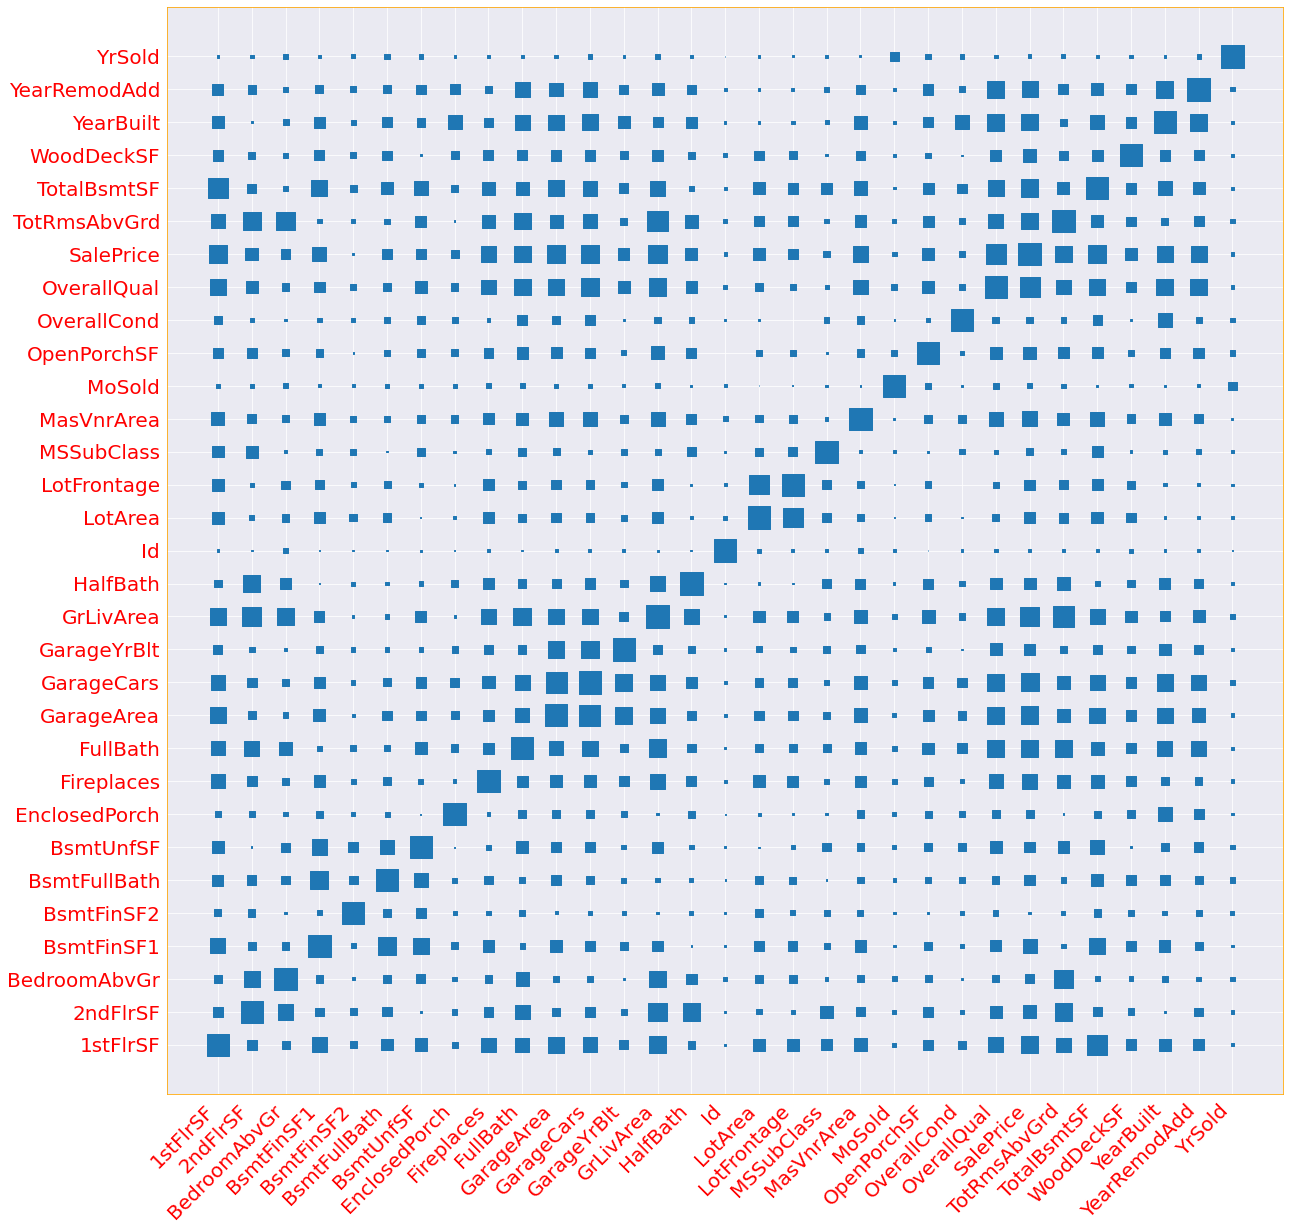

In [45]:
## ANALYSIS OF DATA ###

# Source (https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)
def heatmap(x, y, size):
  with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red', 'figure.facecolor':'white'}):
  # Temporary rc parameters in effect
    fig, ax = plt.subplots(figsize=(20,20))
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)

corr = ds_train.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [0]:
# Create power predictive score for train set
pps_train  = pps.matrix(ds_train)

In [58]:
pps_train.iloc[[-1]]

Id  MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  \
SalePrice 0.000       0.128     0.051        0.016    0.000     0.014   

           LandContour  LotConfig  Neighborhood  Condition1  BldgType  \
SalePrice        0.000      0.000         0.341       0.000     0.000   

           HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
SalePrice       0.028        0.442        0.043      0.197         0.135   

           RoofStyle  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
SalePrice      0.000        0.080        0.072       0.061       0.000   

           ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
SalePrice      0.274      0.000       0.147     0.269     0.000         0.017   

           BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
SalePrice         0.078       0.000         0.000       0.000      0.000   

           TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  \
SalePrice        0.058      0.095     0.000     0.038      0.112   

           BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
SalePrice         0.000     0.190     0.013         0.000        0.263   

           TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  \
SalePrice         0.145       0.094        0.136       0.142        0.169   

           GarageFinish  GarageCars  GarageArea  GarageQual  WoodDeckSF  \
SalePrice         0.177       0.296       0.199       0.013       0.000   

           OpenPorchSF  EnclosedPorch  MoSold  YrSold  SaleType  \
SalePrice        0.032          0.000   0.000   0.000     0.021   

           SaleCondition  SalePrice  
SalePrice          0.029      1.000

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'SalePrice distribution')

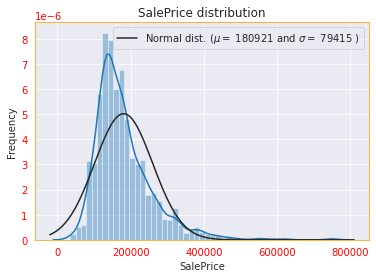

In [47]:
sns.distplot(ds_train['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(ds_train['SalePrice'])
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.0f} and $\sigma=$ {:.0f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [0]:
analyser = DataAnalysis(ds_train, ds_test)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 56.8973 |       42.2861        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


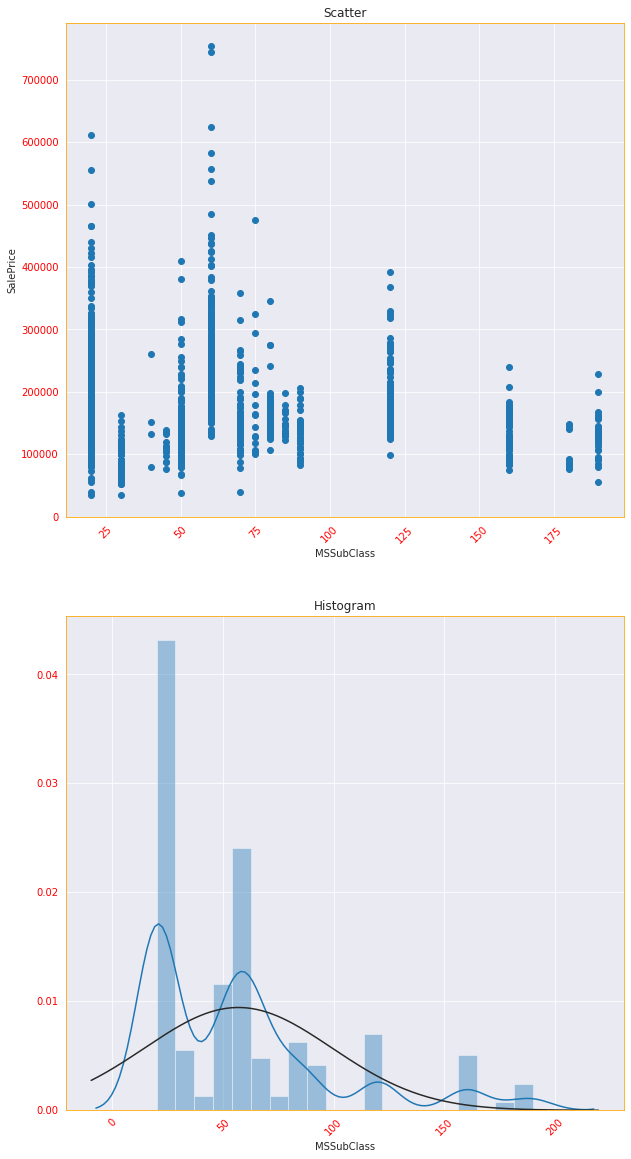

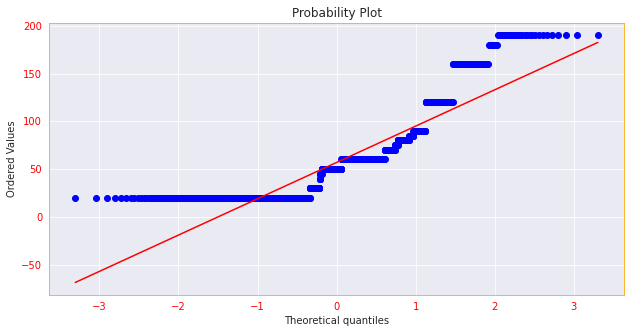

In [49]:
analyser.var_overview(var=train_columns[1], target=target)

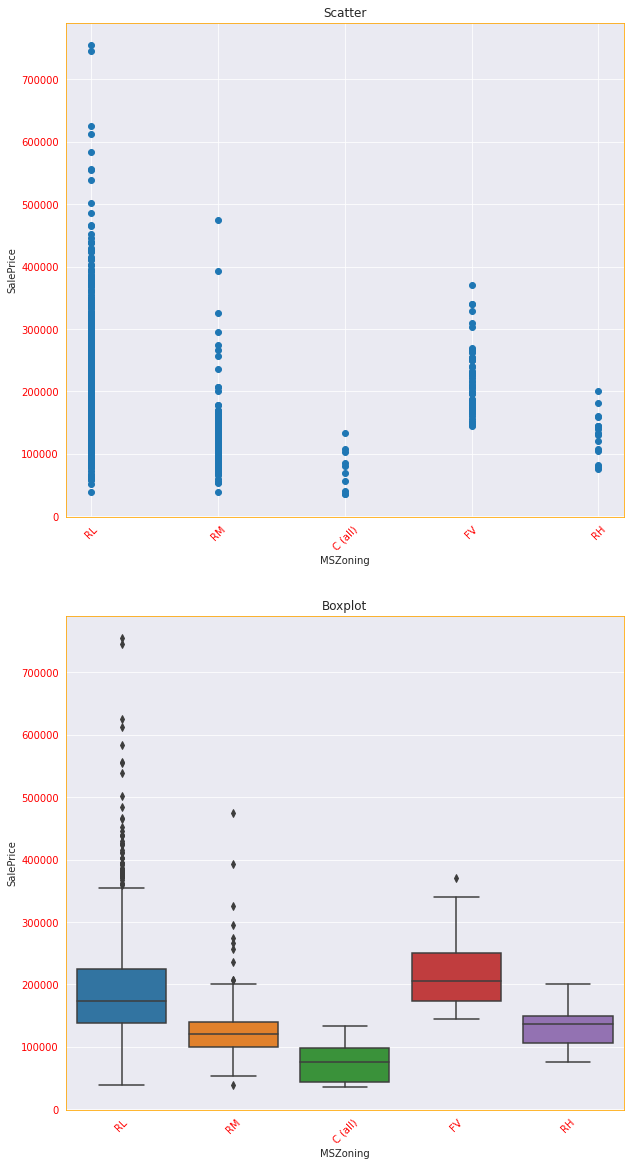

In [50]:
analyser.var_overview(var=train_columns[2], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 73.1459 |       50.9024        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


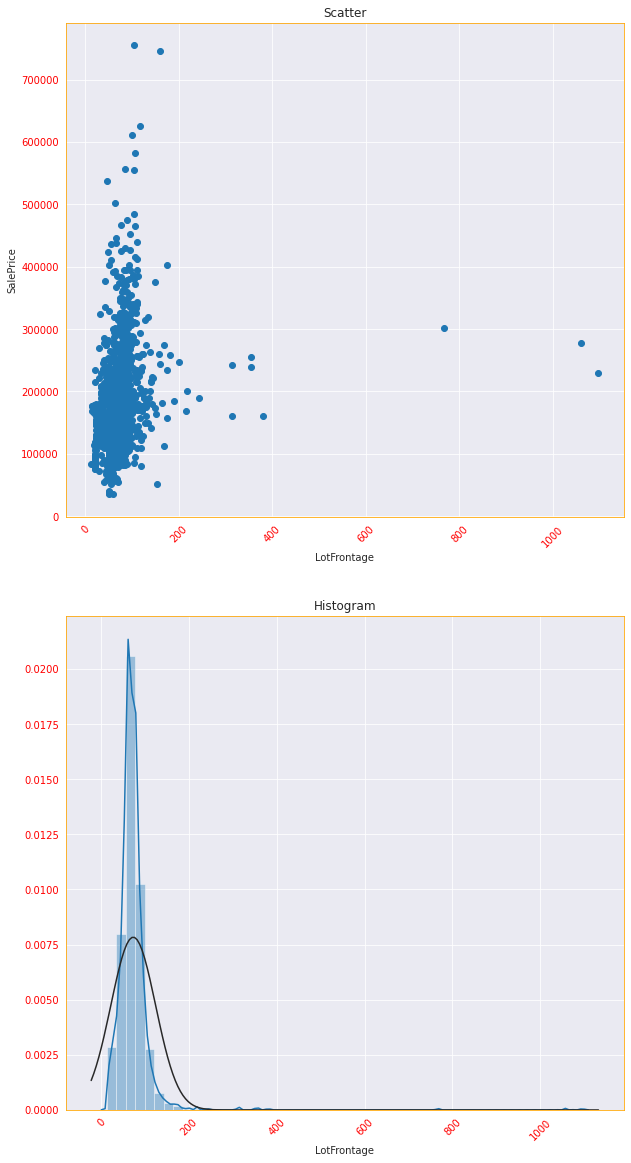

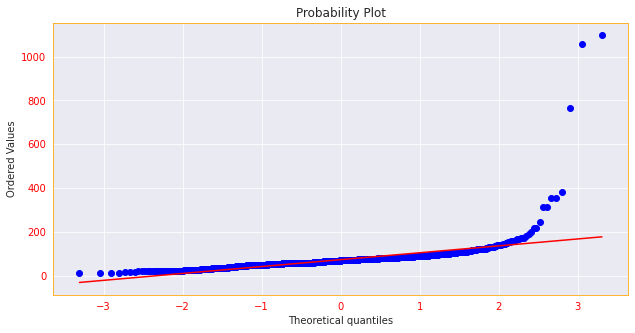

In [51]:
analyser.var_overview(var=train_columns[3], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 10516.8 |       9977.85        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


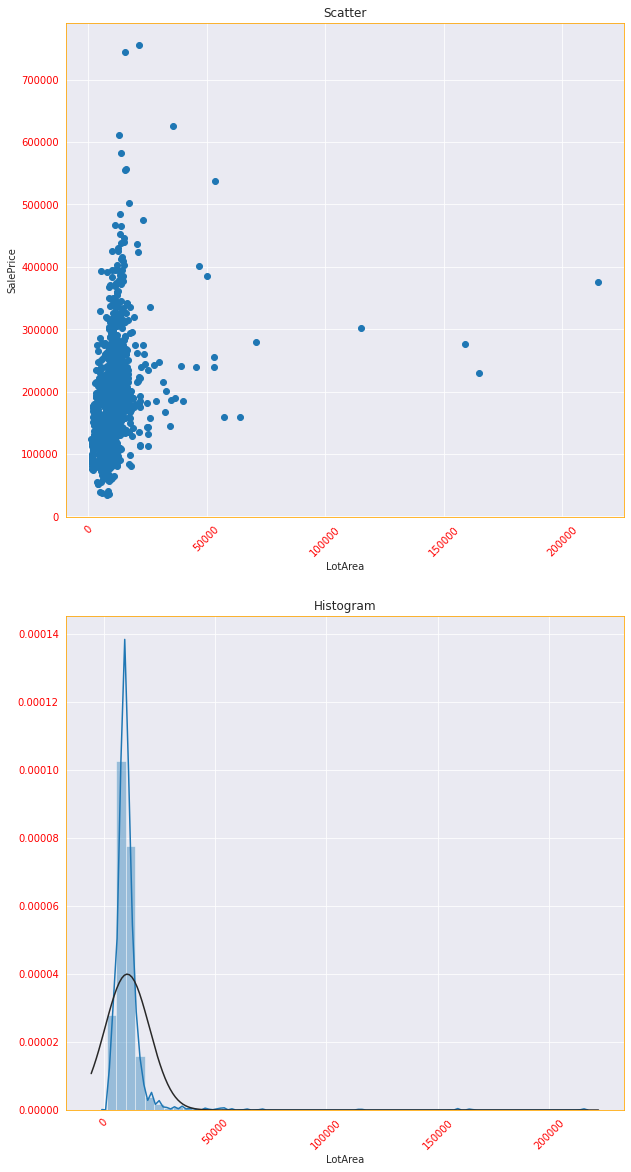

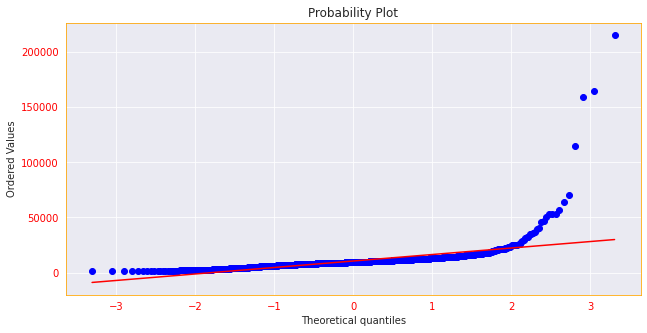

In [52]:
analyser.var_overview(var=train_columns[4], target=target)

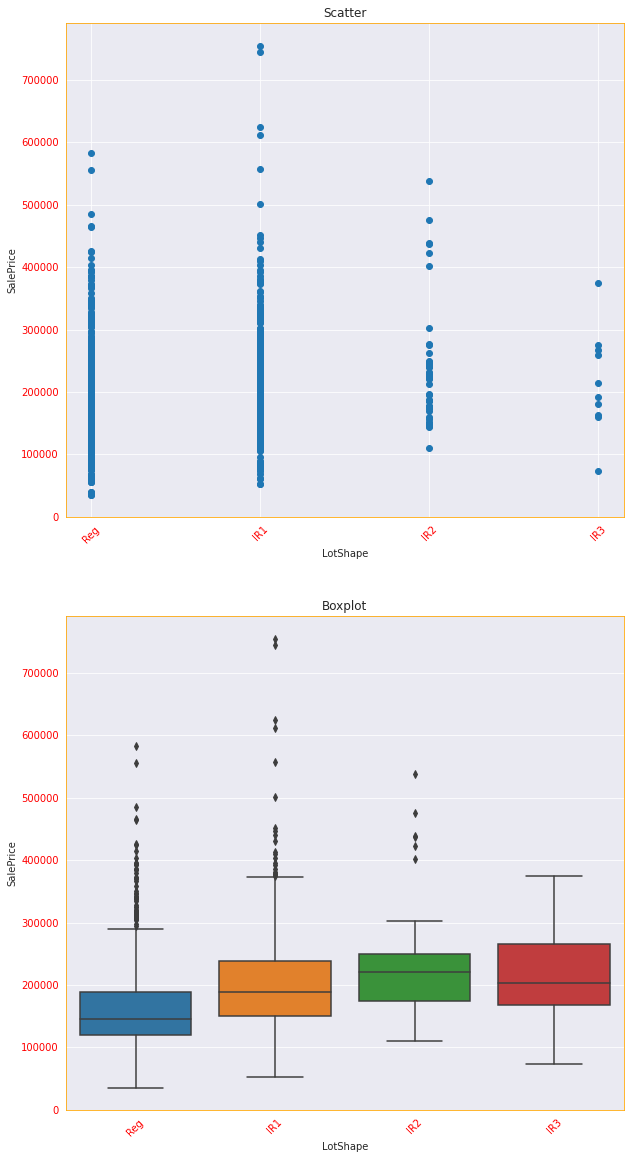

In [53]:
analyser.var_overview(var=train_columns[5], target=target)

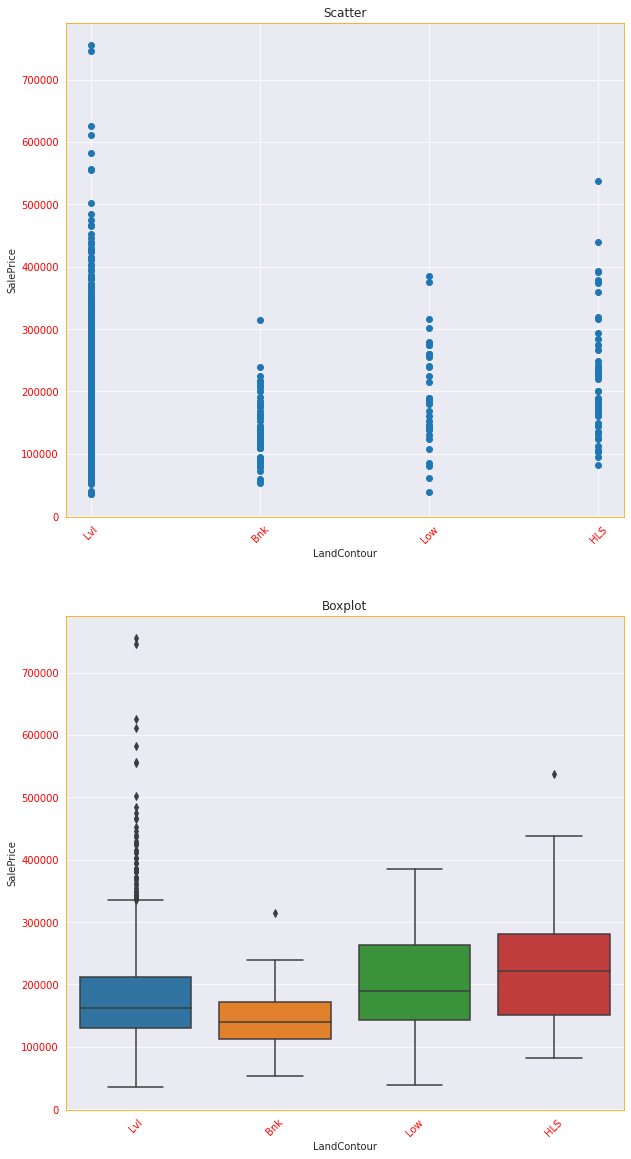

In [54]:
analyser.var_overview(var=train_columns[6], target=target)

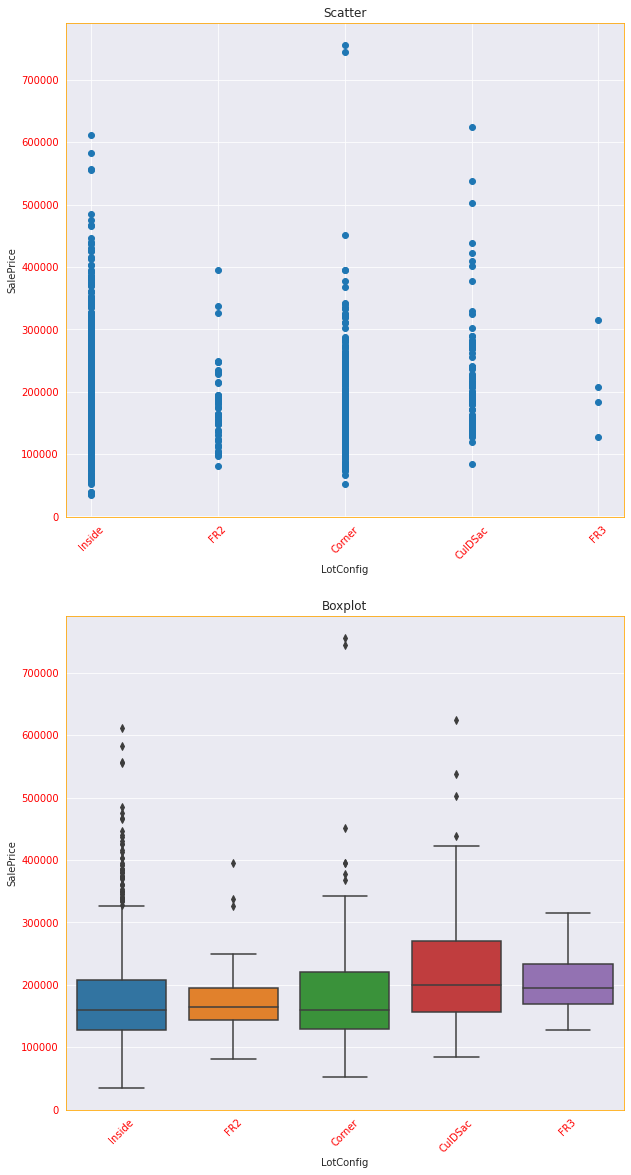

In [55]:
analyser.var_overview(var=train_columns[7], target=target)

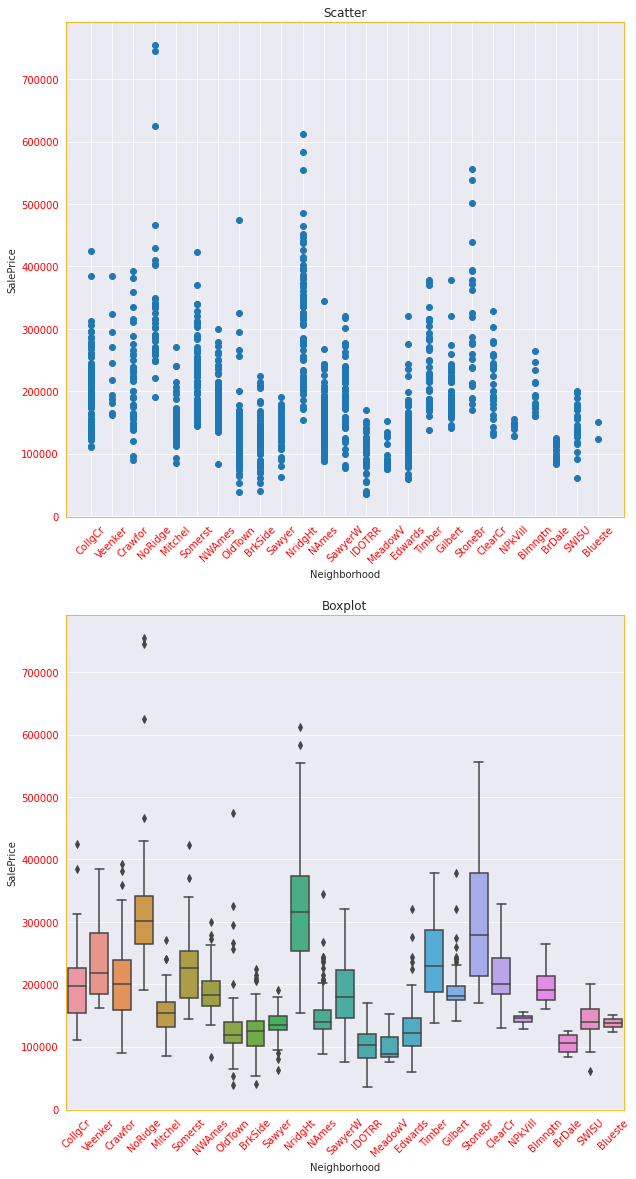

In [56]:
analyser.var_overview(var=train_columns[8], target=target)

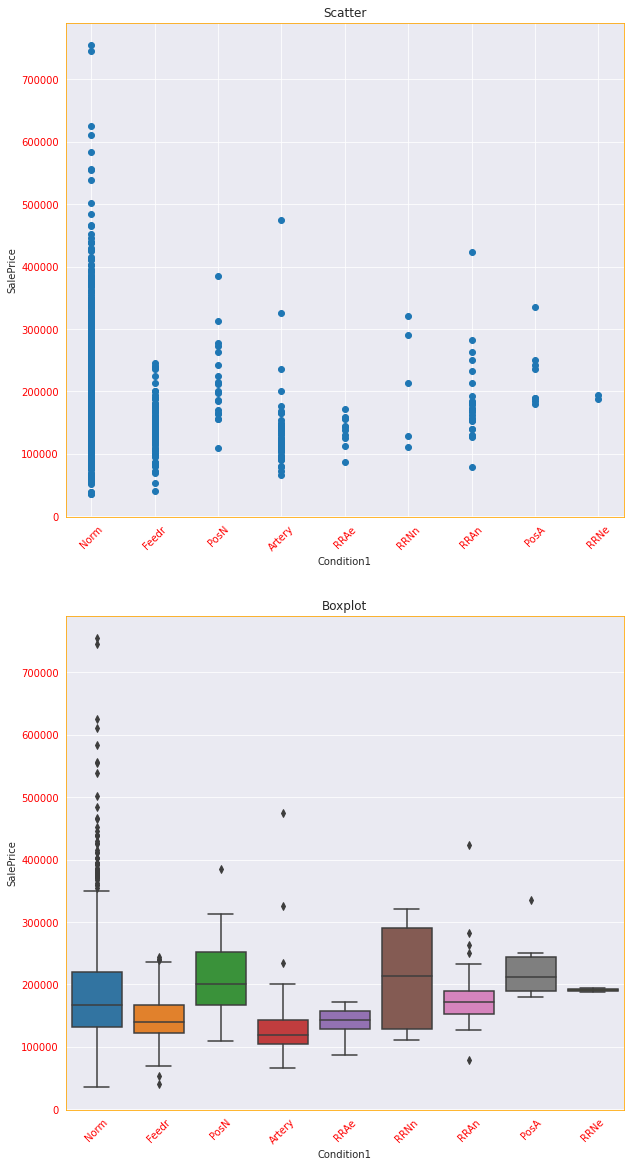

In [57]:
analyser.var_overview(var=train_columns[9], target=target)

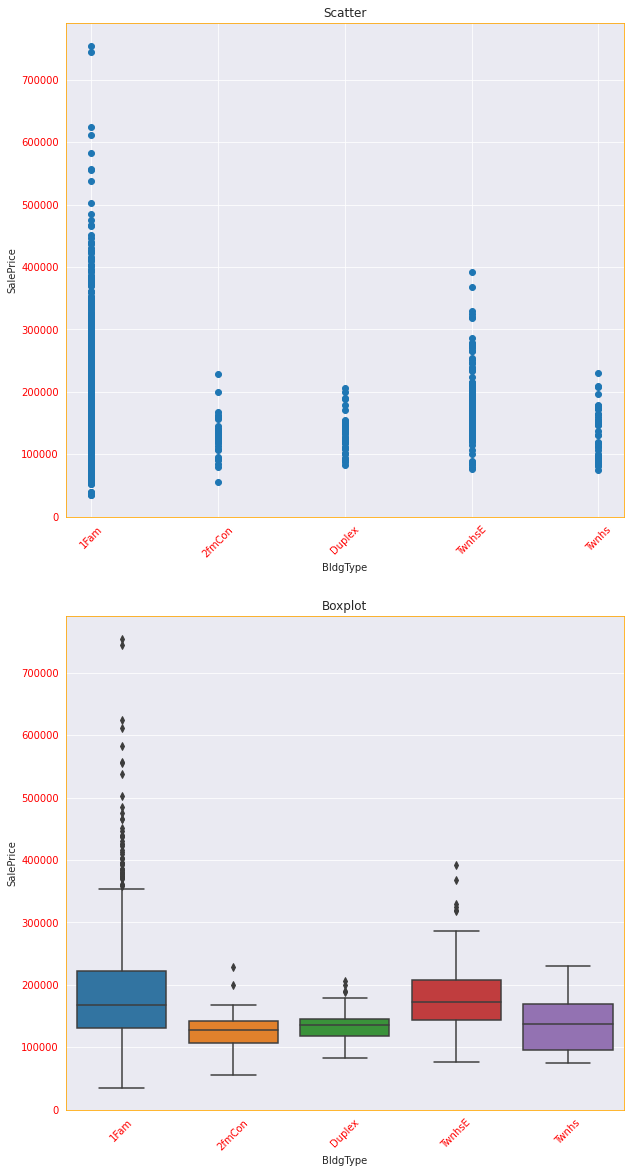

In [58]:
analyser.var_overview(var=train_columns[10], target=target)

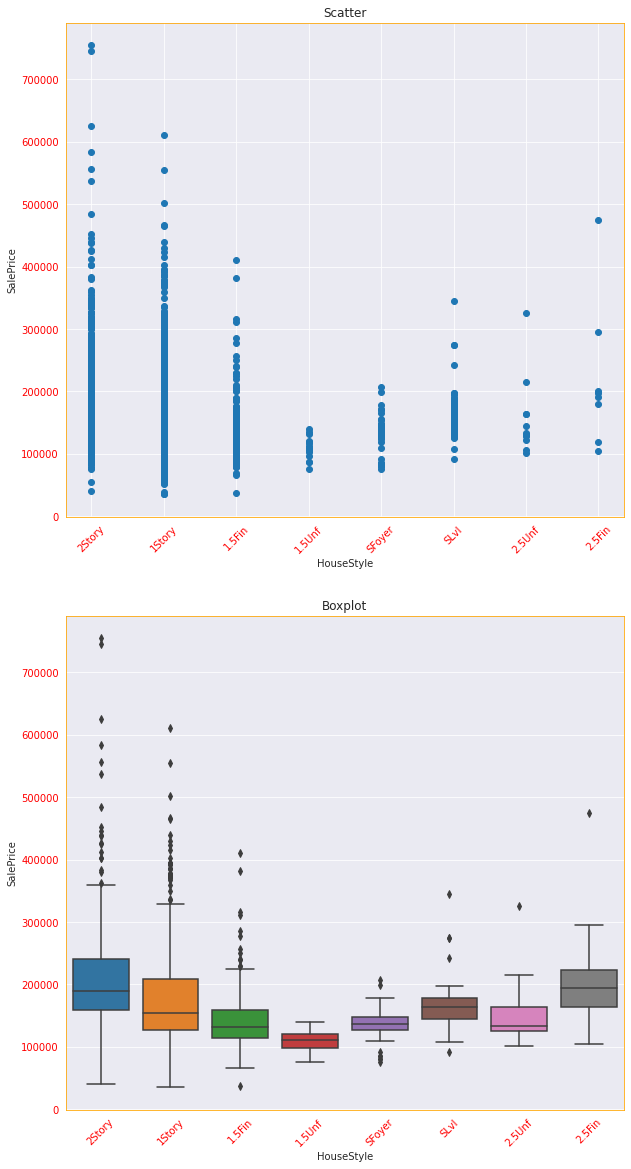

In [59]:
analyser.var_overview(var=train_columns[11], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 6.09932 |       1.38252        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


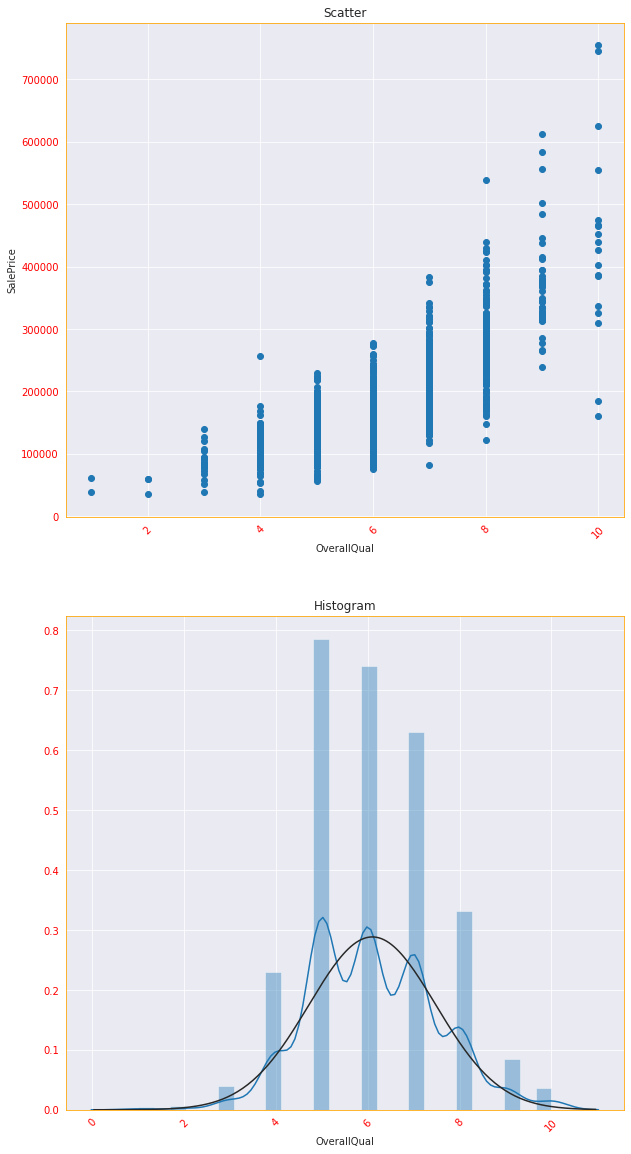

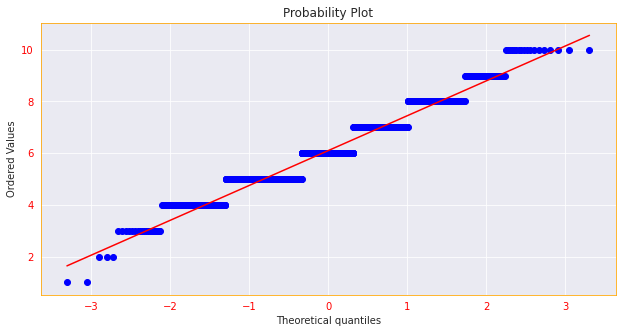

In [60]:
analyser.var_overview(var=train_columns[12], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 6.09932 |       1.38252        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


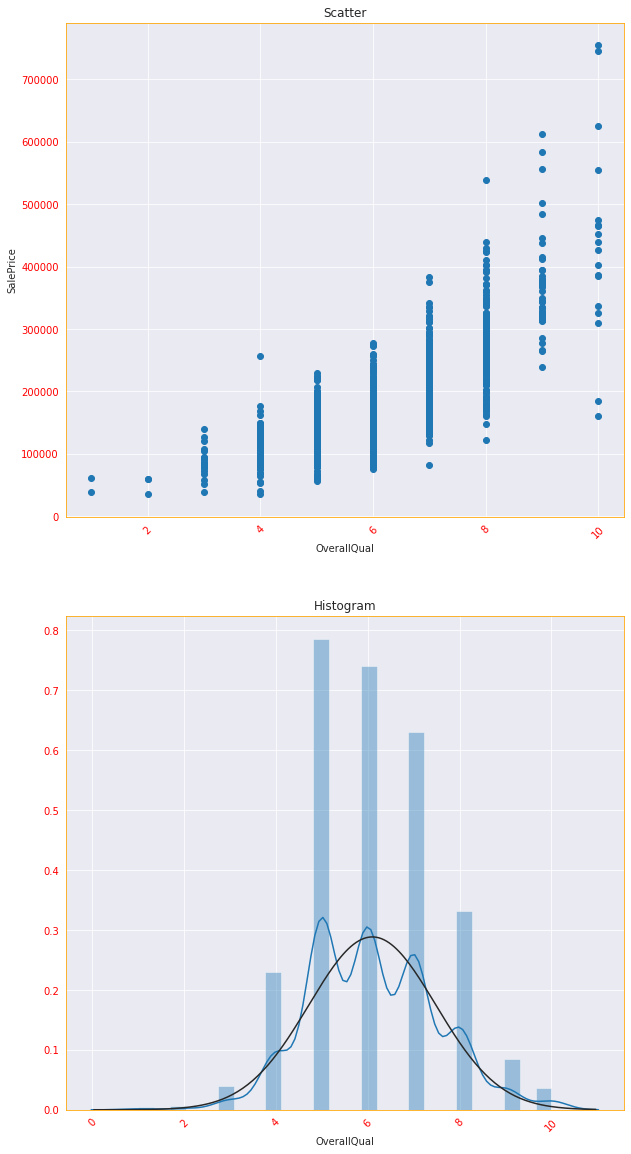

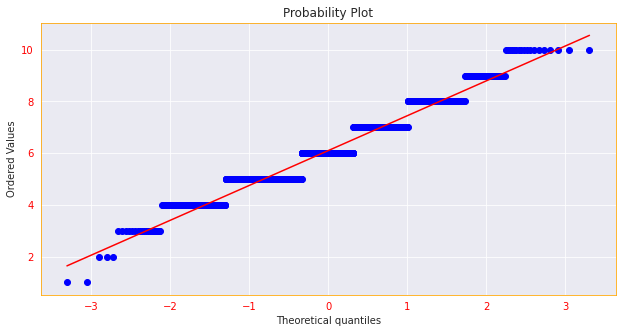

In [61]:
analyser.var_overview(var=train_columns[12], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 5.57534 |       1.11242        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


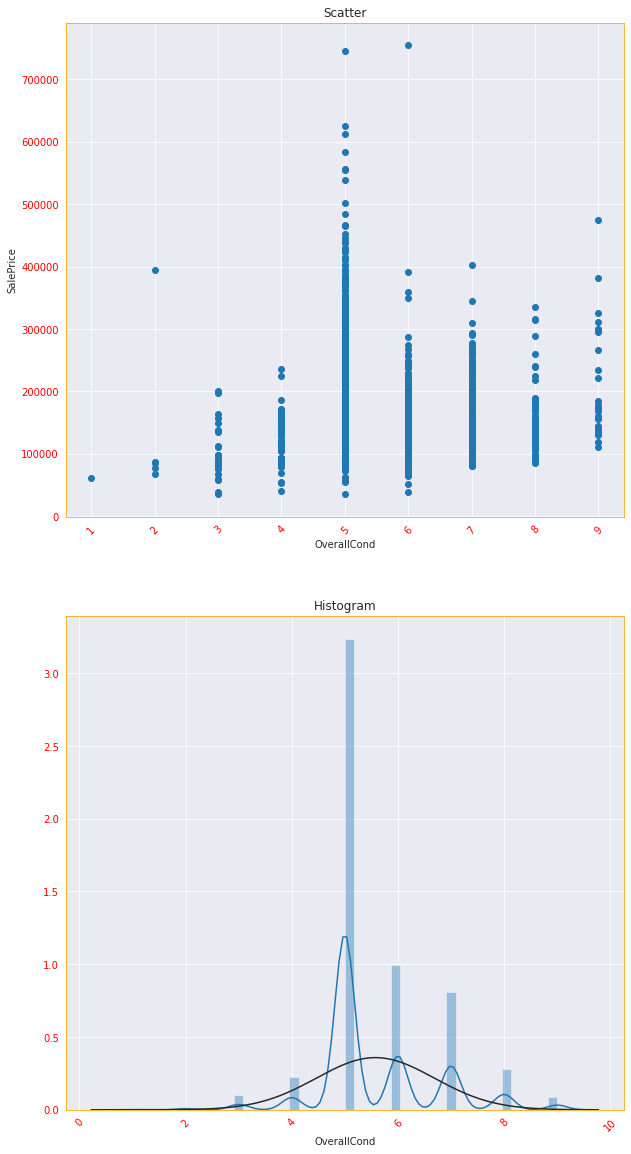

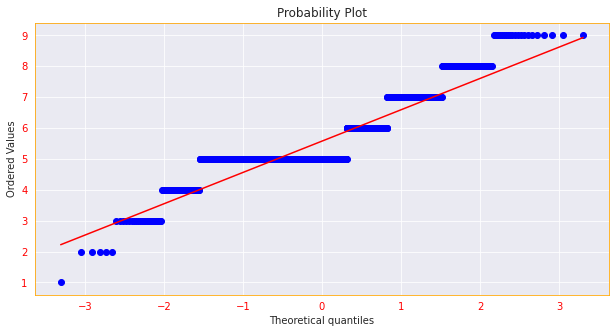

In [62]:
analyser.var_overview(var=train_columns[13], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1971.27 |       30.1926        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


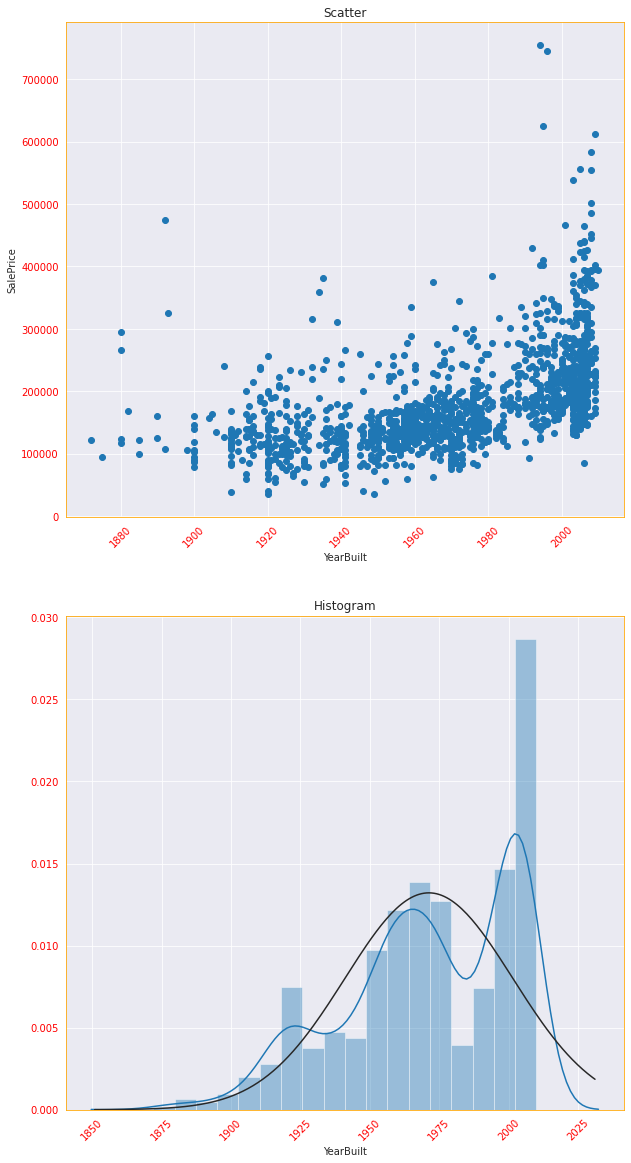

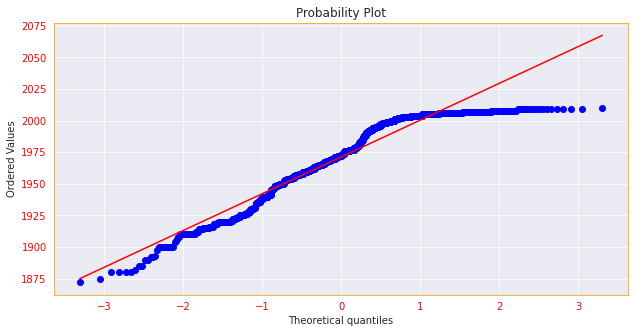

In [63]:
analyser.var_overview(var=train_columns[14], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1984.87 |       20.6383        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


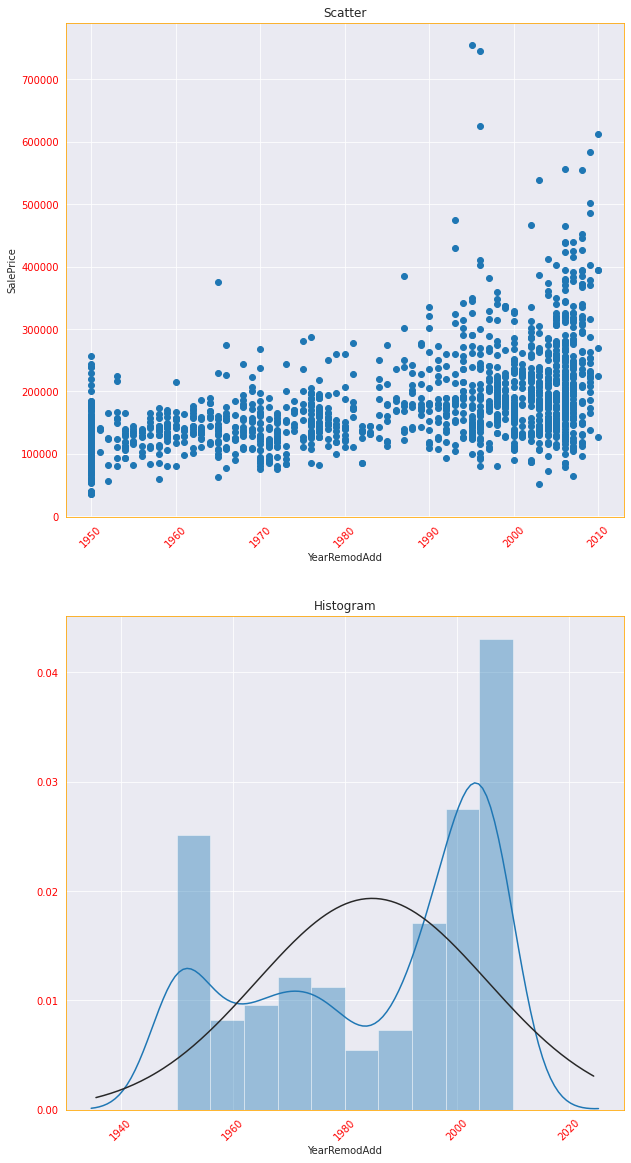

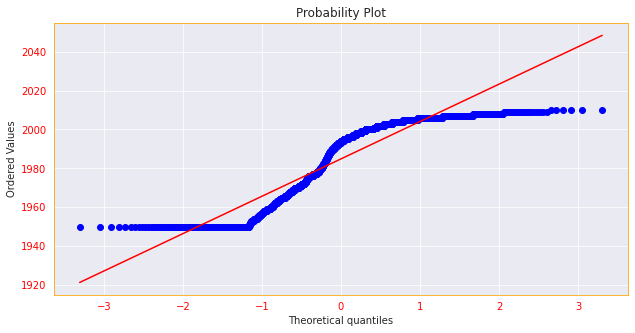

In [64]:
analyser.var_overview(var=train_columns[15], target=target)

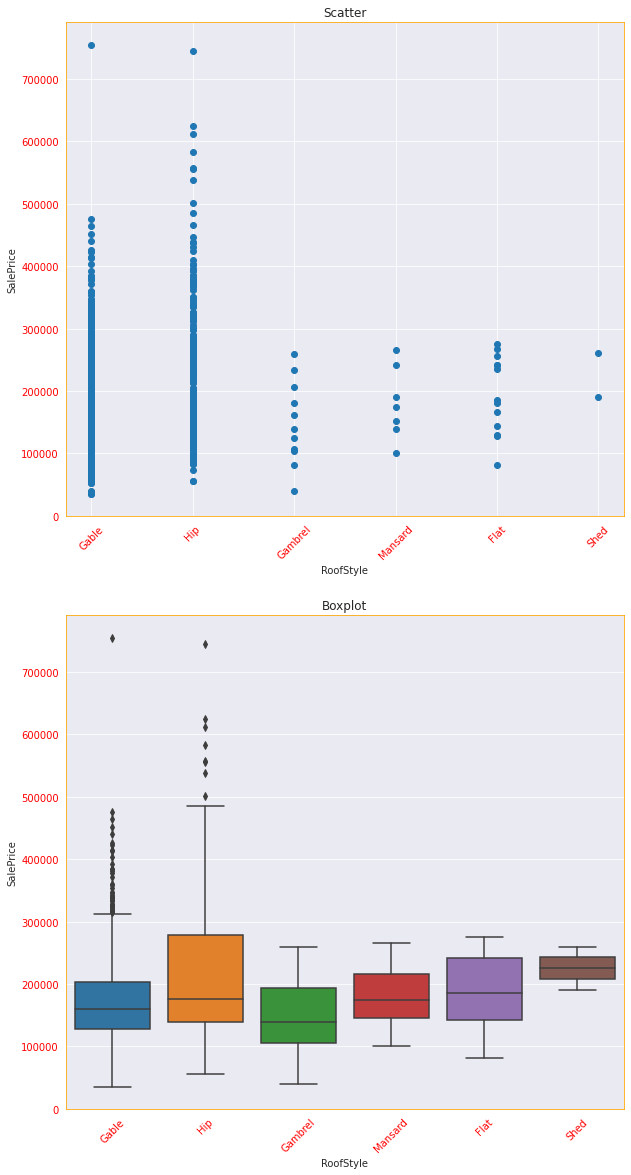

In [65]:
analyser.var_overview(var=train_columns[16], target=target)

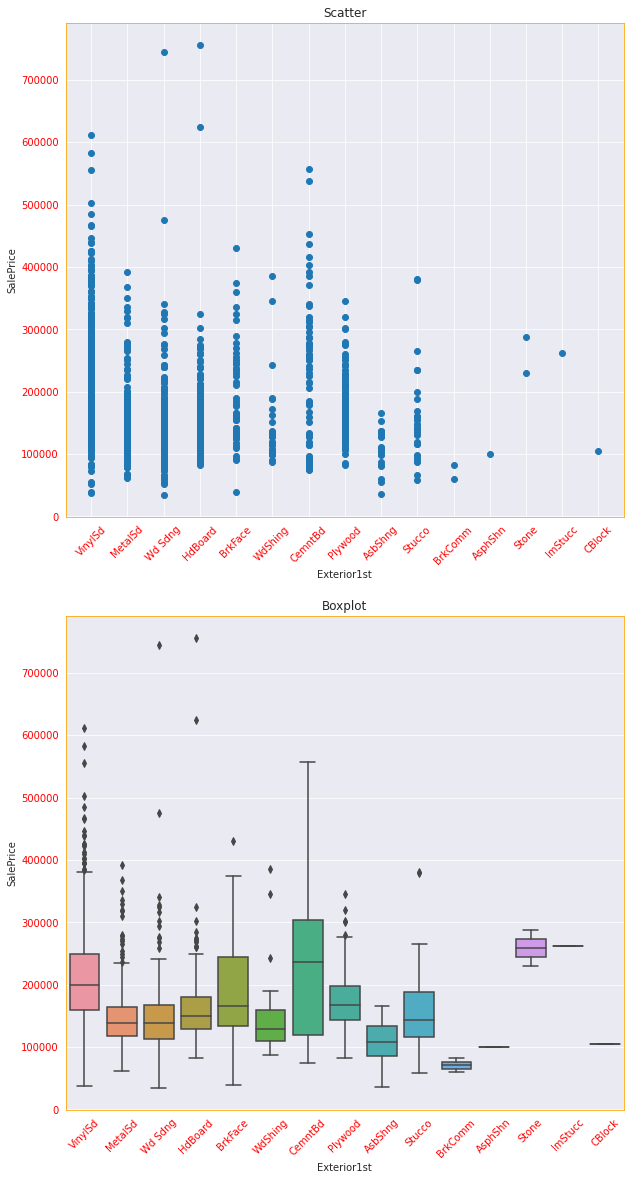

In [66]:
analyser.var_overview(var=train_columns[17], target=target)

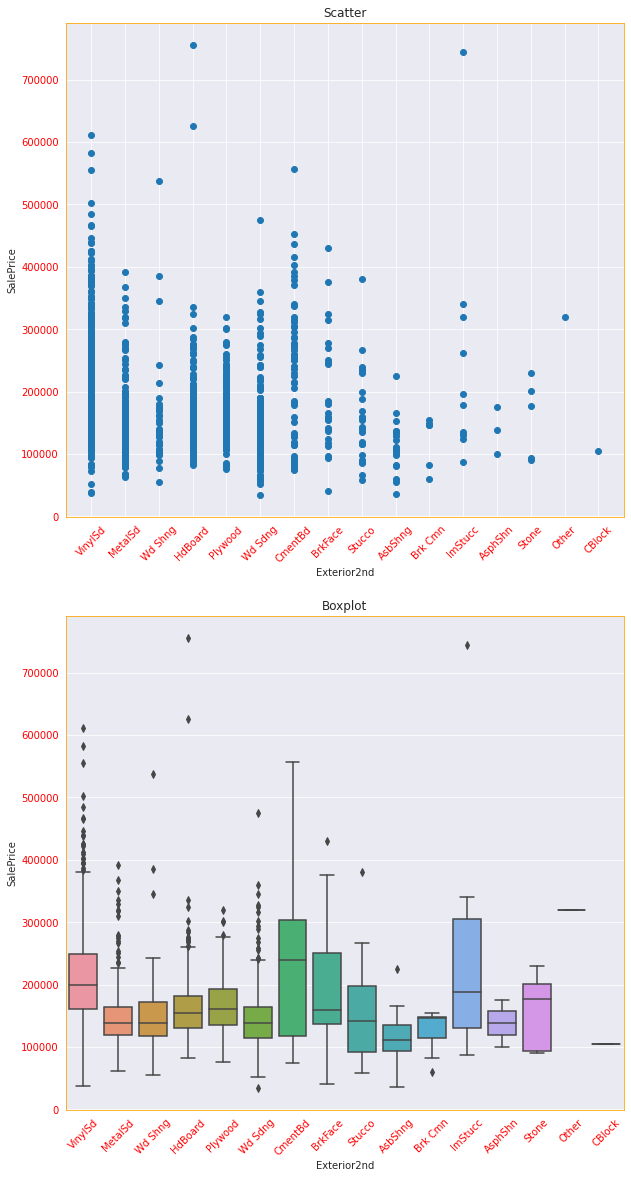

In [67]:
analyser.var_overview(var=train_columns[18], target=target)

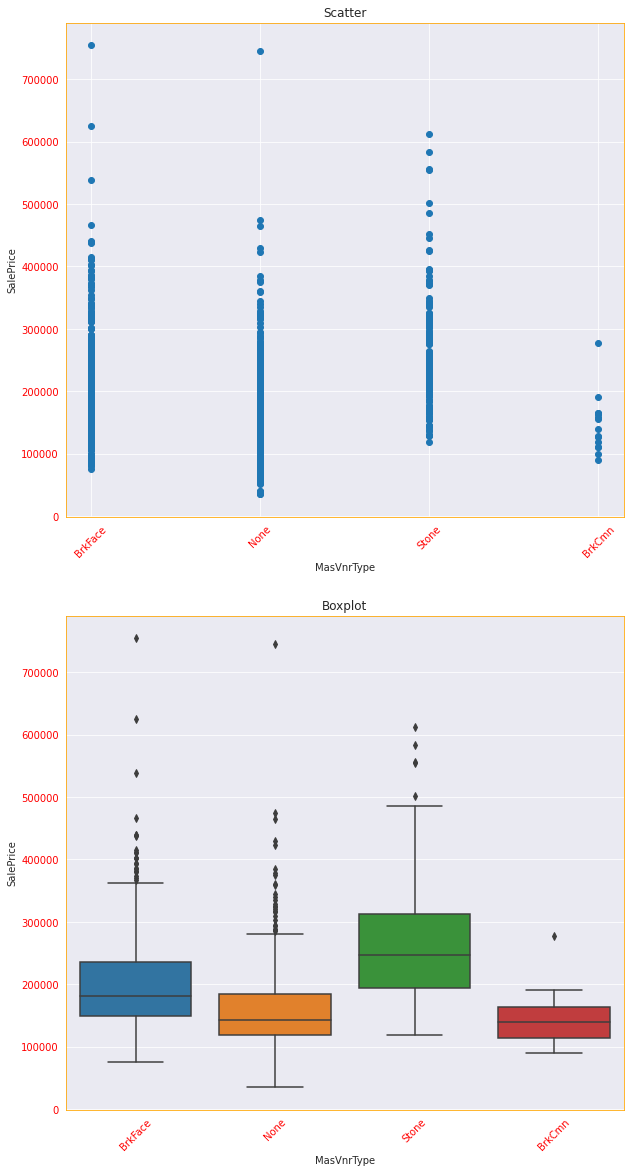

In [68]:
analyser.var_overview(var=train_columns[19], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 103.117 |       180.669        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


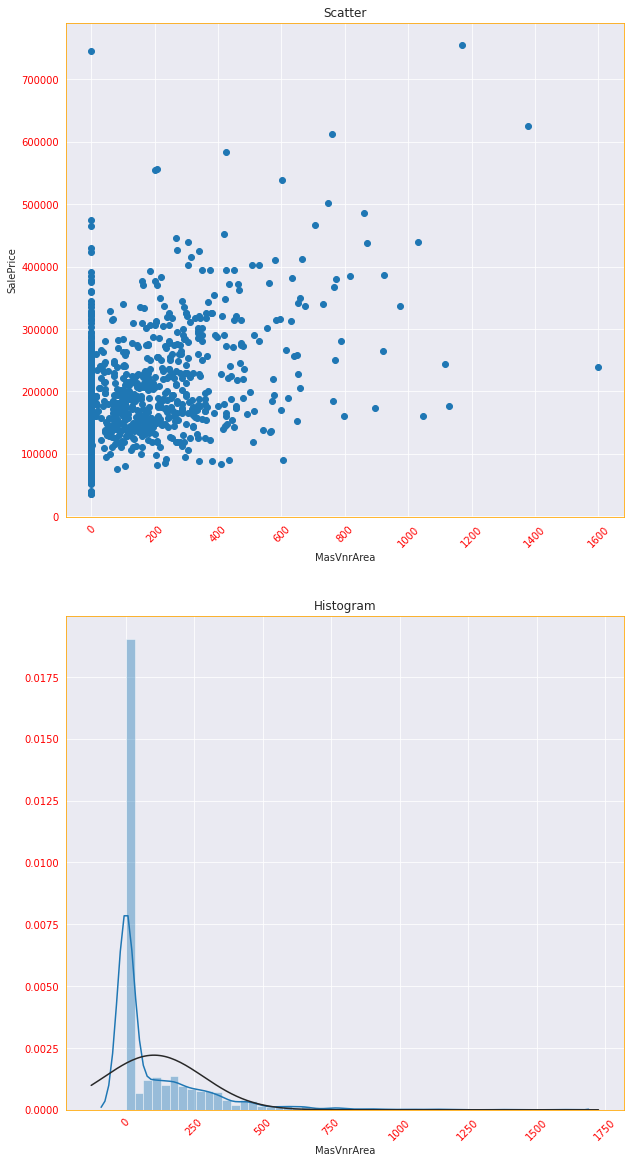

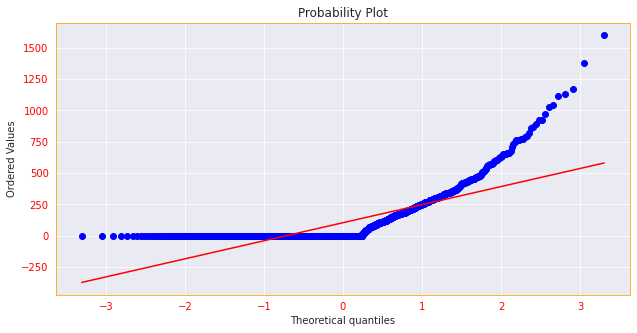

In [69]:
analyser.var_overview(var=train_columns[20], target=target)

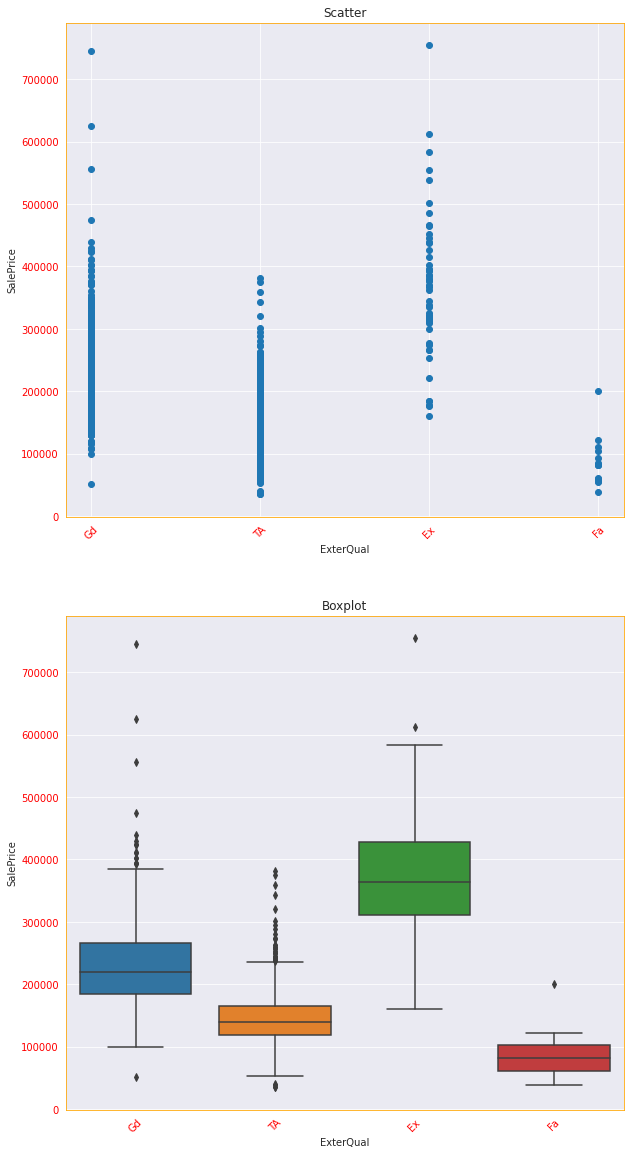

In [70]:
analyser.var_overview(var=train_columns[21], target=target)

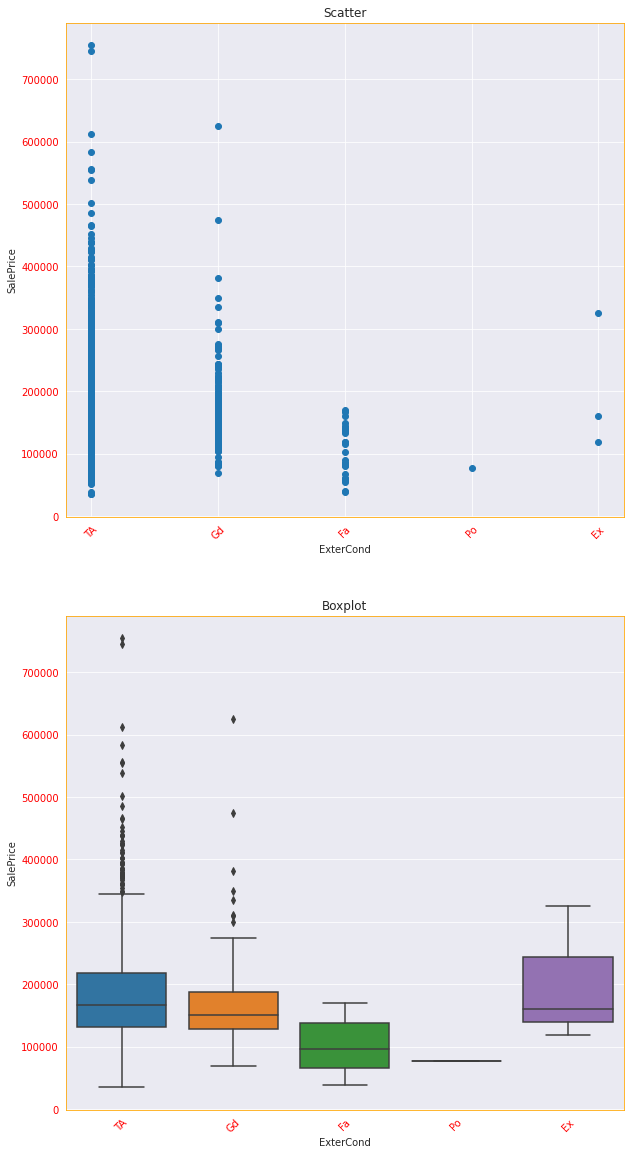

In [71]:
analyser.var_overview(var=train_columns[22], target=target)

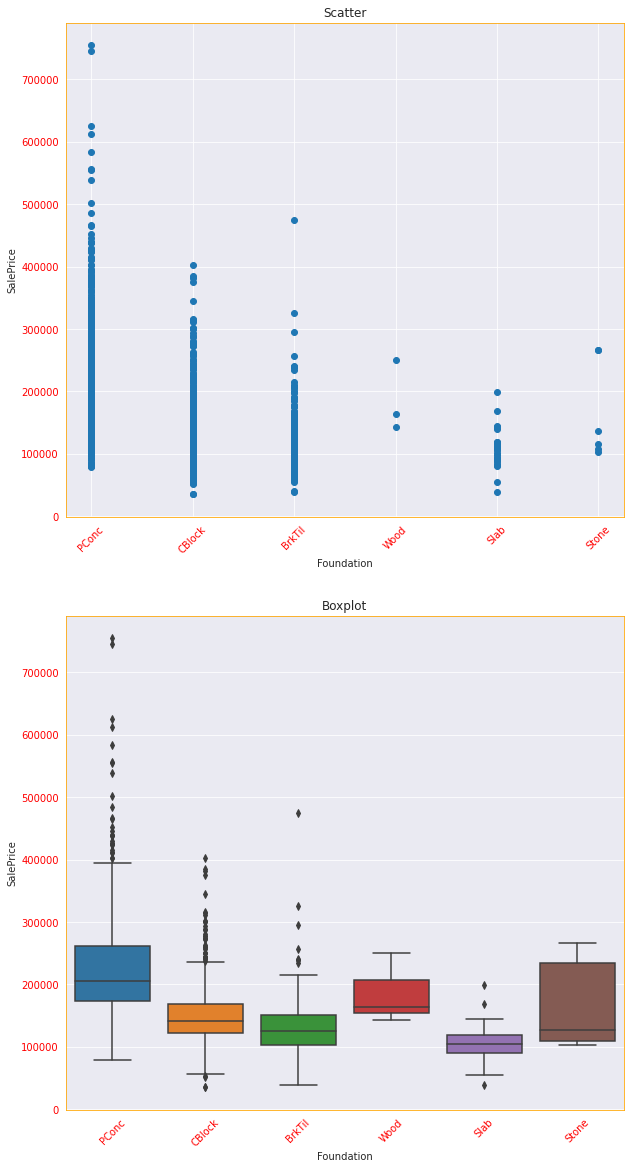

In [72]:
analyser.var_overview(var=train_columns[23], target=target)

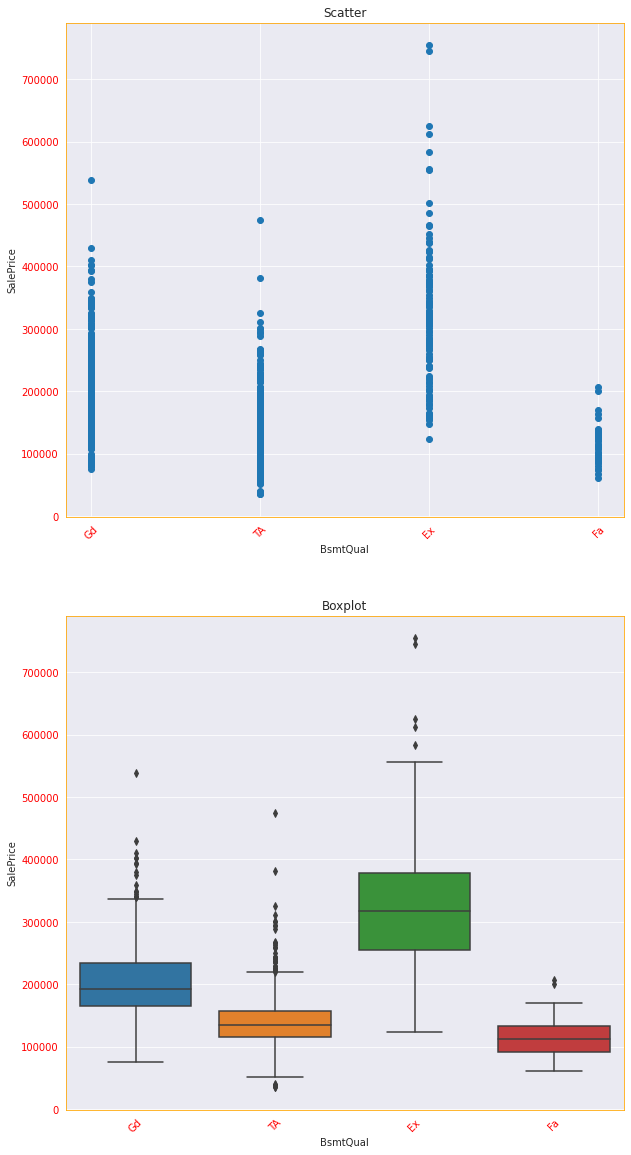

In [73]:
analyser.var_overview(var=train_columns[24], target=target)

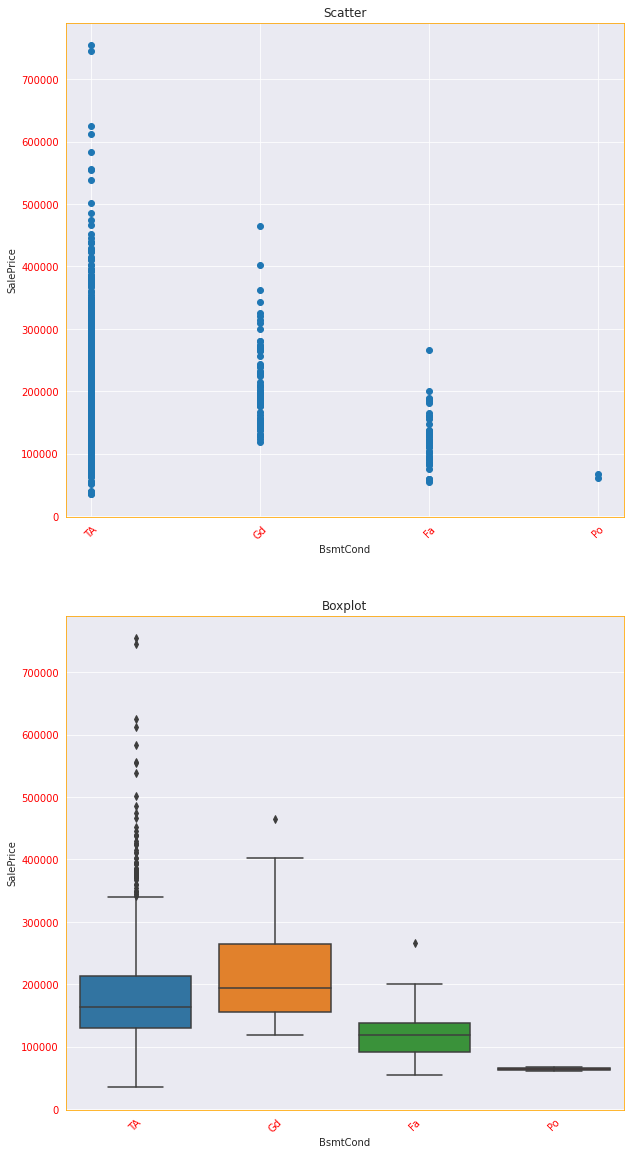

In [74]:
analyser.var_overview(var=train_columns[25], target=target)

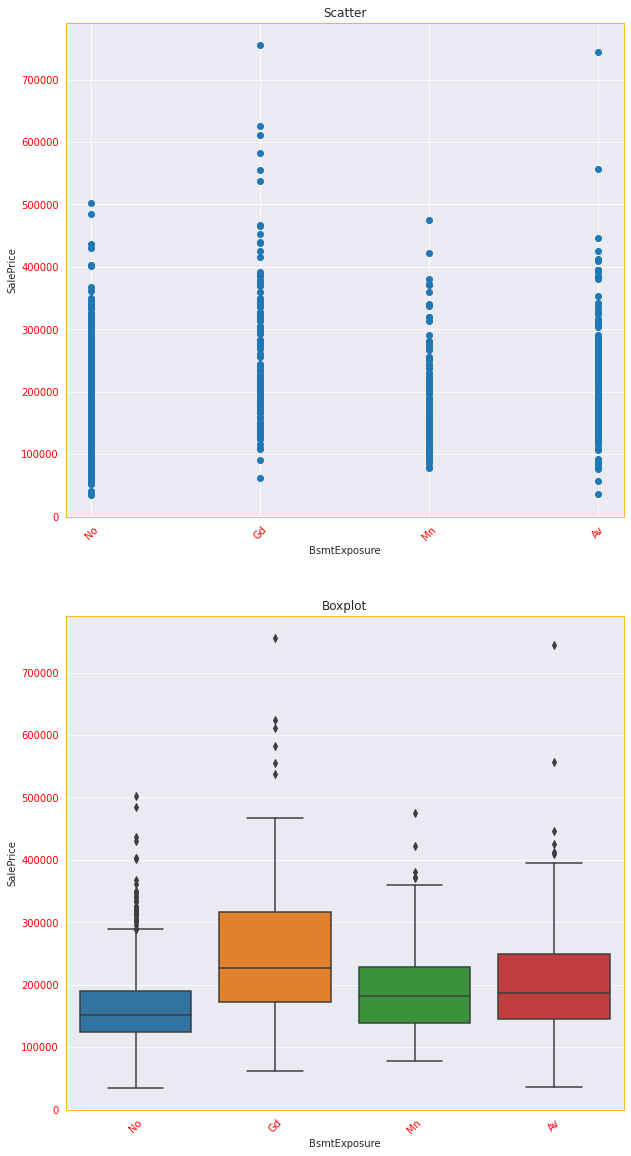

In [75]:
analyser.var_overview(var=train_columns[26], target=target)

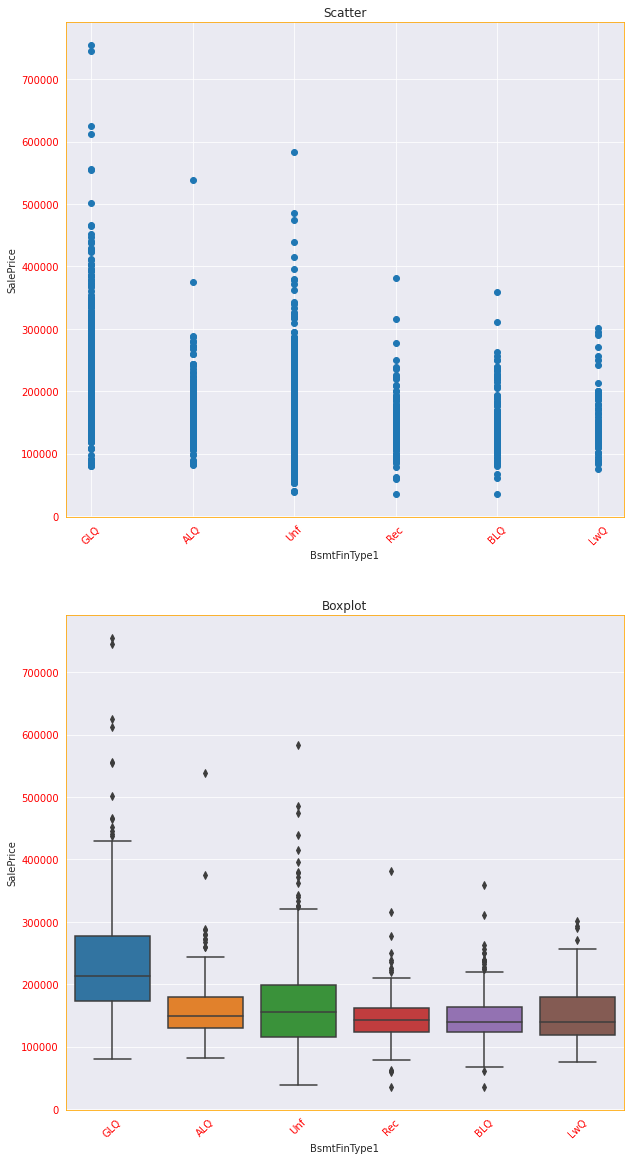

In [76]:
analyser.var_overview(var=train_columns[27], target=target)

+----------+--------+----------------------+
| DATA     |  MEAN  |  STANDARD DEVIATION  |
+==========+========+======================+
| Variable | 443.64 |       455.942        |
+----------+--------+----------------------+
| Target   | 180921 |       79415.3        |
+----------+--------+----------------------+


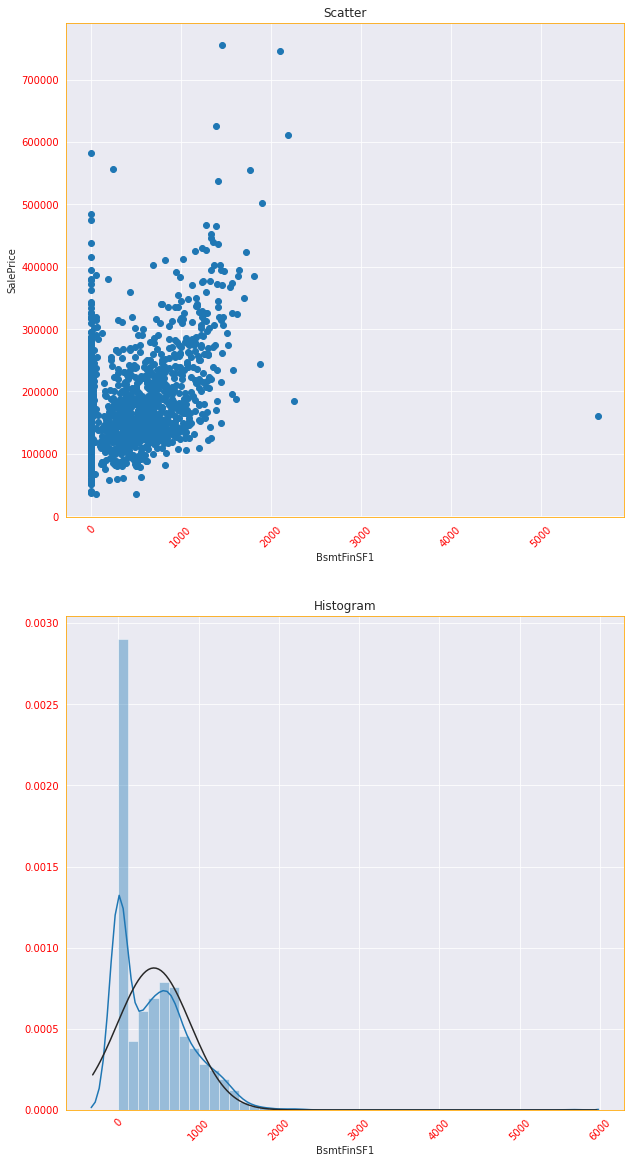

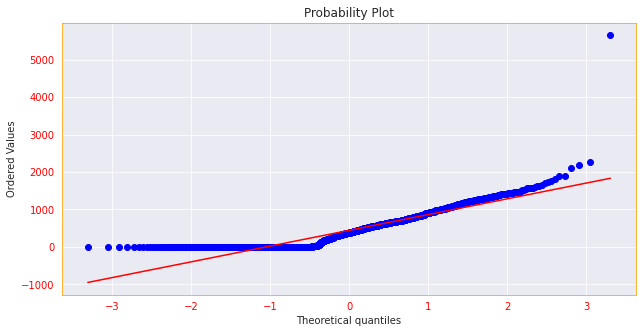

In [77]:
analyser.var_overview(var=train_columns[28], target=target)

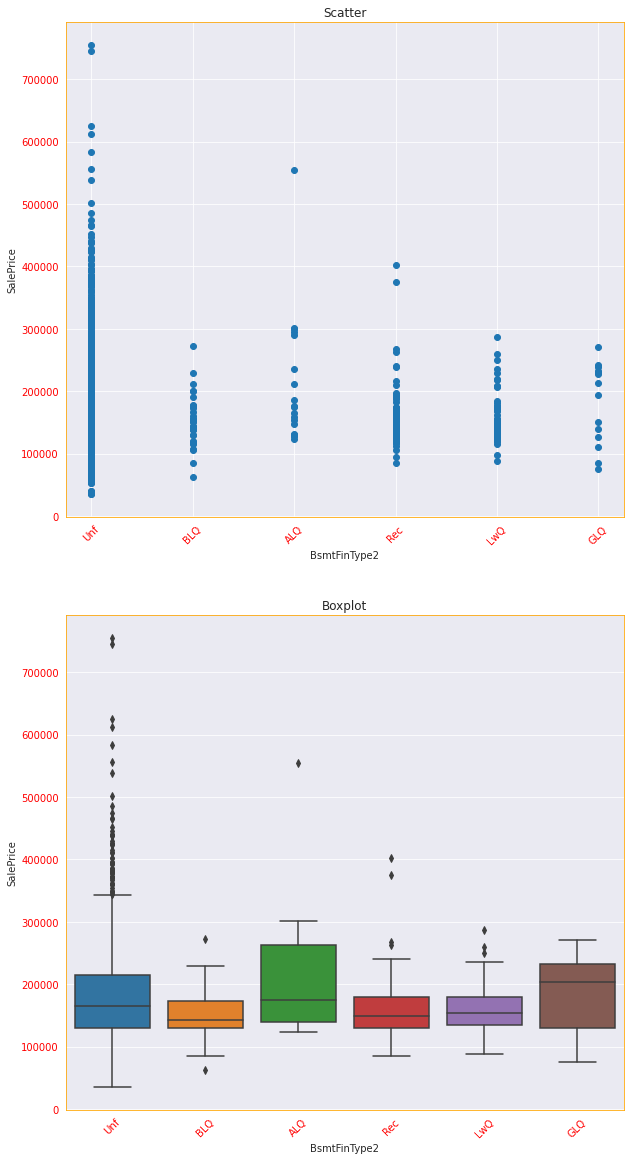

In [78]:
analyser.var_overview(var=train_columns[29], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 46.5493 |       161.264        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


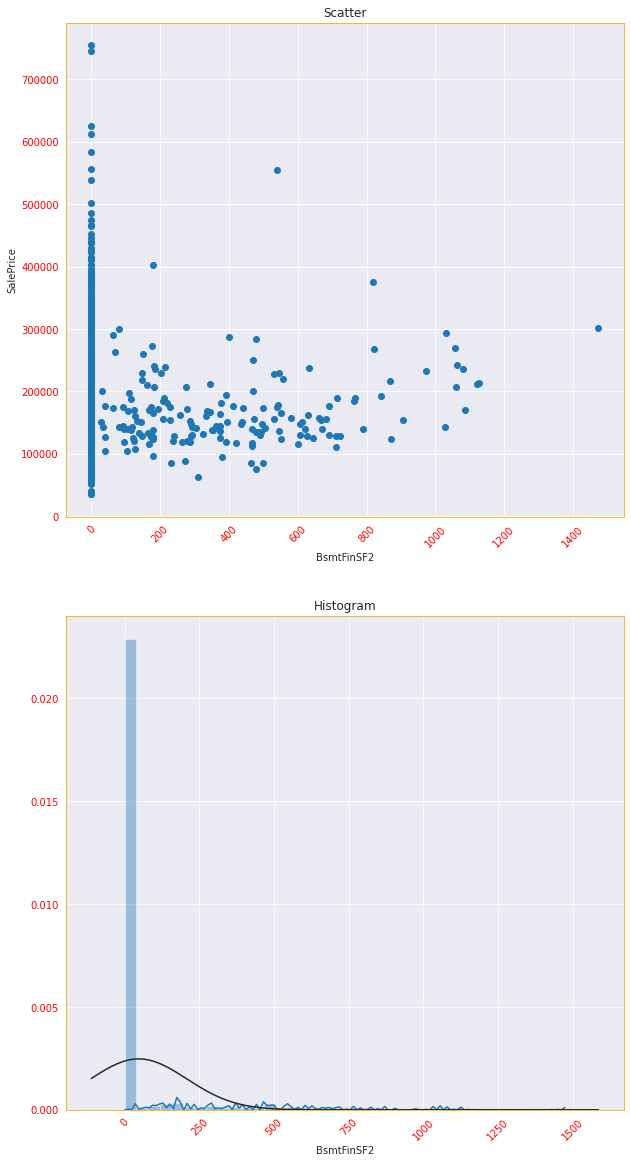

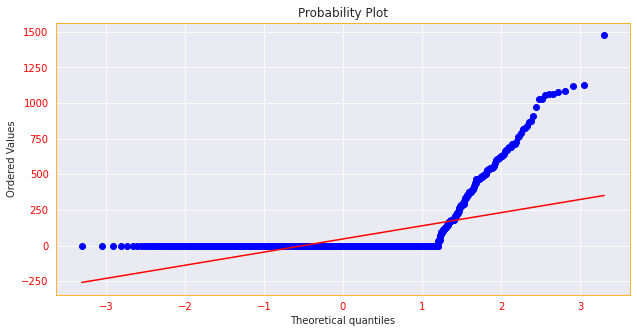

In [79]:
analyser.var_overview(var=train_columns[30], target=target)

+----------+--------+----------------------+
| DATA     |  MEAN  |  STANDARD DEVIATION  |
+==========+========+======================+
| Variable | 567.24 |       441.716        |
+----------+--------+----------------------+
| Target   | 180921 |       79415.3        |
+----------+--------+----------------------+


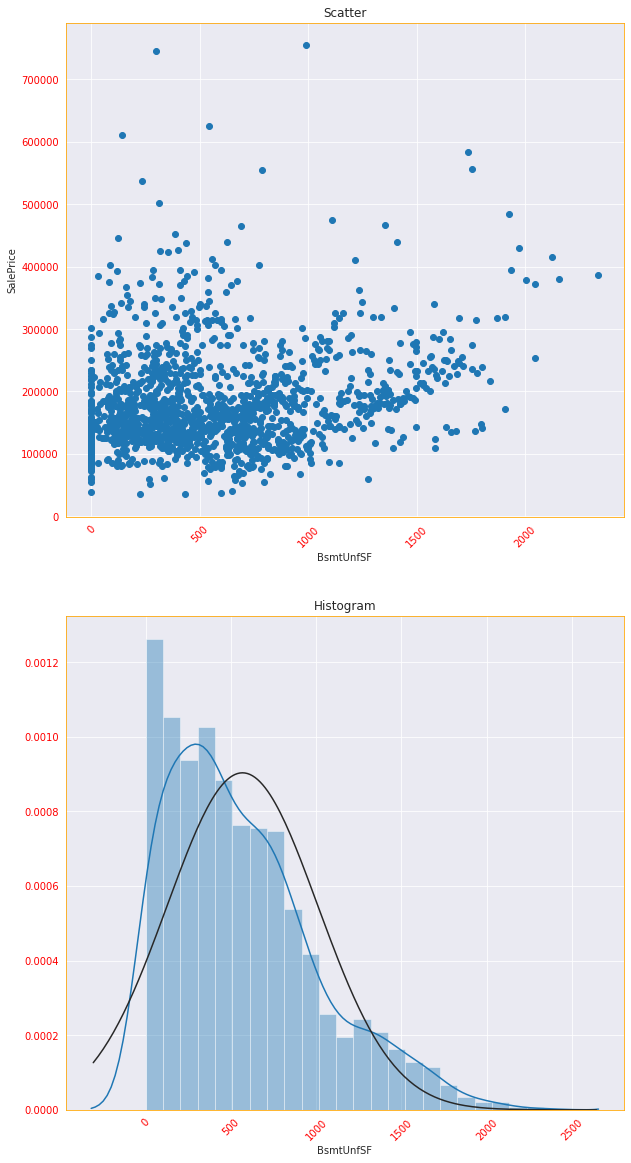

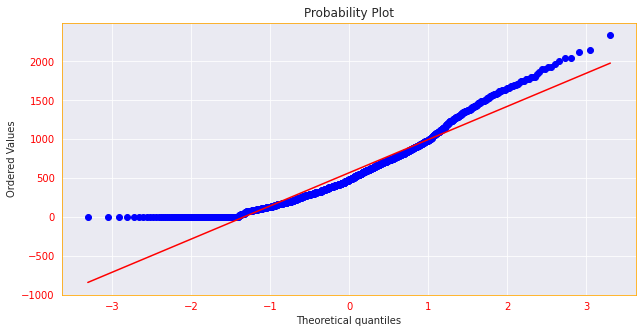

In [80]:
analyser.var_overview(var=train_columns[31], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1057.43 |       438.555        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


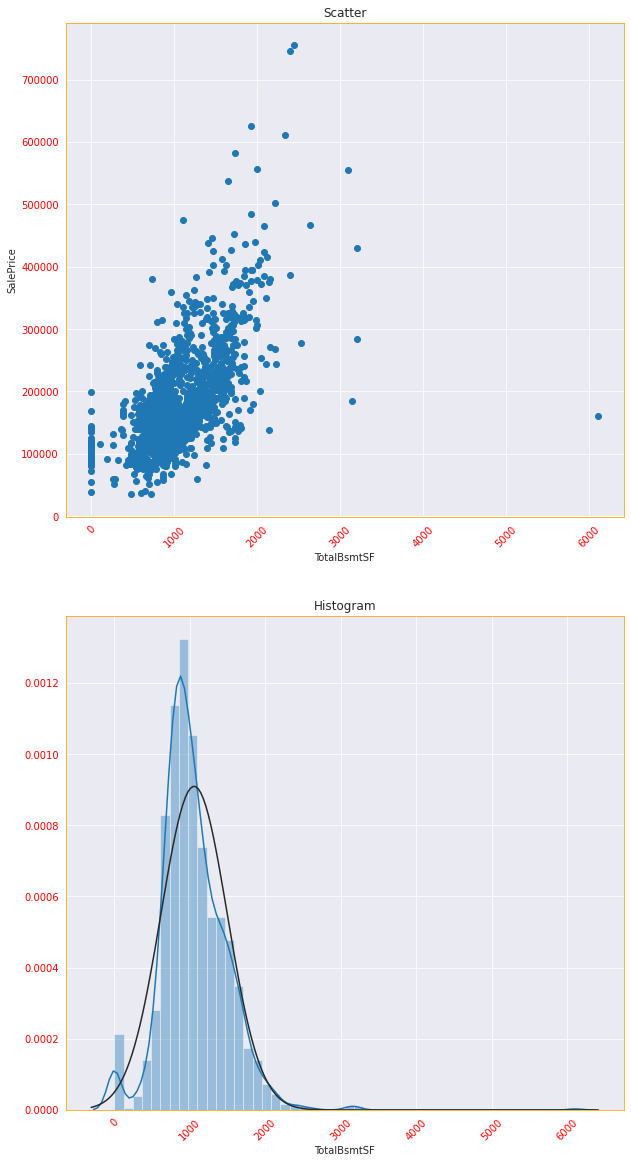

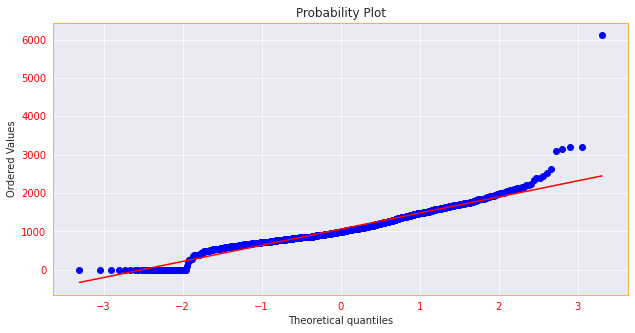

In [81]:
analyser.var_overview(var=train_columns[32], target=target)

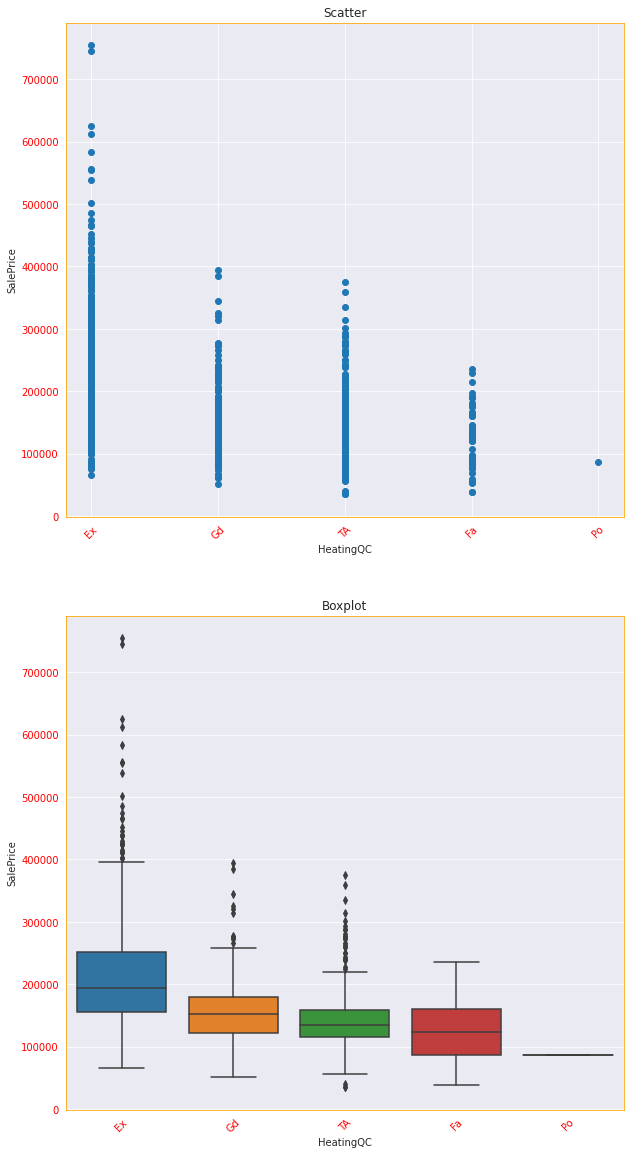

In [82]:
analyser.var_overview(var=train_columns[33], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1162.63 |       386.455        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


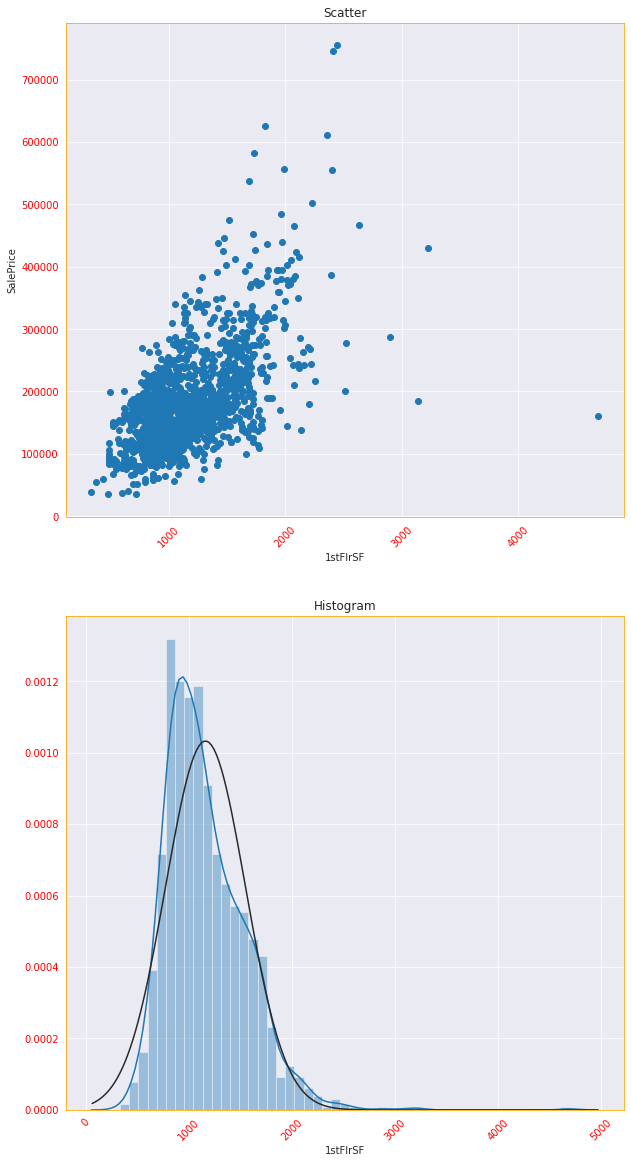

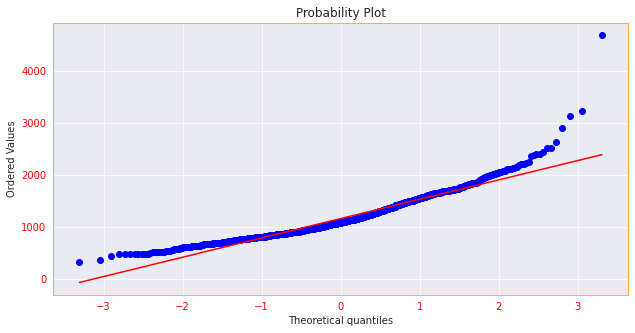

In [83]:
analyser.var_overview(var=train_columns[34], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 346.992 |       436.379        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


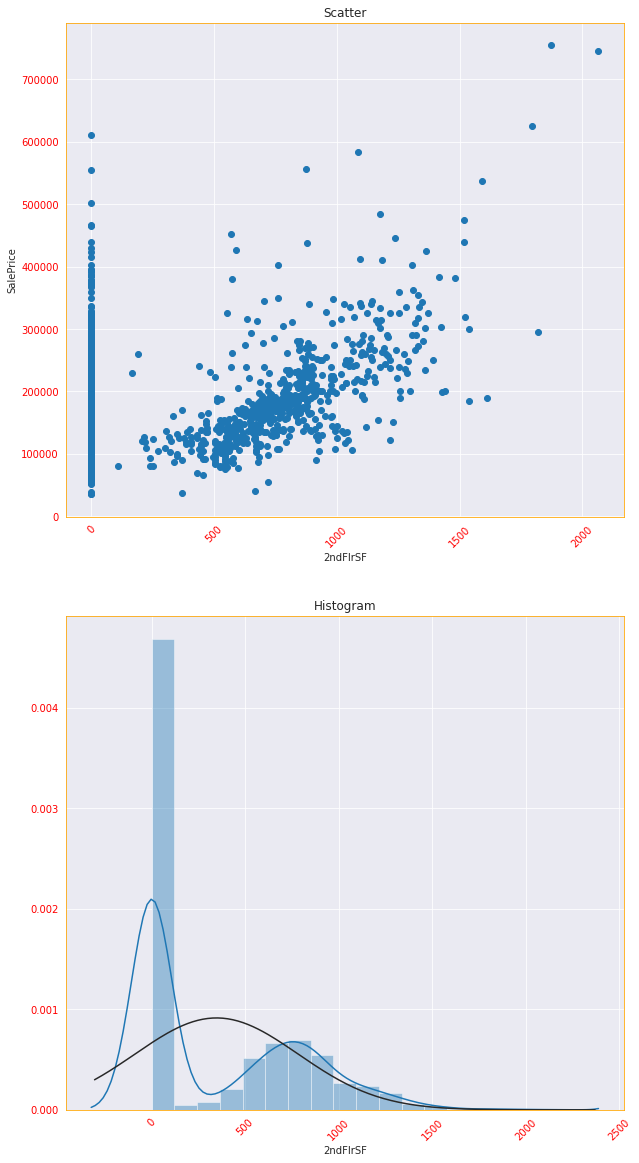

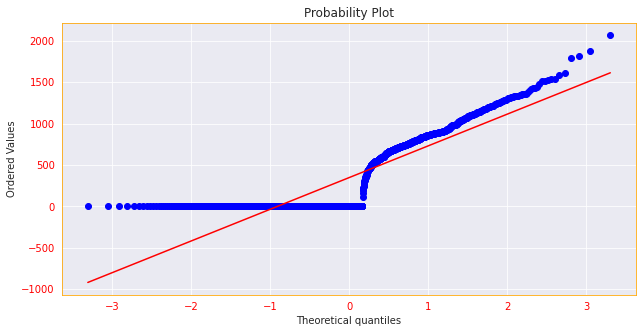

In [84]:
analyser.var_overview(var=train_columns[35], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1515.46 |        525.3         |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


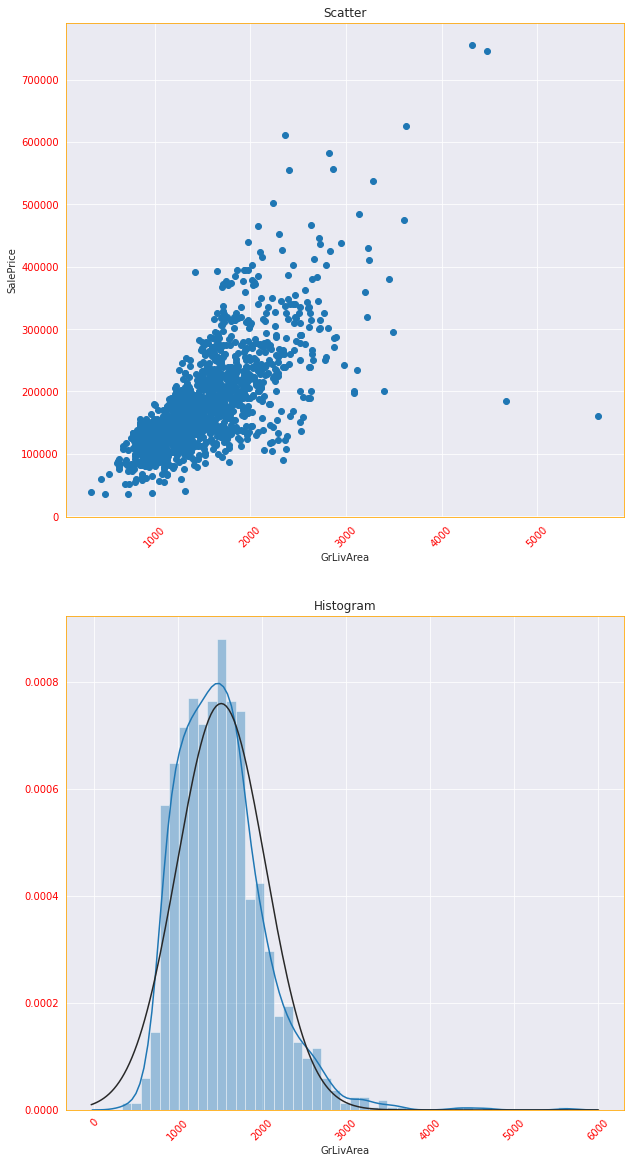

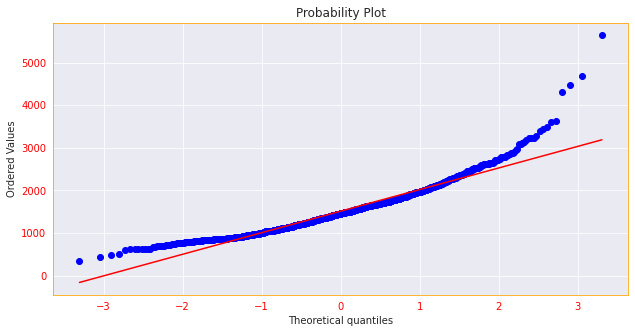

In [85]:
analyser.var_overview(var=train_columns[36], target=target)

+----------+----------+----------------------+
| DATA     |   MEAN   |  STANDARD DEVIATION  |
+==========+==========+======================+
| Variable | 0.425342 |       0.518733       |
+----------+----------+----------------------+
| Target   |  180921  |       79415.3        |
+----------+----------+----------------------+


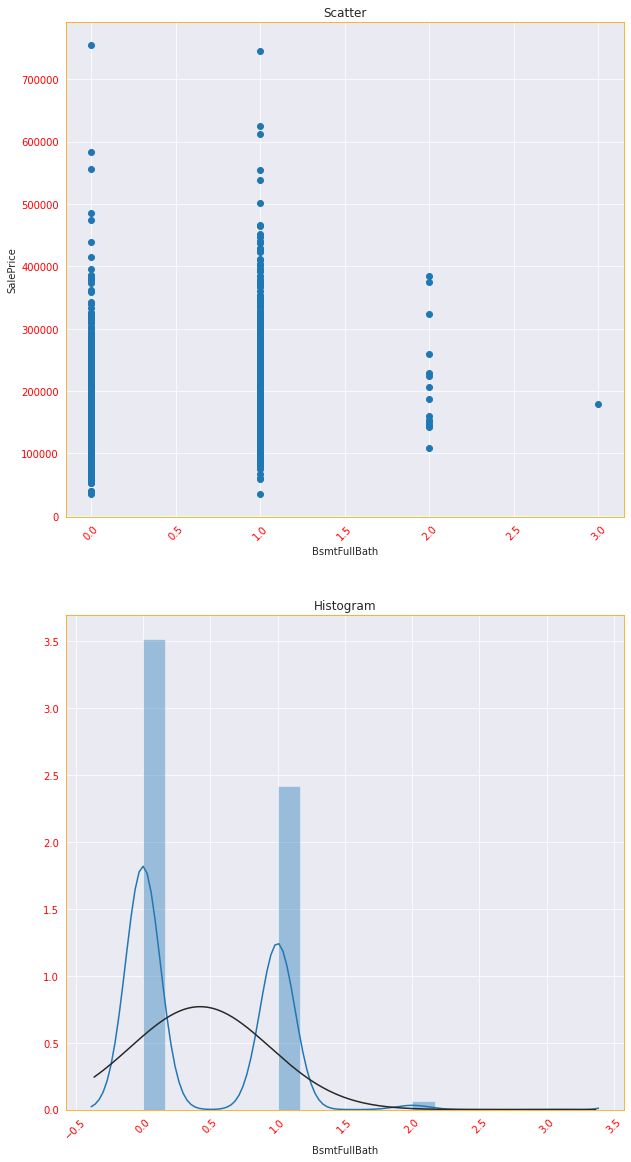

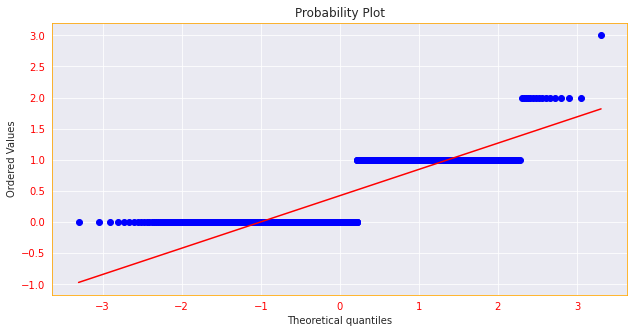

In [86]:
analyser.var_overview(var=train_columns[37], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1.56507 |       0.550727       |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


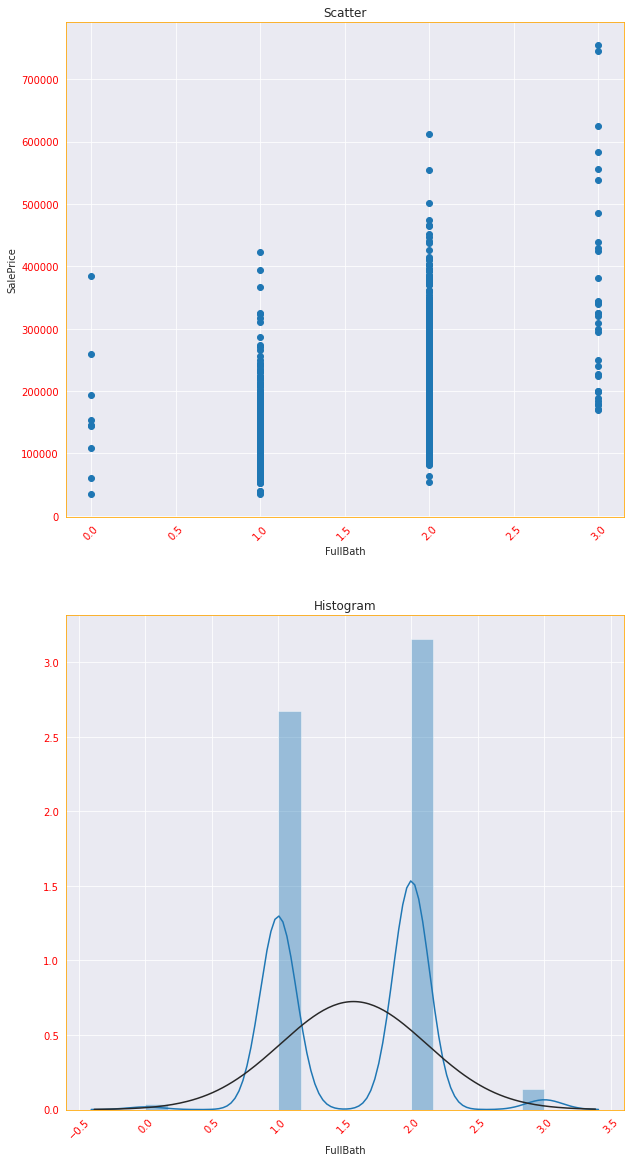

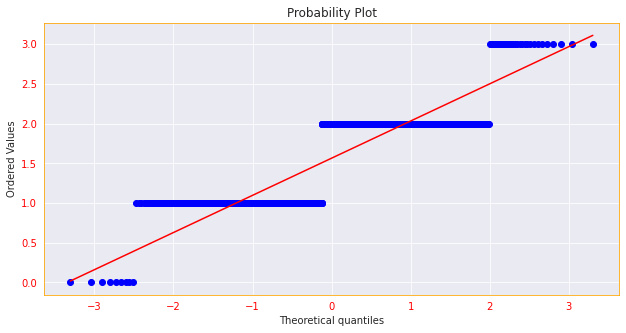

In [87]:
analyser.var_overview(var=train_columns[38], target=target)

+----------+----------+----------------------+
| DATA     |   MEAN   |  STANDARD DEVIATION  |
+==========+==========+======================+
| Variable | 0.382877 |       0.502713       |
+----------+----------+----------------------+
| Target   |  180921  |       79415.3        |
+----------+----------+----------------------+


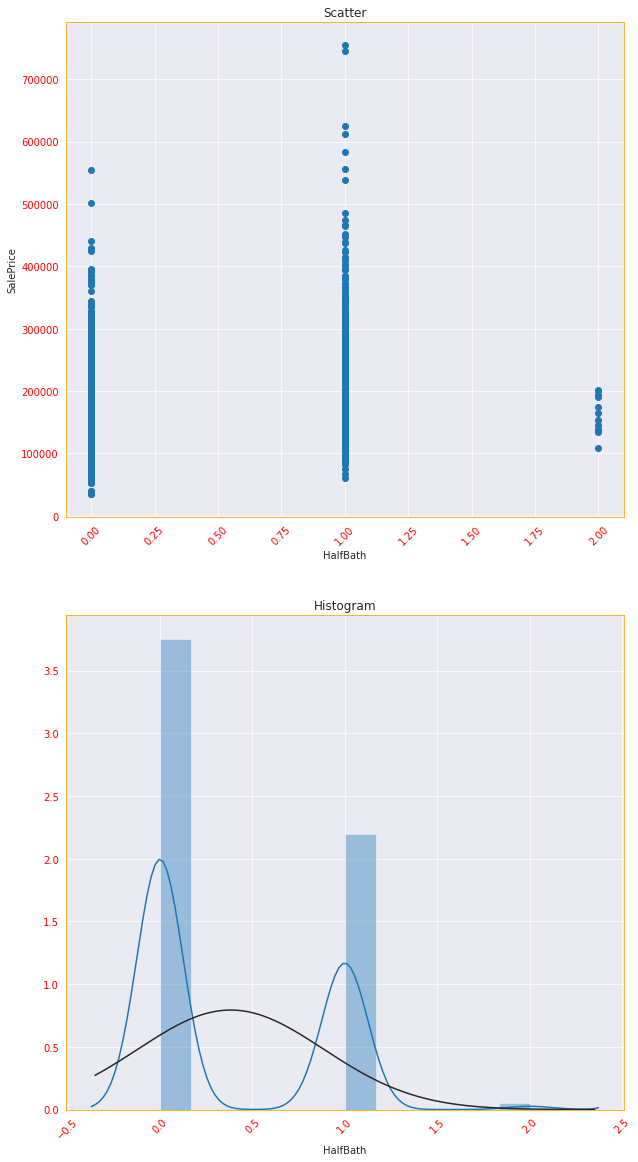

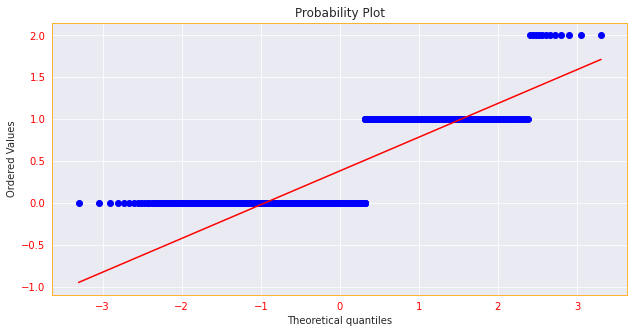

In [88]:
analyser.var_overview(var=train_columns[39], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 2.86644 |       0.815499       |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


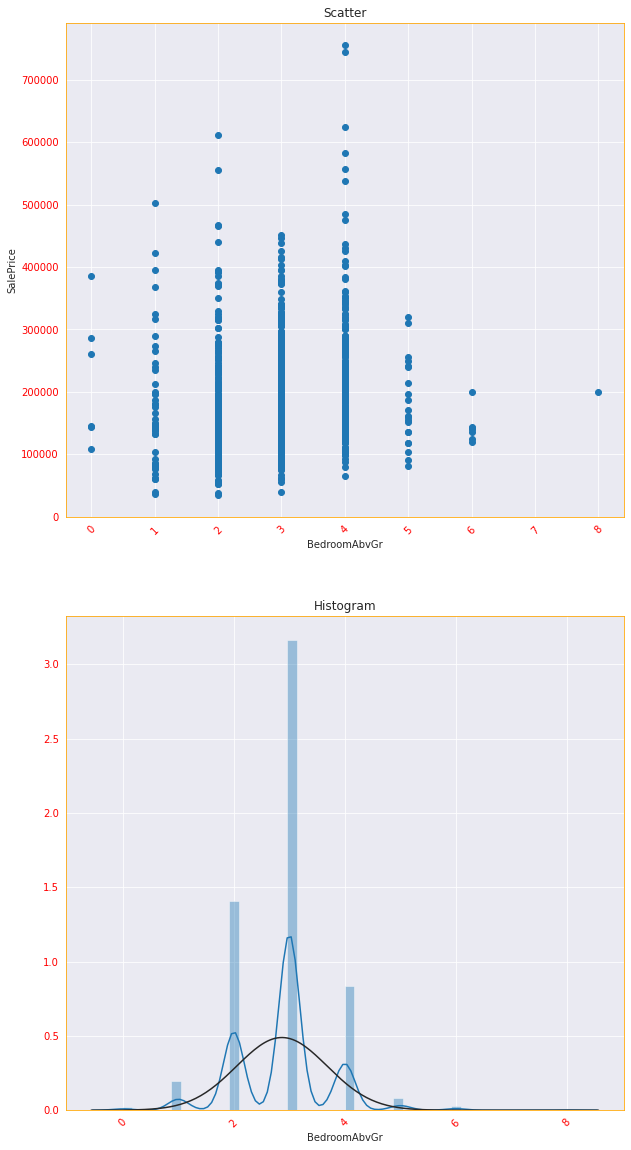

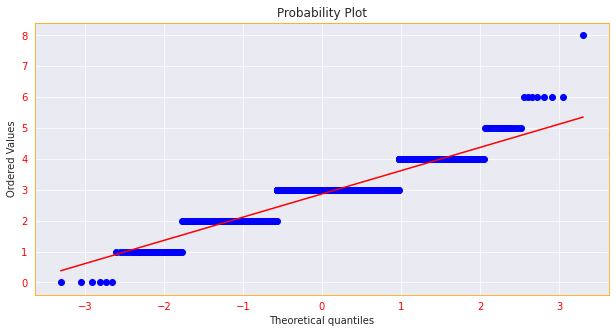

In [89]:
analyser.var_overview(var=train_columns[40], target=target)

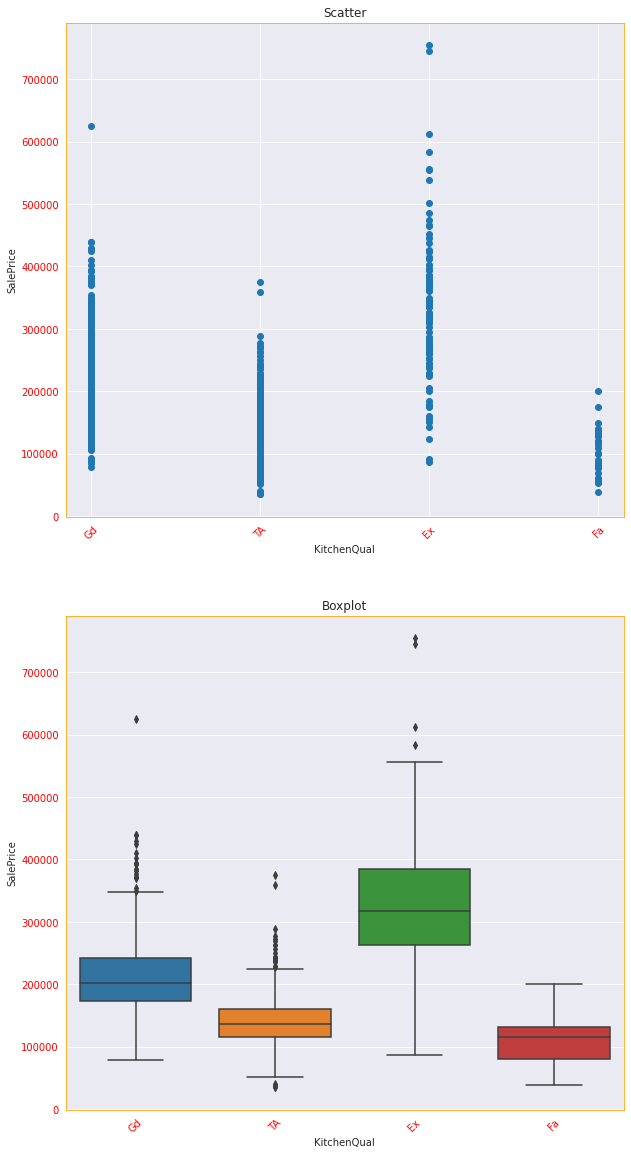

In [90]:
analyser.var_overview(var=train_columns[41], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 6.51781 |       1.62484        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


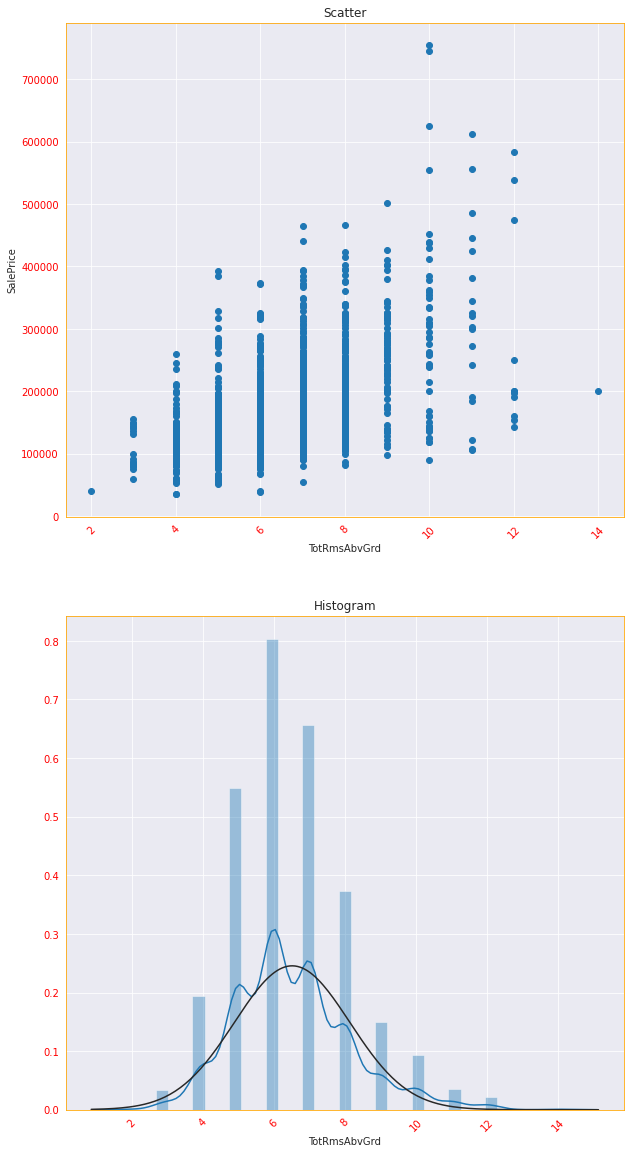

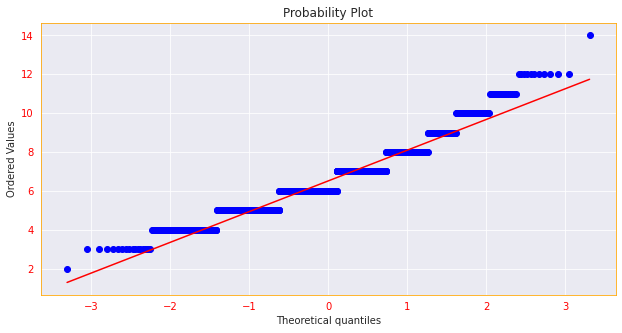

In [91]:
analyser.var_overview(var=train_columns[42], target=target)

+----------+----------+----------------------+
| DATA     |   MEAN   |  STANDARD DEVIATION  |
+==========+==========+======================+
| Variable | 0.613014 |       0.644446       |
+----------+----------+----------------------+
| Target   |  180921  |       79415.3        |
+----------+----------+----------------------+


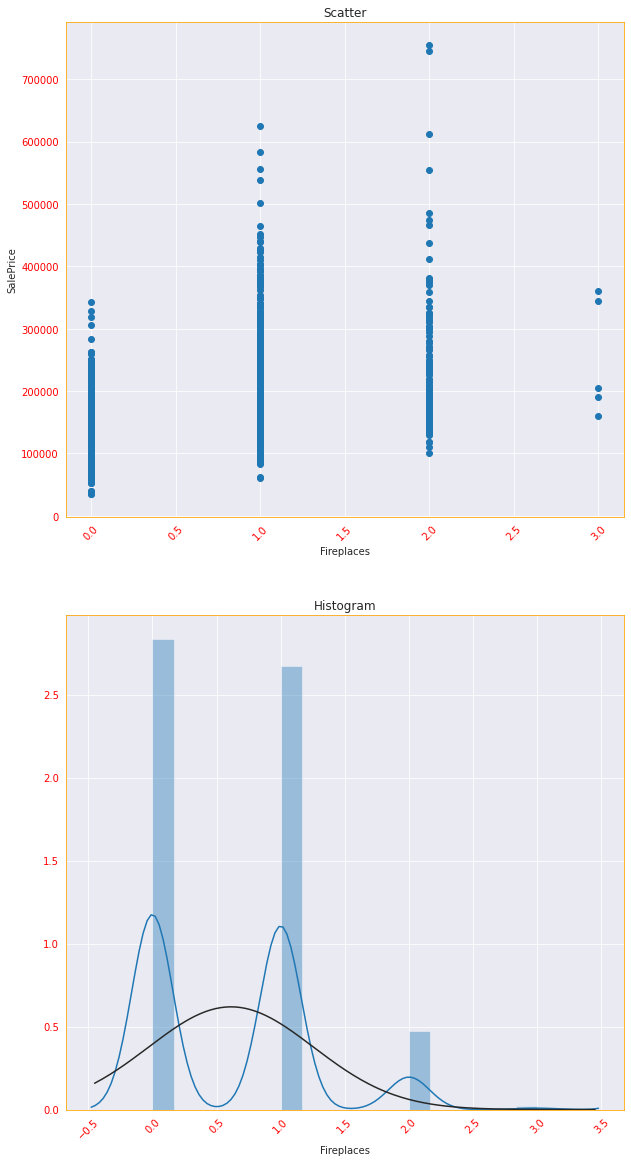

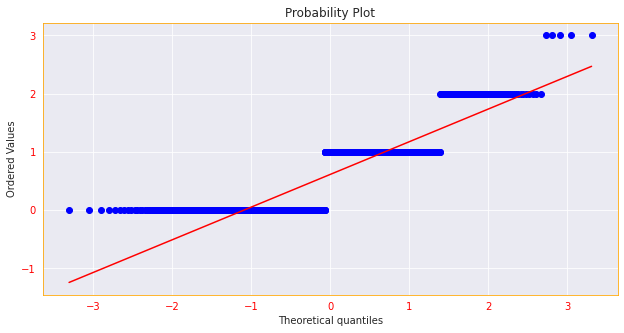

In [92]:
analyser.var_overview(var=train_columns[43], target=target)

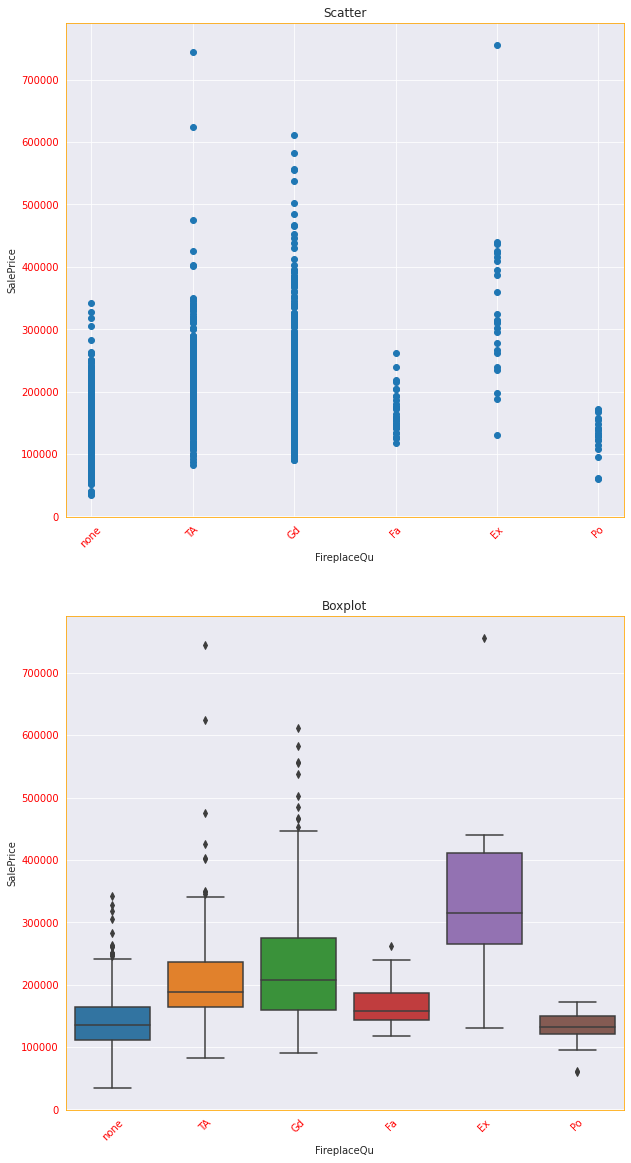

In [93]:
analyser.var_overview(var=train_columns[44], target=target)

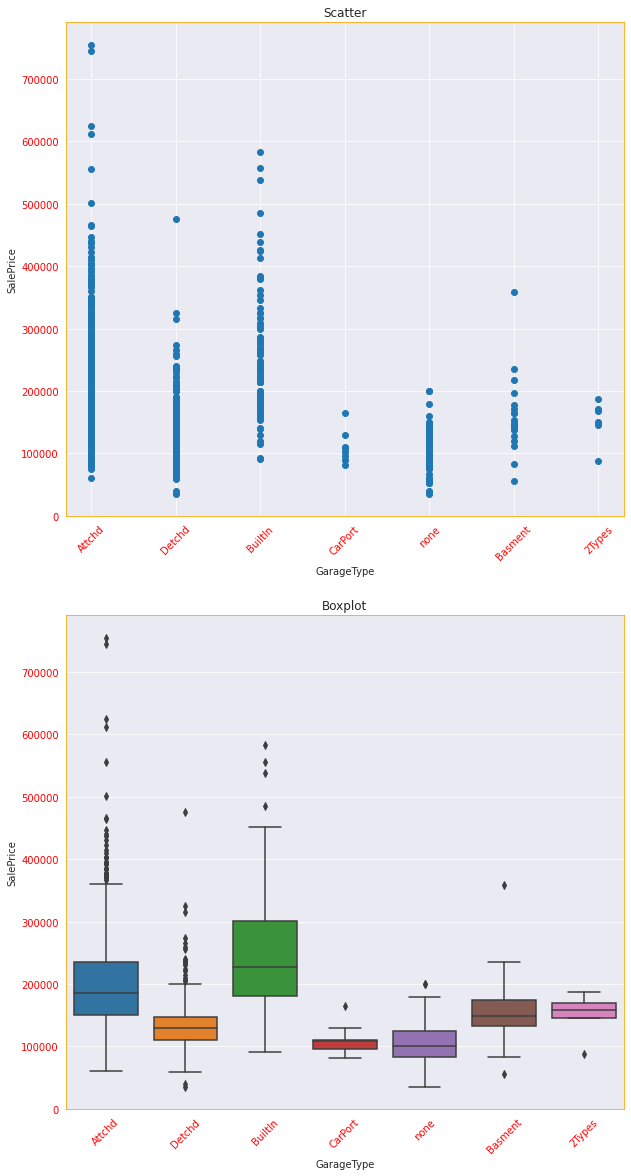

In [94]:
analyser.var_overview(var=train_columns[45], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1868.74 |       453.542        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


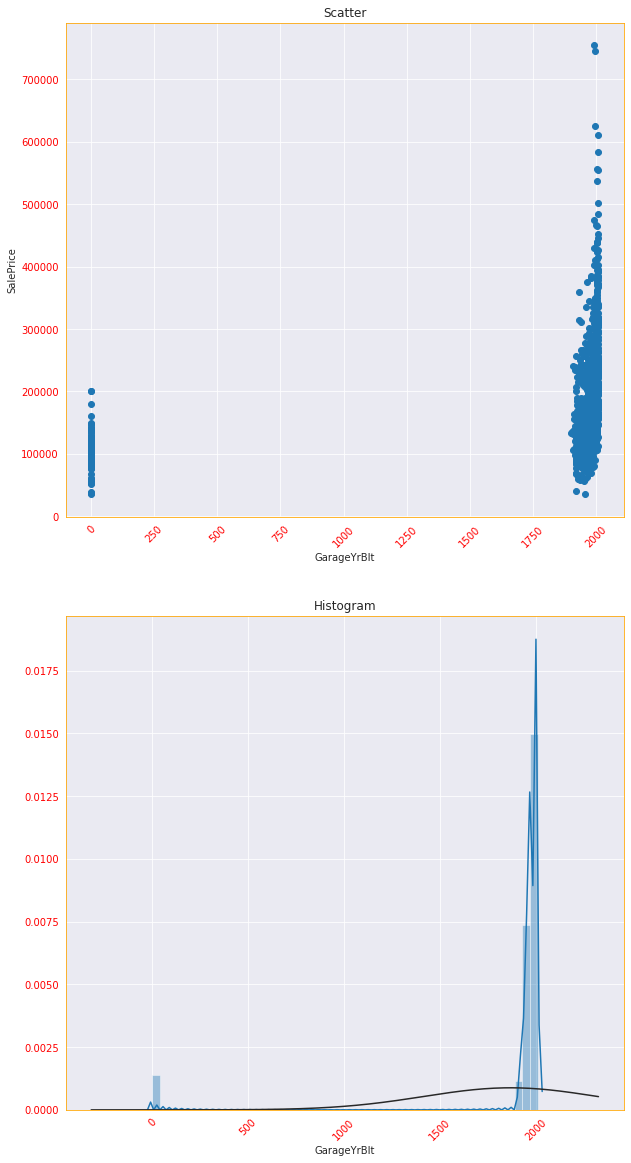

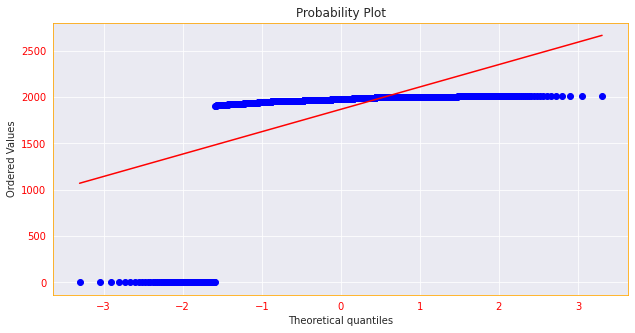

In [95]:
analyser.var_overview(var=train_columns[46], target=target)

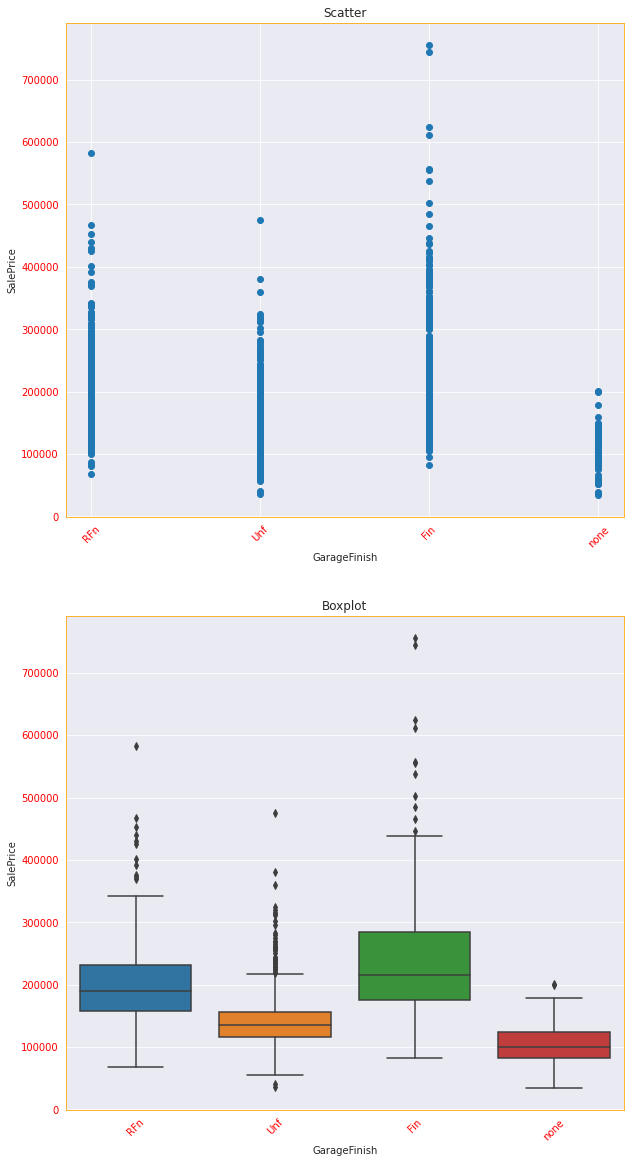

In [96]:
analyser.var_overview(var=train_columns[47], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 1.76712 |       0.747059       |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


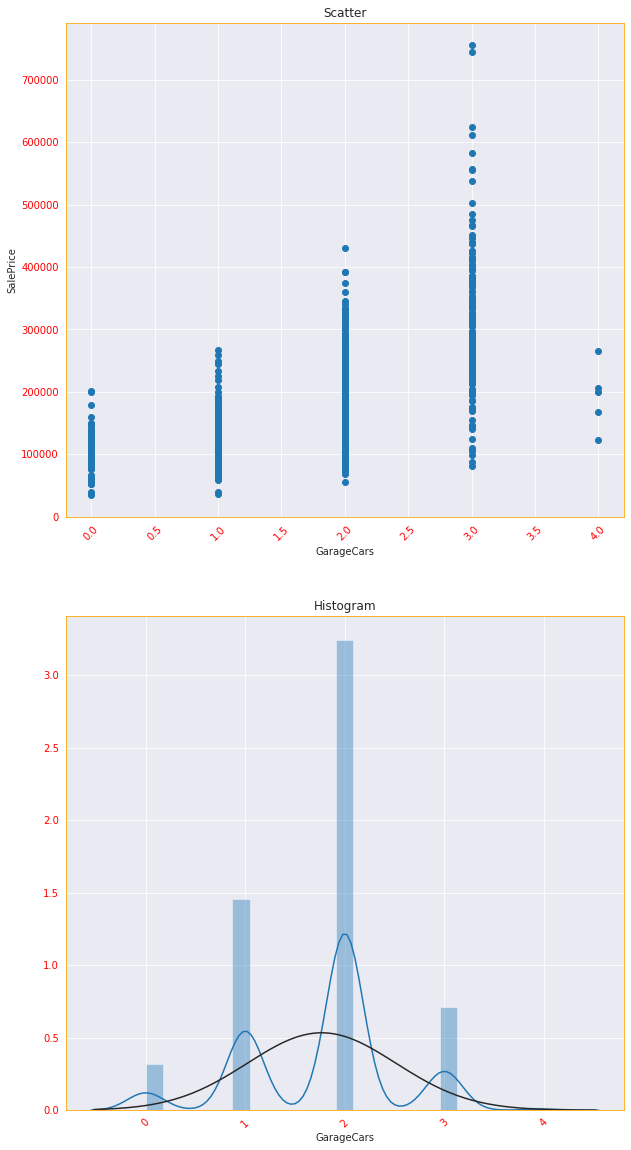

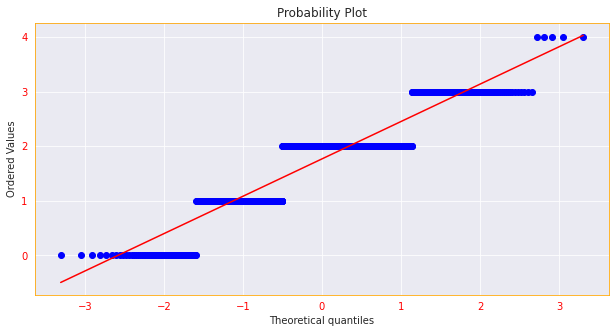

In [97]:
analyser.var_overview(var=train_columns[48], target=target)

+----------+--------+----------------------+
| DATA     |  MEAN  |  STANDARD DEVIATION  |
+==========+========+======================+
| Variable | 472.98 |       213.732        |
+----------+--------+----------------------+
| Target   | 180921 |       79415.3        |
+----------+--------+----------------------+


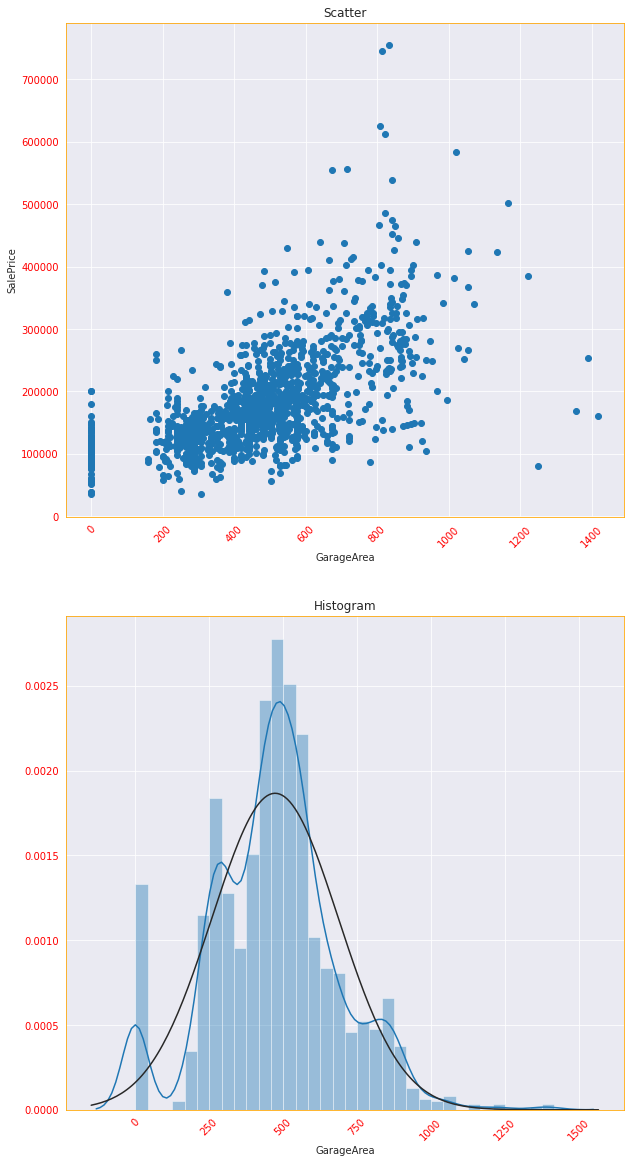

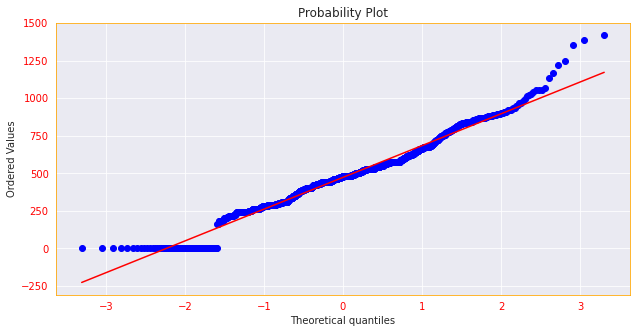

In [98]:
analyser.var_overview(var=train_columns[49], target=target)

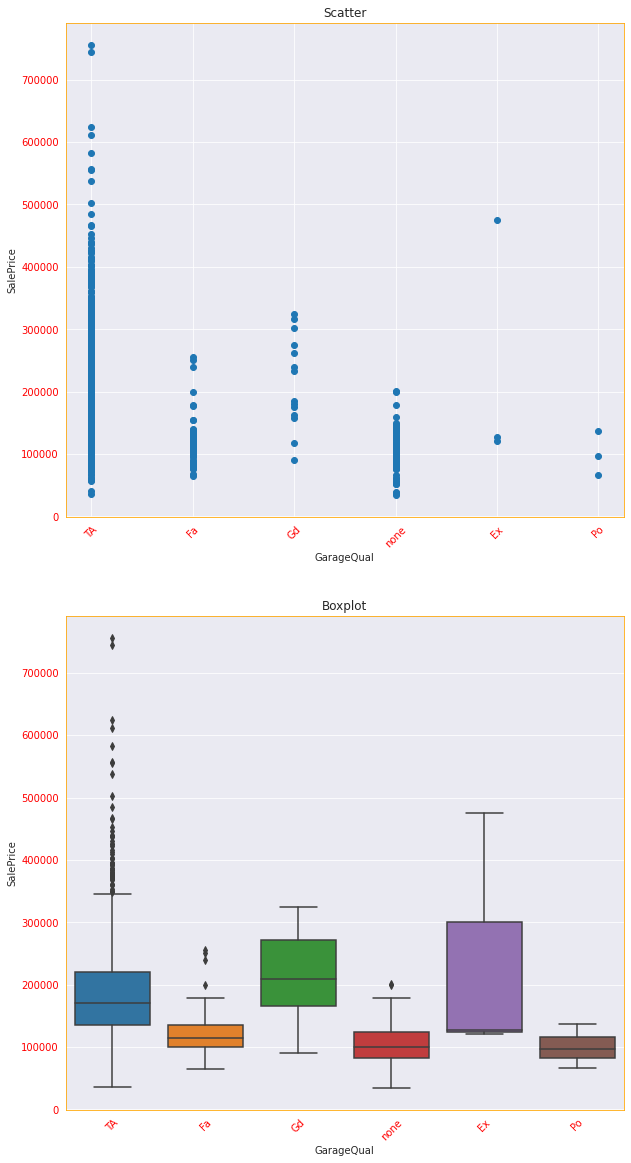

In [99]:
analyser.var_overview(var=train_columns[50], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 94.2445 |       125.296        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


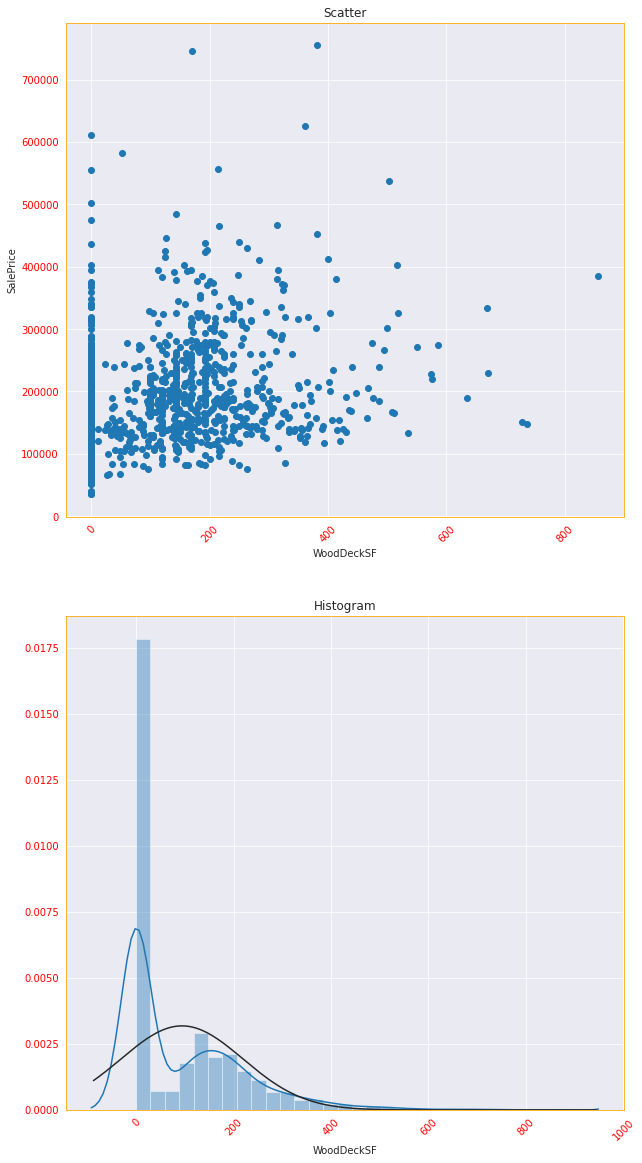

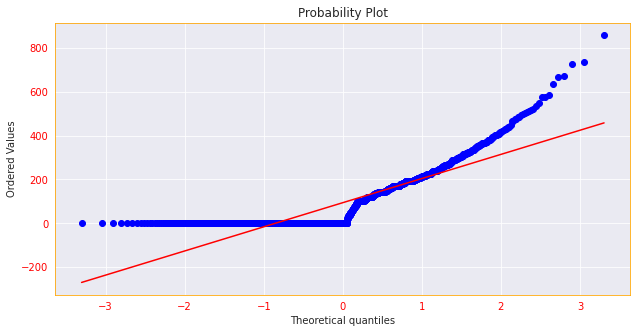

In [100]:
analyser.var_overview(var=train_columns[51], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 46.6603 |       66.2333        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


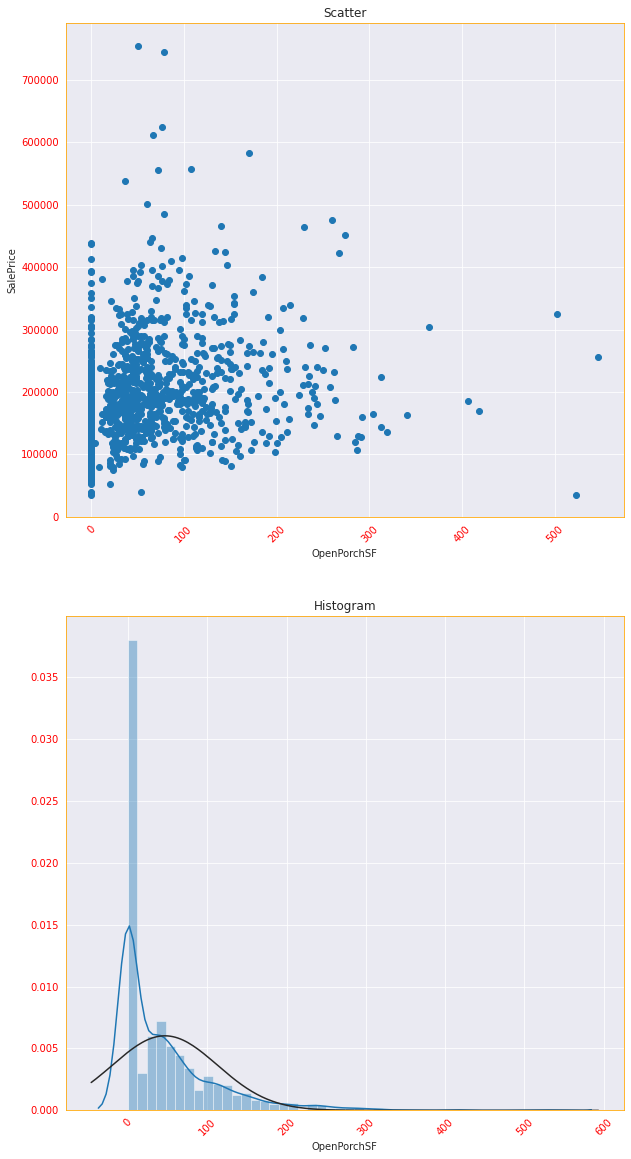

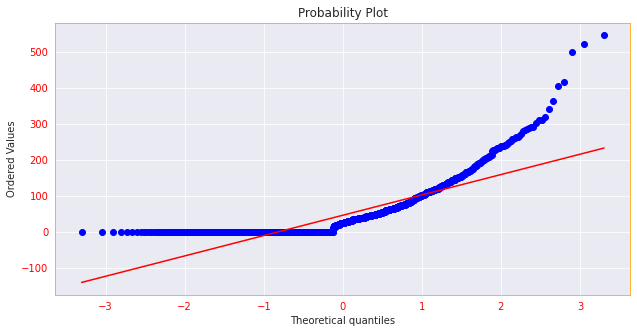

In [101]:
analyser.var_overview(var=train_columns[52], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 21.9541 |       61.0982        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


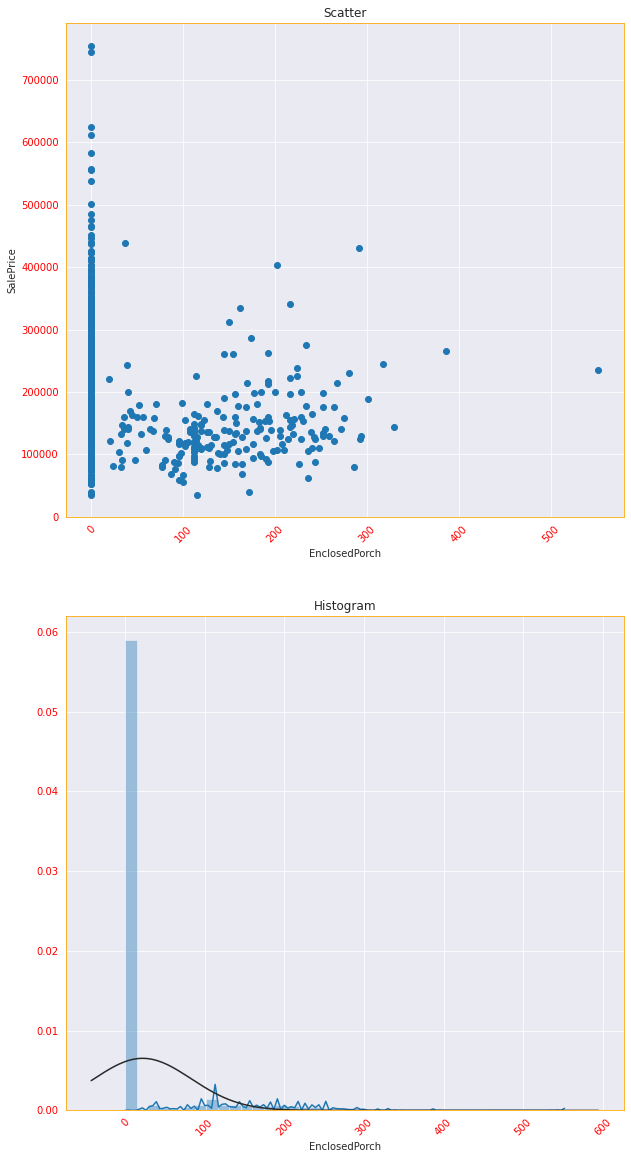

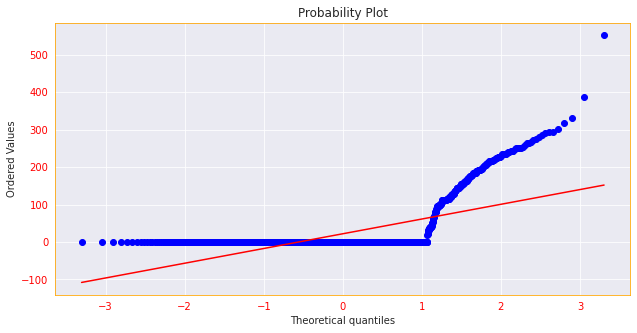

In [102]:
analyser.var_overview(var=train_columns[53], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 6.32192 |        2.7027        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


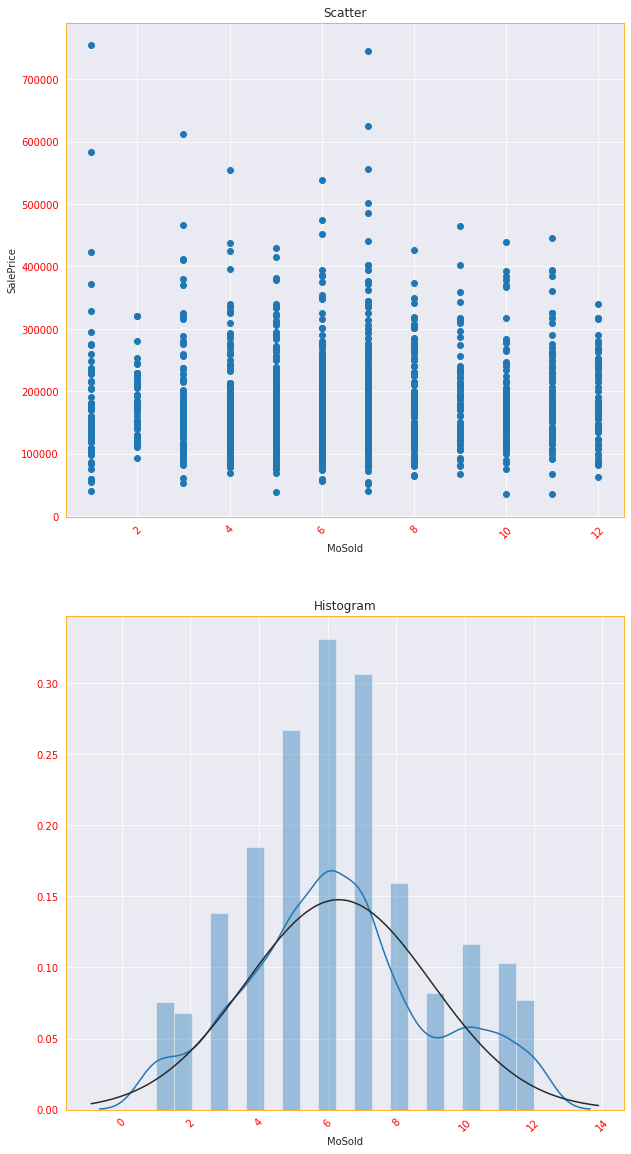

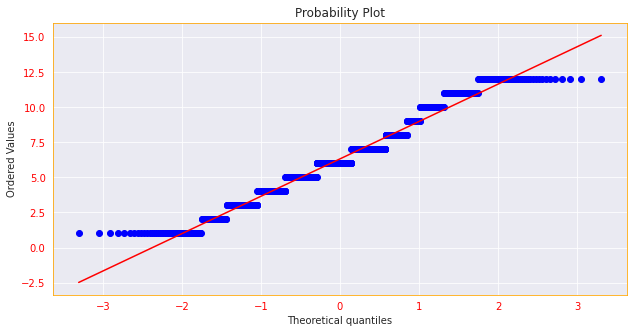

In [103]:
analyser.var_overview(var=train_columns[54], target=target)

+----------+---------+----------------------+
| DATA     |  MEAN   |  STANDARD DEVIATION  |
+==========+=========+======================+
| Variable | 2007.82 |       1.32764        |
+----------+---------+----------------------+
| Target   | 180921  |       79415.3        |
+----------+---------+----------------------+


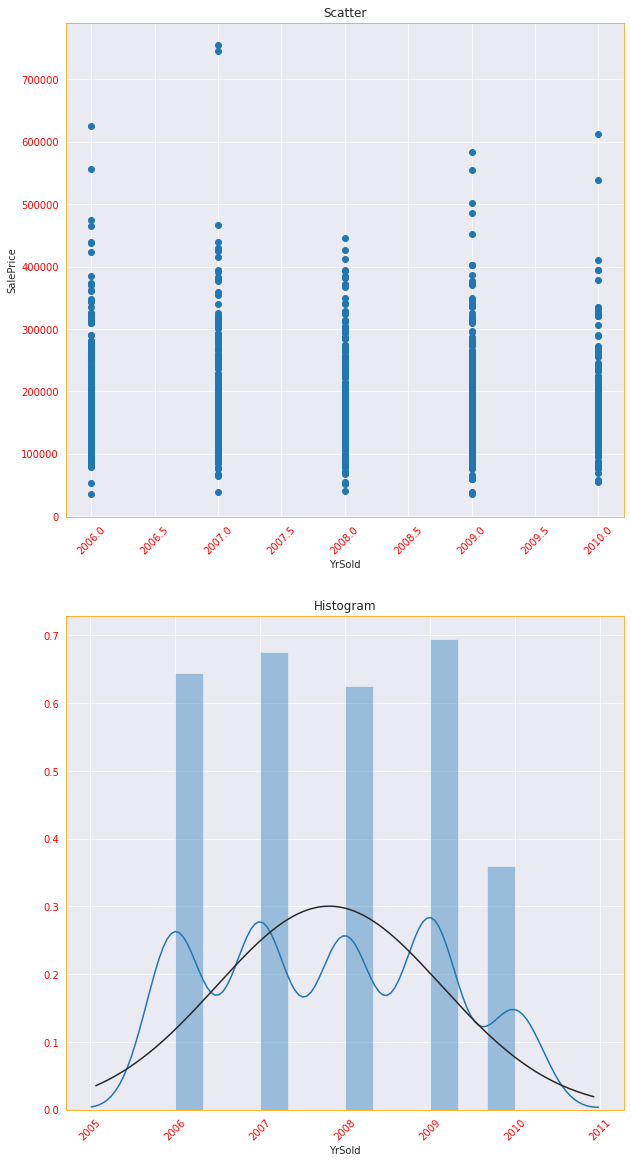

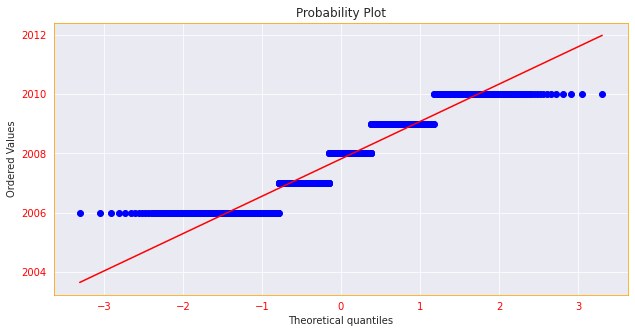

In [104]:
analyser.var_overview(var=train_columns[55], target=target)

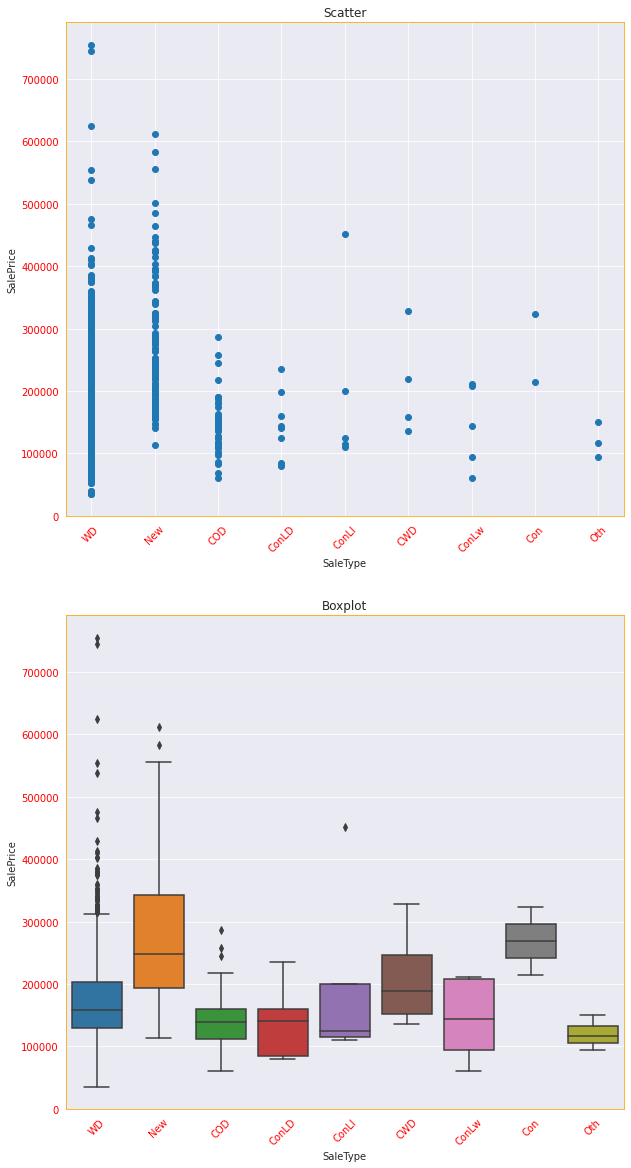

In [105]:
analyser.var_overview(var=train_columns[56], target=target)

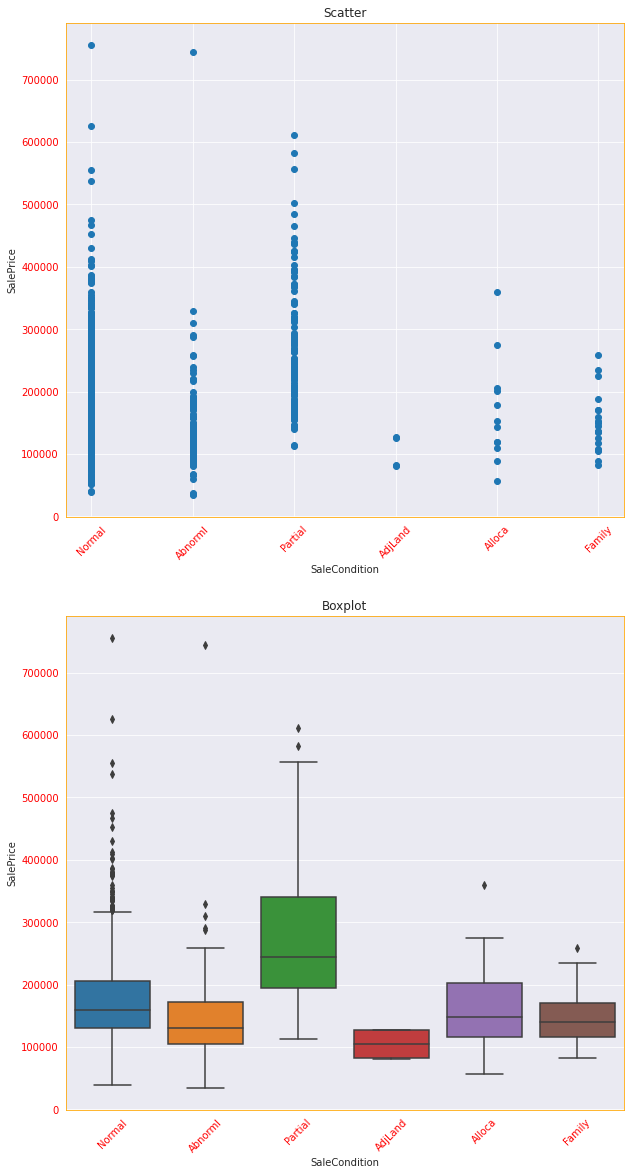

In [106]:
analyser.var_overview(var=train_columns[57], target=target)

Text(0.5, 0.98, 'Quality variables correlation with price')

Text(0.5, 1.0, 'ExterQual')

Text(0.5, 1.0, 'BsmtQual')

Text(0.5, 1.0, 'KitchenQual')

Text(0.5, 1.0, 'FireplaceQu')

Text(0.5, 1.0, 'GarageQual')

Text(0.5, 1.0, 'HeatingQC')

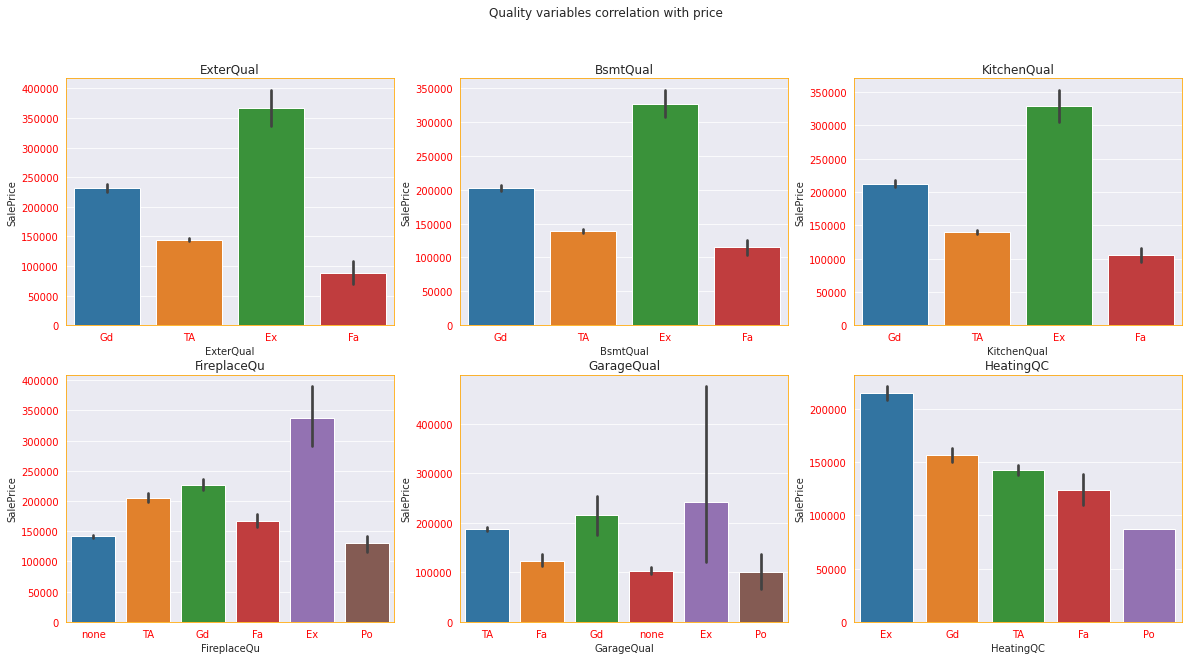

In [107]:
# Quality variables correleation with price (exept overall quality )
fig, axs = plt.subplots(2,3, figsize = (20,10))
fig.suptitle('Quality variables correlation with price')
sns.barplot(x='ExterQual', y='SalePrice', data=ds_train, ax=axs[0,0])
axs[0,0].set_title('ExterQual')
sns.barplot(x='BsmtQual', y='SalePrice', data=ds_train, ax=axs[0,1])
axs[0,1].set_title('BsmtQual')
sns.barplot(x='KitchenQual', y='SalePrice', data=ds_train, ax=axs[0,2])
axs[0,2].set_title('KitchenQual')
sns.barplot(x='FireplaceQu', y='SalePrice', data=ds_train, ax=axs[1,0])
axs[1,0].set_title('FireplaceQu')
sns.barplot(x='GarageQual', y='SalePrice', data=ds_train, ax=axs[1,1])
axs[1,1].set_title('GarageQual')
sns.barplot(x='HeatingQC', y='SalePrice', data=ds_train, ax=axs[1,2])
axs[1,2].set_title('HeatingQC')

Text(0.5, 0.98, 'Quality variables correlation with price')

Text(0.5, 1.0, 'YearBuilt')

Text(0.5, 1.0, 'YearRemodAdd')

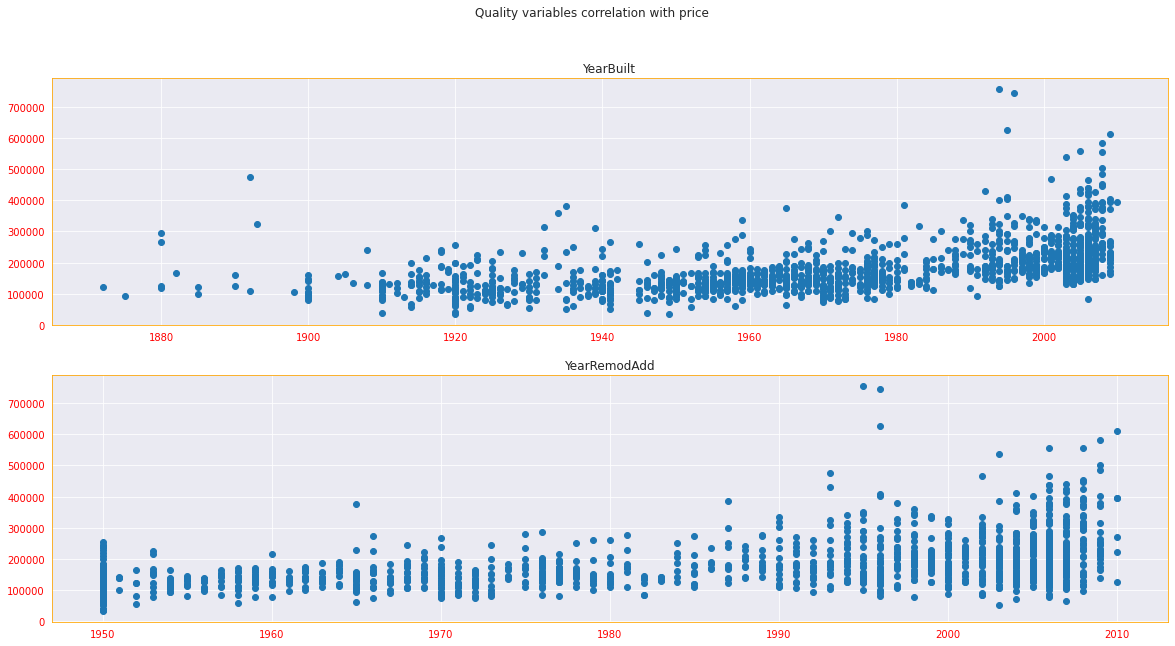

In [108]:
# Age correlation with price
fig, axs = plt.subplots(2, figsize = (20,10))
fig.suptitle('Quality variables correlation with price')
axs[0].scatter(ds_train['YearBuilt'], ds_train['SalePrice'])
axs[0].set_title('YearBuilt')
axs[1].scatter(ds_train['YearRemodAdd'], ds_train['SalePrice'])
axs[1].set_title('YearRemodAdd')

<Figure size 1440x720 with 0 Axes>

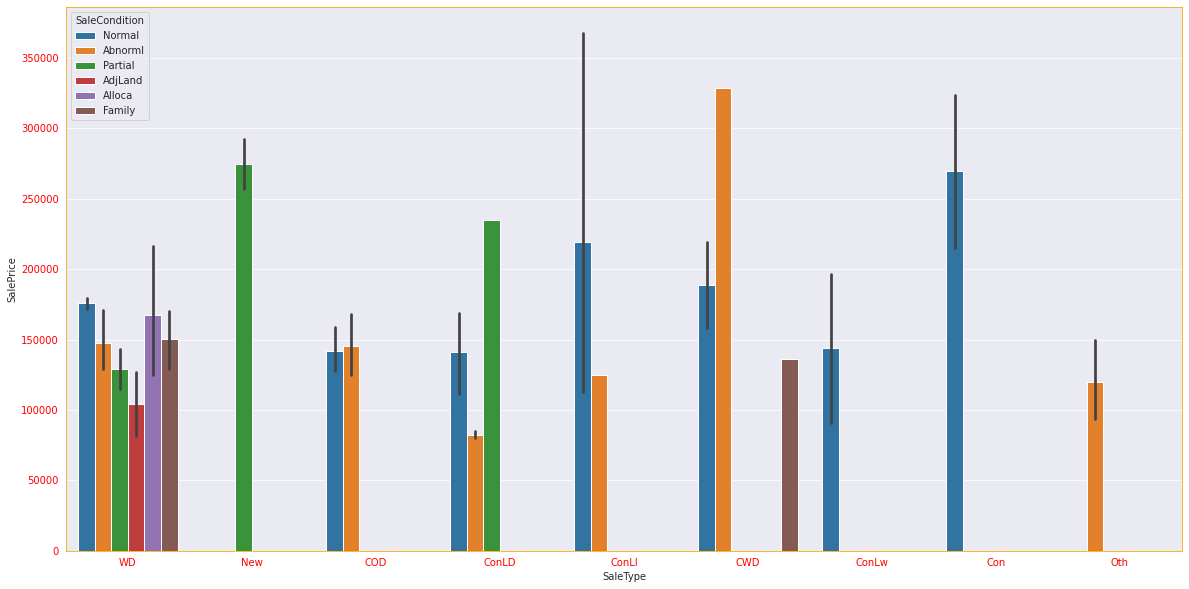

In [109]:
# Sale paramters correlation with price
plt.figure(figsize=(20, 10))
sns.barplot(x = 'SaleType', y = 'SalePrice', hue = 'SaleCondition', data=ds_train) 

# TRANSFORM DATA


In [0]:
# TRANFORM NUMERICAL CATEGORICAL TO STRING CATEGORICAL
# Change MSSubClass type to string 
ds_train['MSSubClass'] = ds_train['MSSubClass'].astype(str)
ds_test['MSSubClass'] = ds_test['MSSubClass'].astype(str)
# Change OverallCond type to string 
ds_train['OverallCond'] = ds_train['OverallCond'].astype(str)
ds_test['OverallCond'] = ds_test['OverallCond'].astype(str)
# Change OverallCond type to string 
ds_train['YrSold'] = ds_train['YrSold'].astype(str)
ds_test['YrSold'] = ds_test['YrSold'].astype(str)
# Change OverallCond type to string 
ds_train['MoSold'] = ds_train['MoSold'].astype(str)
ds_test['MoSold'] = ds_test['MoSold'].astype(str)

In [111]:
# CREATING TRANSFORM OBJECT
data = TransformData(ds_train, ds_test)
# Normality test (skewness)
data.normality_test(target = 'SalePrice', skew_factor=0.75)


Skew in numerical variables: 


Skew in numerical variables: 

Number of skewed variables 16
['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']


In [112]:
# Fixing skew data
data.skew_fix(lmbda = 0.5)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [0]:
# Data skalling
data.data_skalling()

In [0]:
# Drop target column
ds_train = ds_train.drop('SalePrice', axis = 1)

In [115]:
ds_train.head(10)

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0 0.000         60       RL        0.363    0.366      Reg         Lvl   
1 0.001         20       RL        0.410    0.391      Reg         Lvl   
2 0.001         60       RL        0.373    0.422      IR1         Lvl   
3 0.002         70       RL        0.345    0.390      IR1         Lvl   
4 0.003         60       RL        0.421    0.469      IR1         Lvl   
5 0.003         50       RL        0.423    0.467      IR1         Lvl   
6 0.004         20       RL        0.395    0.401      Reg         Lvl   
7 0.005         60       RL        0.376    0.407      IR1         Lvl   
8 0.005         50       RM        0.308    0.303      Reg         Lvl   
9 0.006        190       RL        0.304    0.341      Reg         Lvl   

  LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0    Inside      CollgCr       Norm     1Fam     2Story        0.667   
1       FR2      Veenker      Feedr     1Fam     1Story        0.556   
2    Inside      CollgCr       Norm     1Fam     2Story        0.667   
3    Corner      Crawfor       Norm     1Fam     2Story        0.667   
4       FR2      NoRidge       Norm     1Fam     2Story        0.778   
5    Inside      Mitchel       Norm     1Fam     1.5Fin        0.444   
6    Inside      Somerst       Norm     1Fam     1Story        0.778   
7    Corner       NWAmes       PosN     1Fam     2Story        0.667   
8    Inside      OldTown     Artery     1Fam     1.5Fin        0.667   
9    Corner      BrkSide     Artery   2fmCon     1.5Unf        0.444   

  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd  \
0           5      0.949         0.883     Gable     VinylSd     VinylSd   
1           8      0.754         0.433     Gable     MetalSd     MetalSd   
2           5      0.935         0.867     Gable     VinylSd     VinylSd   
3           5      0.312         0.333     Gable     Wd Sdng     Wd Shng   
4           5      0.928         0.833     Gable     VinylSd     VinylSd   
5           5      0.877         0.750     Gable     VinylSd     VinylSd   
6           5      0.957         0.917     Gable     VinylSd     VinylSd   
7           6      0.732         0.383     Gable     HdBoard     HdBoard   
8           5      0.428         0.000     Gable     BrkFace     Wd Shng   
9           6      0.486         0.000     Gable     MetalSd     MetalSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       0.350        Gd        TA      PConc       Gd       TA   
1       None       0.000        TA        TA     CBlock       Gd       TA   
2    BrkFace       0.318        Gd        TA      PConc       Gd       TA   
3       None       0.000        TA        TA     BrkTil       TA       Gd   
4    BrkFace       0.468        Gd        TA      PConc       Gd       TA   
5       None       0.000        TA        TA       Wood       Gd       TA   
6      Stone       0.341        Gd        TA      PConc       Ex       TA   
7      Stone       0.387        TA        TA     CBlock       Gd       TA   
8       None       0.000        TA        TA     BrkTil       TA       TA   
9       None       0.000        TA        TA     BrkTil       TA       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ       0.354          Unf       0.000      0.253   
1           Gd          ALQ       0.416          Unf       0.000      0.349   
2           Mn          GLQ       0.293          Unf       0.000      0.431   
3           No          ALQ       0.196          Unf       0.000      0.481   
4           Av          GLQ       0.341          Unf       0.000      0.458   
5           No          GLQ       0.360          Unf       0.000      0.166   
6           Av          GLQ       0.493          Unf       0.000      0.368   
7           Mn          ALQ       0.390          BLQ       0.147      0.304   
8

# CREATING MODEL

## CREATE DUMMIES

In [119]:
# Final values check 
print (ds_train.info())
print (ds_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   float64
 13  OverallCond    1460 non-null   object 
 14  YearBuilt      1460 non-null   float64
 15  YearRemodAdd   1460 non-null   float64
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

In [0]:
### CREATING DUMMY VARIABLES ### 
# list of string type categorical independent variables
dummy_list = []
for column in ds_train.columns: 
    if type(ds_train[column][0]) == type('a'):
        dummy_list.append(column)


In [121]:
dummy_list

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [0]:
# Create dummy variables
ds_dummy_train = pd.get_dummies(ds_train[dummy_list], drop_first=True)
ds_dummy_test = pd.get_dummies(ds_test[dummy_list], drop_first=True)

In [0]:
# drop transformed columns
ds_train.drop(dummy_list, axis=1, inplace = True)
ds_test.drop(dummy_list, axis=1, inplace = True) 
# add dummy columns to datasets
ds_train = pd.concat([ds_train, ds_dummy_train], axis=1, sort=False)
ds_test = pd.concat([ds_test, ds_dummy_test], axis=1, sort=False)

In [124]:
ds_train.head(10)

Id  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  \
0 0.000        0.363    0.366        0.667      0.949         0.883   
1 0.001        0.410    0.391        0.556      0.754         0.433   
2 0.001        0.373    0.422        0.667      0.935         0.867   
3 0.002        0.345    0.390        0.667      0.312         0.333   
4 0.003        0.421    0.469        0.778      0.928         0.833   
5 0.003        0.423    0.467        0.444      0.877         0.750   
6 0.004        0.395    0.401        0.778      0.957         0.917   
7 0.005        0.376    0.407        0.667      0.732         0.383   
8 0.005        0.308    0.303        0.667      0.428         0.000   
9 0.006        0.304    0.341        0.444      0.486         0.000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       0.350       0.354       0.000      0.253        0.374     0.356   
1       0.000       0.416       0.000      0.349        0.454     0.503   
2       0.318       0.293       0.000      0.431        0.388     0.383   
3       0.000       0.196       0.000      0.481        0.352     0.400   
4       0.468       0.341       0.000      0.458        0.433     0.466   
5       0.000       0.360       0.000      0.166        0.361     0.329   
6       0.341       0.493       0.000      0.368        0.525     0.614   
7       0.387       0.390       0.147      0.304        0.426     0.453   
8       0.000       0.000       0.000      0.638        0.395     0.423   
9       0.000       0.388       0.000      0.245        0.403     0.443   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0     0.643      0.578         0.333     0.667     0.500         0.375   
1     0.000      0.470         0.000     0.667     0.000         0.375   
2     0.648      0.593         0.333     0.667     0.500         0.375   
3     0.605      0.579         0.333     0.333     0.000         0.375   
4     0.714      0.667         0.333     0.667     0.500         0.500   
5     0.524      0.497         0.333     0.333     0.500         0.125   
6     0.000      0.574         0.333     0.667     0.000         0.375   
7     0.690      0.649         0.333     0.667     0.500         0.375   
8     0.603      0.591         0.000     0.667     0.000         0.250   
9     0.000      0.414         0.333     0.333     0.000         0.250   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0         0.712       0.000        0.998       0.500       0.386       0.000   
1         0.565       0.577        0.992       0.500       0.324       0.590   
2         0.565       0.577        0.998       0.500       0.429       0.000   
3         0.644       0.577        0.997       0.750       0.453       0.000   
4         0.773       0.577        0.998       0.750       0.590       0.473   
5         0.471       0.000        0.996       0.500       0.339       0.216   
6         0.644       0.577        0.999       0.500       0.449       0.545   
7         0.644       0.816        0.991       0.500       0.341       0.524   
8         0.712       0.816        0.980       0.500       0.330       0.324   
9         0.471       0.816        0.982       0.250       0.145       0.000   

   OpenPorchSF  EnclosedPorch  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0        0.334          0.000               0               0               0   
1        0.000          0.000               0               0               0   
2        0.277          0.000               0               0               0   
3        0.253          0.702               0               0               0   
4        0.392          0.000               0               0               0   
5        0.234          0.000               0               0               0   
6        0.323          0.000               0               0               0   
7        0.611          0.643               0        

In [125]:
ds_test.head(10)

Id  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  \
0 0.000        0.554    0.566        0.444      0.626         0.183   
1 0.001        0.558    0.623        0.556      0.603         0.133   
2 0.001        0.532    0.614        0.444      0.901         0.800   
3 0.002        0.547    0.525        0.556      0.908         0.800   
4 0.003        0.381    0.336        0.778      0.863         0.700   
5 0.003        0.536    0.525        0.556      0.870         0.733   
6 0.004        0.454    0.463        0.556      0.863         0.950   
7 0.005        0.487    0.477        0.556      0.908         0.800   
8 0.005        0.571    0.530        0.667      0.847         0.667   
9 0.006        0.517    0.477        0.333      0.695         0.333   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       0.000       0.342       0.307      0.355        0.416     0.312   
1       0.289       0.480       0.000      0.436        0.511     0.468   
2       0.000       0.444       0.000      0.253        0.427     0.326   
3       0.125       0.387       0.000      0.389        0.426     0.325   
4       0.000       0.256       0.000      0.689        0.501     0.453   
5       0.000       0.000       0.000      0.597        0.387     0.249   
6       0.000       0.483       0.000      0.330        0.479     0.424   
7       0.000       0.000       0.000      0.607        0.394     0.262   
8       0.000       0.399       0.000      0.557        0.505     0.472   
9       0.000       0.448       0.226      0.000        0.416     0.306   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0     0.000      0.312         0.000     0.250     0.000         0.333   
1     0.000      0.468         0.000     0.250     0.500         0.500   
2     0.614      0.549         0.000     0.500     0.500         0.500   
3     0.603      0.543         0.000     0.500     0.500         0.500   
4     0.000      0.453         0.000     0.500     0.000         0.333   
5     0.692      0.555         0.000     0.500     0.500         0.500   
6     0.000      0.424         0.333     0.500     0.000         0.500   
7     0.603      0.507         0.000     0.500     0.500         0.500   
8     0.000      0.472         0.333     0.250     0.500         0.333   
9     0.000      0.306         0.333     0.250     0.000         0.333   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0         0.317       0.000        0.943       0.200       0.491       0.314   
1         0.431       0.000        0.942       0.200       0.210       0.525   
2         0.431       0.500        0.951       0.400       0.324       0.386   
3         0.526       0.500        0.951       0.400       0.316       0.503   
4         0.317       0.000        0.950       0.400       0.340       0.000   
5         0.526       0.500        0.950       0.400       0.296       0.332   
6         0.431       0.000        0.950       0.400       0.282       0.582   
7         0.526       0.500        0.951       0.400       0.264       0.000   
8         0.317       0.500        0.950       0.400       0.340       0.367   
9         0.179       0.000        0.945       0.400       0.353       0.411   

   OpenPorchSF  EnclosedPorch  MSSubClass_150  MSSubClass_160  MSSubClass_180  \
0        0.000          0.000               0               0               0   
1        0.220          0.000               0               0               0   
2        0.214          0.000               0               0               0   
3        0.220          0.000               0               0               0   
4        0.332          0.000               0               0               0   
5        0.336          0.000               0               0               0   
6        0.168          0.000               0               0               0   
7        0.318          0.000               0        

In [126]:
len(ds_train.columns)

227

In [127]:
len(ds_test.columns)

223

In [128]:
for i in ds_train.columns:
  if i not in ds_test.columns:
    print(i)
  else:
    continue

HouseStyle_2.5Fin
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other
GarageQual_Fa


In [0]:
ds_train = ds_train.drop(['HouseStyle_2.5Fin','Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_Other'], axis=1)

## MODEL

In [0]:
# LIST OF ANALYSED MODELS AND HYPERPARAMETERS
# Linear Regression
lasso = Lasso()
elnet = ElasticNet()
bayridge = BayesianRidge()
lassolar = LassoLarsIC()
# Ensemble
RFR = RandomForestRegressor()
GBR = GradientBoostingRegressor()
# Kernel
Kridge = KernelRidge()
# XGBoost
xgb = XGBRegressor()
# LightGMB
lgb = LGBMRegressor()   


# Linear Regression - Lasso
lasso_set = [{'alpha':[85, 90, 95, 100, 105, 110, 115, 120, 125, 130], 'fit_intercept':['True']},
  {'alpha':[85, 90, 95, 100, 105, 110, 115, 120, 125, 130], 'fit_intercept':['False']}]
# Linear Regression - ElasticNet
elnet_set = [{'alpha':[85, 90, 95, 100, 105, 110, 115, 120, 125, 130], 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'fit_intercept':['True']},
  {'alpha':[85, 90, 95, 100, 105, 110, 115, 120, 125, 130], 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'fit_intercept':['False']}]
# Linear Regression - BayesianRidge
bayridge_set = [{'alpha_1':[1e-5, 1e-6, 1e-6], 'alpha_2':[1e-5, 1e-6, 1e-6], 'lambda_1':[1e-5, 1e-6, 1e-6], 'lambda_2':[1e-5, 1e-6, 1e-6], 'fit_intercept':['True']},
  {'alpha_1':[1e-5, 1e-6, 1e-6], 'alpha_2':[1e-5, 1e-6, 1e-6], 'lambda_1':[1e-5, 1e-6, 1e-6], 'lambda_2':[1e-5, 1e-6, 1e-6], 'fit_intercept':['False']}]
# Linear Regression - LassoLarsIC
lassolar_set = [{'criterion':['aic'], 'fit_intercept':['True']},
  {'criterion':['bic'], 'fit_intercept':['True']},
  {'criterion':['aic'], 'fit_intercept':['False']},
  {'criterion':['bic'], 'fit_intercept':['False']}]
# Ensemble RandomForestRegressor
RFR_set = [{'n_estimators':[5, 10, 15], 'criterion':['mse']},
  {'n_estimators':[5, 10, 15], 'criterion':['mae']}]
# Ensemble GradientBoostingRegressor
GBR_set = [{'learning_rate': [0.05, 0.1, 0.2],'n_estimators':[160, 165, 170, 175, 180]}]
# Kernel KernelRidge
Kridge_set = [{'alpha':[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], 'kernel':['linear']},
  {'alpha':[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],  'kernel':['RBF'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
  {'alpha':[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],  'kernel':['polynomial'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# XGBoost
xgb_set = [{'n_estimators':[100, 125, 150, 175, 200], 'max_depth ':[3, 4, 5, 6, 7],  'learning_rate': [0.05, 0.1, 0.2], 'objective': ['reg:squarederror']}]
# LightGMB
lgb_set = [{'n_estimators':[5, 25, 50, 100, 200], 'bagging_fraction':[0.6, 0.7, 0.8],  'bagging_freq': [3, 4, 5, 6, 7, 8], 'objective':['regression'],
    'num_leaves': [3, 4, 5, 6, 7], 'learning_rate': [0.05, 0.1, 0.2]}]


In [0]:
X_train, X_val, y_train, y_val = train_test_split(ds_train, target, test_size=0.2, random_state=42)

In [0]:
# Function to start GridSearchCV
def run_model(X, y, model, params_set, folds_number = 10, scoring='neg_mean_squared_error'):
  #kf = KFold(n_splits = folds_number, shuffle=True, random_state=42)
  GSCV = GridSearchCV(estimator=model, param_grid=params_set, scoring = 'neg_mean_squared_error', cv = 10)
  GSCV.fit(X, y)
  return print('Mean Squared Error {} Best Parameters {}'.format(GSCV.best_score_, GSCV.best_params_))

## TESTING MODELS

In [132]:
# Linear Regression - Lasso
run_model(X = ds_train, y= y_train, model= lasso, params_set= lasso_set)

Mean Squared Error -936346822.4492159 Best Parameters {'alpha': 100, 'fit_intercept': 'True'}


In [133]:
# Linear Regression - ElasticNet
run_model(X = ds_train, y= y_train, model= elnet, params_set= elnet_set)

Mean Squared Error -5075229488.168604 Best Parameters {'alpha': 85, 'fit_intercept': 'True', 'l1_ratio': 0.9}


In [134]:
# Linear Regression - BayesianRidge
run_model(X = ds_train, y= y_train, model= bayridge, params_set= bayridge_set)

Mean Squared Error -967884231.2528322 Best Parameters {'alpha_1': 1e-06, 'alpha_2': 1e-05, 'fit_intercept': 'True', 'lambda_1': 1e-05, 'lambda_2': 1e-05}


In [135]:
# Linear Regression - LassoLarsIC
run_model(X = ds_train, y= y_train, model= lassolar, params_set= lassolar_set)

Mean Squared Error -1200353284.135665 Best Parameters {'criterion': 'aic', 'fit_intercept': 'True'}


In [136]:
# Ensemble RandomForestRegressor
run_model(X = ds_train, y= y_train, model= RFR, params_set= RFR_set)

Mean Squared Error -853488256.9545174 Best Parameters {'criterion': 'mse', 'n_estimators': 15}


In [137]:
# Ensemble GradientBoostingRegressor
run_model(X = ds_train, y= y_train, model= GBR, params_set= GBR_set)

Mean Squared Error -664846708.3260425 Best Parameters {'learning_rate': 0.1, 'n_estimators': 175}


In [138]:
# Kernel KernelRidge
run_model(X = ds_train, y= y_train, model= Kridge, params_set= Kridge_set)

Mean Squared Error -903714810.9329417 Best Parameters {'alpha': 5, 'gamma': 0.1, 'kernel': 'polynomial'}


In [139]:
# XGBoost
run_model(X = ds_train, y= y_train, model= xgb, params_set= xgb_set)

Mean Squared Error -700422465.8988947 Best Parameters {'learning_rate': 0.1, 'max_depth ': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}


In [140]:
# LightGMB
run_model(X = ds_train, y= y_train, model= lgb, params_set= lgb_set)

Mean Squared Error -757707929.460984 Best Parameters {'bagging_fraction': 0.7, 'bagging_freq': 3, 'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 7, 'objective': 'regression'}


## PREDICT

In [141]:
# FIT DATA TO CHOSEN MODEL
gbr = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 180)
gbr.fit(ds_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=180,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# PREDICT TEST DATA
y_pred = gbr.predict(ds_test)

# TENSORBOARD

In [0]:
!rm -rf ./logs/ 

# SUBMISSION

In [0]:
# SUBMIT RESULTS
sub = pd.DataFrame()
sub['Id'] = sub_id
sub['SalePrice'] = y_pred
sub.to_csv('submission.csv',index=False)

In [0]:
# DOWNLOAD RESULTS
files.download('submission.csv')